<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/S4E4_TreeBasedModels_main_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S4E4 Tree Based Models

#### **The Data**

Here are some further information about the features:

Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

* Sex / nominal / -- / M, F, and I (infant)
* Length / continuous / mm / Longest shell measurement
* Diameter	/ continuous / mm / perpendicular to length
* Height / continuous / mm / with meat in shell
* Whole weight / continuous / grams / whole abalone
* Shucked weight / continuous	 / grams / weight of meat
* Viscera weight / continuous / grams / gut weight (after bleeding)
* Shell weight / continuous / grams / after being dried
* Rings / integer / -- / +1.5 gives the age in years

In [ ]:
%%capture
run_n = 0
if run_n==0:
  !pip install tensorflow-addons
  #!pip install shap
  #!pip install eli5
  #!pip install tf-nightly
  #!pip install -U scikit-learn==1.2.0
  !pip install catboost
  #!pip install haversine
  #!pip install pytorch-forecasting
  #!pip install umap-learn
  #!pip install reverse_geocoder
  #!pip install --upgrade protobuf
  !pip install colorama
  #!pip install imbalanced-learn
  !pip install optuna
  !pip install optuna-integration
  #!pip install pygam
  !pip install keras-tuner --upgrade
  #!pip install pycaret
  #!pip install lightning==2.0.1
  !pip install keras-nlp
  #!pip install MiniSom
  !pip install category_encoders
  !pip install BorutaShap
  !pip install feature-engine
#  !pip install scikit-learn==1.4.1
  !pip install tabnet
  !pip install scikit-lego

In [ ]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

from IPython.display import display_html, clear_output;
clear_output();

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
from copy import deepcopy
import re
#from scipy import stats
from random import randint
#from prettytable import PrettyTable
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
#from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
import joblib
from itertools import combinations
import IPython
import statsmodels.api as sm
import IPython.display
#from umap import UMAP

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
#from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
#import imblearn
import scipy.stats as stats
from scipy.special import boxcox, boxcox1p


# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GroupKFold, GridSearchCV, RepeatedStratifiedKFold

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
#from yellowbrick.cluster import KElbowVisualizer


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             root_mean_squared_log_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)

from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.metrics import mean_squared_log_error

# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  HuberRegressor,
                                  LinearRegression,
                                  RidgeClassifier,
                                  RANSACRegressor,
                                  Lars,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.utils.class_weight import compute_class_weight

from category_encoders import MEstimateEncoder, CatBoostEncoder, OrdinalEncoder

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
from catboost import CatBoost, CatBoostRegressor
from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret
warnings.filterwarnings("ignore")
#from minisom import MiniSom

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import feature_engine as fe
from feature_engine.creation import MathFeatures

# Keras and Tensorflow:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
#import tensorflow_addons as tfa
from keras.utils import FeatureSpace, plot_model

import keras_nlp
from keras import ops

from keras.metrics import (RootMeanSquaredError,
                           MeanAbsoluteError,
                           MeanAbsolutePercentageError,
                           MeanSquaredLogarithmicError)


# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
# Feature selection
from BorutaShap import BorutaShap
%matplotlib inline
SEED = 1984
N_SPLITS = 10

# Personal Library

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Done, All the required modules are imported. Time elapsed: 10.734555721282959 sec


<Figure size 640x480 with 0 Axes>

In [ ]:
%%time

# Configuration
COMPUTE_TEST_PRED = True

# Containers for results
oof, test_pred = {}, {}
y_pred_test_final_dict = {}

# Setting rc parameters in seaborn for plots and graphs-
# Reference - https://matplotlib.org/stable/tutorials/introductory/customizing.html:-
# To alter this, refer to matplotlib.rcParams.keys()

sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.75,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : '#0099e6',
         'axes.titlesize'       : 8.5,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

# Color printing
def PrintColor(text:str, color = Fore.BLUE, style = Style.BRIGHT):
    "Prints color outputs using colorama using a text F-string";
    print(style + color + text + Style.RESET_ALL);

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

print();
gc.collect();


CPU times: user 296 ms, sys: 190 µs, total: 296 ms
Wall time: 294 ms


159

<Figure size 640x480 with 0 Axes>

In [ ]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
#print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")
print(f"Keras Tuner: {kt.__version__}")

print(f"keras: {keras.__version__}")

CHECK VERSIONS:
sns: 0.13.1
mpl: 3.7.1
tensorflow: 2.16.1
pandas: 2.2.2
numpy: 1.25.2
scikit-learn: 1.4.2
statsmodels: 0.14.2
missingno: 0.5.2
XGBoost: 2.0.3
Keras Tuner: 1.0.5
keras: 3.3.3


In [ ]:
print(f"scikit-learn: {sk.__version__}")

scikit-learn: 1.4.2


In [ ]:
# Configuration class:-
class CFG:
    """
    Configuration class for parameters and CV strategy for tuning and training
    Some parameters may be unused here as this is a general configuration class
    """;

    # Data preparation:-
    version_nb         = 4;
    test_req           = "N";
    test_sample_frac   = 0.025;
    gpu_switch         = "OFF";
    state              = 42;
    rs_list            = [17,3,78,18,20,42,38,25,1978,1981]
    target             = ["Rings"];
    episode            = 4;
    season             = 4;
    path               = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S{season}E{episode}_Abalone";
    orig_path          = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S{season}E{episode}_Abalone/Faults.NNA";
    public_subs_path   = None;

    dtl_preproc_req    = "Y";
    adv_cv_req         = "N";
    ftre_plots_req     = 'Y';
    ftre_imp_req       = "Y";

    # Data transforms and scaling:-
    conjoin_orig_data  = "Y";
    drop_nulls         = "N";
    sec_ftre_req       = "Y";
    scale_req          = "N";
    # NOTE---Keep a value here even if scale_req = N, this is used for linear models:-
    scl_method         = "Z";
    enc_method         = 'Label';
    OH_cols            = ["MTRANS"];
    tgt_mapper         = {0 : 0,
                          1 : 1,
                          };

    # Model Training:-
    baseline_req       = "N";
    pstprcs_oof        = "N";
    pstprcs_train      = "N";
    pstprcs_test       = "N";
    ML                 = "Y";

    pseudo_lbl_req     = "N";
    pseudolbl_up       = 0.975;
    pseudolbl_low      = 0.00;

    use_orig_allfolds  = "N";
    n_splits           = 3 if test_req == "Y" else 10;
    n_repeats          = 1 ;
    nbrnd_erly_stp     = 75;
    mdlcv_mthd         = 'RSKF';

    # Ensemble:-
    ensemble_req       = "Y";
    hill_climb_req     = "N";
    optuna_req         = "Y";
    LAD_req            = "N";
    enscv_mthd         = "RSKF";
    metric_obj         = 'maximize';
    ntrials            = 10 if test_req == "Y" else 150;

    # Global variables for plotting:-
    grid_specs = {'visible': True, 'which': 'both', 'linestyle': '--',
                           'color': 'lightgrey', 'linewidth': 0.75};
    title_specs = {'fontsize': 9, 'fontweight': 'bold', 'color': 'tab:blue'};

#print();
PrintColor(f"--> Configuration done!\n");
gc.collect();

CFG.ntrials
CFG.rs_list

--> Configuration done!



[17, 3, 78, 18, 20, 42, 38, 25, 1978, 1981]

### 0.0 Connect Drives:

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


Connect to Google Drive:

In [ ]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
run_graph=0
run_lgb=1
run_xgb=1
run_cat=1
run_ridge = 1
run_huber = 1
run_nn_baseline = 1
run_nn_baseline_wgt = 1
run_nn_baseline_tt = 1
run_nn_tt = 1
run_nn_spag = 1
opt_ensemble = 1

In [ ]:
folder_script = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Scripts/S4E4_Abalone"
models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone"
os.chdir(folder_script)
import data_analysis as da

da.info_on_functions()

This tool provides the following functionalities:

 1. connect_drives():
Reconnect to Google Drives

 2. load_data() and read_data()[Class method]:
Upload the relevant datasets
Inputs:
- train_dataset='train.csv',
- test_dataset='test.csv',
- old_dataset=None,
- exp_name='S4E1_BankChurn', 
- is_csv=True,
- index_col=0,
- to_drop=[],
- submission='sample_submission.csv',
- base='C:/Users/Fabrizio/Documents/Jupyter Notebook/Kaggle'
The class also gives access to the following functions:
 a - check_nana() to verify the presence of NaN,
 b - summary(self,on='train',cmap='Reds'): Provides basic info on the Dataframe
 c - adversarial_validation(self,kind='train_test',missing_values=np.nan,strategy_num='median',strategy_obj='most_frequent',drop_features=['Exited']): test the possibility to merge old and new train set
 d -  merge_trail_old(self): it merges old and new train set
 e - reduce_mem_usage(self, verbose=True): it changes datatypes to reduce the size of the dataset
 f - check_duplicat

<Figure size 640x480 with 0 Axes>

In [ ]:
da.seed_everything(seed=17, tensorflow_init=True,pytorch_init=False)

### 0.1 Functions:

In [ ]:
def create_sub_files(df_results, experiment_name = "", folder_data = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/S4E4_Abalone"):

  os.chdir(folder_data)

  sub = pd.read_csv("sample_submission.csv", index_col="id")

  res_no_reb = sub.copy()
  res_reb = sub.copy()

  test_results_df_no_reb = pd.DataFrame(index=sub.index, columns=sub.columns, data=df_results)
  res_no_reb = test_results_df_no_reb

  res_no_reb.to_csv(f"Results/{experiment_name}.csv")

  return res_no_reb


def plot_regression_scatter(y_true, y_pred):
  plt.figure(figsize=(8, 6))
  plt.scatter(y_true, y_pred)
  plt.plot(y_true, y_true, 'r--')  # Perfect prediction line
  plt.xlabel('Target Values')
  plt.ylabel('Predicted Values')
  plt.title('Regression Output vs. Target with Reference')
  plt.show()


def plot_confusion_matrix(y_true, y_pred, labels):
    """
    This function plots:
        1. Confusion matrix
        2. Precision matrix
        3. Recall matrix

    Parameters
    ----------
    `y_true`: ground truth (or actual) values
    `y_pred`: predicted values
    `labels`: integer encoded target values

    Returns none.
    """
    cmat = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels)
    pmat = cmat / cmat.sum(axis=0)
    print("Column sum of precision matrix: {}".format(pmat.sum(axis=0)))
    rmat = ((cmat.T) / (cmat.sum(axis=1).T)).T
    print("Row sum of recall matrix:       {}".format(rmat.sum(axis=1)))

    plt.figure(figsize=(15, 3))
    plt.subplot(131)
    plot_heatmap(matrix=cmat, title='Confusion Matrix', labels=labels)
    plt.subplot(132)
    plot_heatmap(matrix=pmat, title='Precision Matrix', labels=labels)
    plt.subplot(133)
    plot_heatmap(matrix=rmat, title='Recall Matrix', labels=labels)
    plt.show()

def plot_heatmap(matrix, title, labels):
    """
    This function plots the heatmap.

    Parameters
    ----------
    `matrix`: 2D array
    `title`: title
    `labels`: integer encoded target values

    Returns none.
    """
    sns.heatmap(data=matrix, annot=True, fmt='.2f', linewidths=0.1,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel(xlabel='Predicted Class')
    plt.ylabel(ylabel='Actual Class')
    plt.title(label=title, fontsize=10)

def plot_training_session(history):
  # Plot training and validation loss scores
  # against the number of epochs.
  plt.figure(figsize=(8, 6))
  plt.plot(history.history['loss'], label='Train')
  plt.plot(history.history['val_loss'], label='Validation')
  plt.grid(linestyle='--')
  plt.ylabel('val_loss')
  plt.xlabel('Epoch')
  plt.title('Train-Validation Scores', pad=13)
  plt.legend(loc='upper right');
  plt.show()

In [ ]:
splits=3
n_repeats=3
seed=42

skf = RepeatedStratifiedKFold(n_splits = splits, n_repeats=n_repeats,
                              random_state = seed,
                              #shuffle = True
                              )

skf = StratifiedKFold(
                      n_splits = 5,
                      random_state = seed,
                      shuffle = True
                      )

# Containers for results
oof, test_pred = {}, {}

def cross_validate_tuning(model, trial, features, train, test, target_feat="Rings", n_repeats=1, rs_list=[17,3,78,18,20,42,38,25,1978,1981], pruning=True,sample_weight=True,es=True,model_type="lgbm"):
    """Compute out-of-fold and test predictions for a given model.

    Out-of-fold and test predictions are stored in the global variables
    oof and test_pred, respectively.

    If n_repeats > 1, the model is trained several times with different seeds.

    All predictions are clipped to the interval [1, 29].
    """
    scores = []
    oof_preds = np.full_like(train[target_feat], np.nan, dtype=float)

    class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train[target_feat]), y=train[target_feat])
    weights_dict = dict(zip(np.unique(train[target_feat]),class_weights))
    weights = np.array([weights_dict[label] for label in train[target_feat]])

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    for fold, (idx_tr, idx_va) in enumerate(kf.split(train, train[target_feat])):
        X_tr = train.iloc[idx_tr][features]
        X_va = train.iloc[idx_va][features]
        y_tr = train.iloc[idx_tr][target_feat]
        y_va = train.iloc[idx_va][target_feat]
        weights_fold = weights[idx_tr]

        y_pred = np.zeros_like(y_va, dtype=float)
        for i in range(n_repeats):
            print(f"Running Fold {fold} - Experiment {i}")
            m = clone(model)
            if n_repeats > 1:
                mm = m
                if isinstance(mm, Pipeline):
                    mm = mm[-1]
                if isinstance(mm, TransformedTargetRegressor):
                    mm = mm.regressor
                if model_type=="huber":
                  pass
                else:
                  mm.set_params(random_state=rs_list[i])
            if 'lgbm' in model_type:
                fit_params={"eval_set":(X_va,y_va),
                            "callbacks":[]}
                if pruning==True:
                    fit_params["callbacks"].append(optuna.integration.LightGBMPruningCallback(trial, metric="l2"))
                if sample_weight==True:
                    fit_params["sample_weight"]=weights_fold
                if es==True:
                    fit_params["callbacks"].append(early_stopping(stopping_rounds=151))

                m.fit(X_tr, y_tr,**fit_params)

            elif 'xgb' in model_type:
                fit_params={"eval_set":[(X_va,y_va)],
                            "callbacks":[]}

                if pruning==True:
                    fit_params["callbacks"].append(optuna.integration.XGBoostPruningCallback(trial, "validation_0-rmse"))
                if sample_weight==True:
                    fit_params["sample_weight"]=weights_fold
                if es==True:
                    fit_params["callbacks"].append(xgb.callback.EarlyStopping(rounds=101, save_best=True))


                m.fit(X_tr, y_tr, verbose=False, **fit_params)

            elif 'cat' in model_type:
                fit_params={"eval_set":[(X_va,y_va)],"callbacks":[]}
                if pruning==True:
                  fit_params["callbacks"].append(optuna.integration.CatBoostPruningCallback(trial, "RMSE"))

                m.fit(X_tr, y_tr,**fit_params)


            else:
                m.fit(X_tr, y_tr)

            y_pred += m.predict(X_va)
        y_pred /= n_repeats
        y_pred = y_pred.clip(1, 29)

        score = mean_squared_log_error(y_va, y_pred, squared=False)
        print(f"# Fold {fold}: RMSLE={score:.5f}")
        scores.append(score)
        oof_preds[idx_va] = y_pred
    print(f"{Fore.GREEN}# Overall: {np.array(scores).mean():.5f}{Style.RESET_ALL}")
    final_score=np.array(scores).mean()

    return final_score

## 1.0 Upload Dataset:

In [ ]:
dataset_manager = da.load_data.read_data(to_drop=[],base="/content/drive/MyDrive/Exercises/Studies_Structured_Data/", exp_name="S4E4_Abalone", train_dataset="train_reviewed.csv",test_dataset="test_reviewed.csv", old_dataset=None)
train_df = dataset_manager.train_dataset
test_df = dataset_manager.test_dataset
old_df = dataset_manager.old

/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/S4E4_Abalone already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/Models/S4E4_Abalone already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data//Models/S4E4_Abalone/neural_networks/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data//Script/S4E4_Abalone/trees_models/ already exists

Current Directory:/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E4_Abalone


In [ ]:
train_df.reset_index(inplace=True)

train_df.duplicate = train_df.duplicate.astype("float")
test_df.duplicate = test_df.duplicate.astype("float")

dataset_manager.train=train_df
dataset_manager.test=test_df

train_df = dataset_manager.train_dataset
test_df = dataset_manager.test_dataset

train_df.head(3)

,Sex,duplicate,Sex_enc,size_cluster,Rings,lda_size_0,lda_size_1,lda_size_2,lda_size_3,lda_res_0,lda_res_1,lda_res_2,young_prob,elder_prob
0,1,0.0,11.714208,2,11,0.256567,-0.092599,1.351466,0.638084,-0.571875,-0.141295,-1.043815,0.233317,0.083170
1,1,0.0,11.005579,6,11,0.596855,-0.362874,-1.593756,-0.790129,-0.235954,0.401908,1.358613,0.151806,0.024553
2,0,0.0,8.036307,3,6,-2.293115,0.530190,2.626865,-0.491196,-1.923702,-0.604222,-0.147472,0.926626,0.076252


In [ ]:
test_df.head(3)

,Sex,duplicate,Sex_enc,size_cluster,lda_size_0,lda_size_1,lda_size_2,lda_size_3,lda_res_0,lda_res_1,lda_res_2,young_prob,elder_prob
id,,,,,,,,,,,,,
90615,2,0.0,11.285185,6,0.440266,-2.214023,-0.987668,-1.020070,1.516142,1.934090,0.444643,0.000043,0.000394
90616,2,0.0,10.602509,2,0.286960,-0.942790,-0.550049,0.252755,1.058914,0.294215,-0.138436,0.000201,0.000942
90617,2,0.0,11.447500,2,0.257407,-0.593278,1.088455,-0.689695,-0.149040,-0.362440,0.448994,0.000345,0.000867


In [ ]:
dataset_manager.summary()

data shape: (94792, 14)


,data type,#missing,%missing,#unique,min,max,median,mean
Sex,int64,0,0.000000,3,0.000000,2.000000,1.000000,0.980167
duplicate,float64,0,0.000000,20,0.000000,23.000000,0.000000,0.027882
Sex_enc,float64,0,0.000000,94792,4.177067,15.566695,10.061275,9.709160
size_cluster,int64,0,0.000000,7,0.000000,6.000000,3.000000,3.007300
Rings,int64,0,0.000000,28,1.000000,29.000000,9.000000,9.707233
lda_size_0,float64,0,0.000000,94305,-5.199338,5.199338,0.011185,0.006831
lda_size_1,float64,0,0.000000,94288,-5.199338,5.199338,-0.007313,0.000243
lda_size_2,float64,0,0.000000,94287,-5.199338,5.199338,0.023131,0.014871
lda_size_3,float64,0,0.000000,94283,-5.199338,5.199338,0.000935,0.002710
lda_res_0,float64,0,0.000000,91262,-5.199338,5.199338,0.002089,-0.009428


In [ ]:
train_df = train_df.dropna(axis=0)

train_df.groupby(["Rings"])[["young_prob","elder_prob"]].mean()

,young_prob,elder_prob
Rings,,
1,0.110442,0.055870
2,0.387293,0.047436
3,0.835592,0.035302
4,0.865353,0.033787
5,0.679176,0.033290
6,0.310430,0.034141
7,0.162827,0.035392
8,0.110802,0.040270
9,0.099718,0.058613


In [ ]:
dataset_manager.summary(on="test",cmap="Blues")

data shape: (60411, 13)


,data type,#missing,%missing,#unique,min,max,median,mean
Sex,int64,0,0.000000,3,0.000000,2.000000,1.000000,0.975865
duplicate,float64,0,0.000000,20,0.000000,21.000000,0.000000,0.033040
Sex_enc,float64,0,0.000000,60411,4.763685,15.559475,10.036577,9.689863
size_cluster,int64,0,0.000000,7,0.000000,6.000000,3.000000,3.008442
lda_size_0,float64,0,0.000000,60380,-5.199338,5.199338,0.014416,0.006409
lda_size_1,float64,0,0.000000,60366,-5.199338,5.199338,-0.010419,0.002970
lda_size_2,float64,0,0.000000,60369,-5.199338,5.199338,0.027516,0.023546
lda_size_3,float64,0,0.000000,60368,-5.199338,5.199338,0.001640,0.008479
lda_res_0,float64,0,0.000000,59402,-5.199338,5.199338,0.002783,-0.010738
lda_res_1,float64,0,0.000000,59402,-5.199338,4.126056,0.005961,0.009189


In [ ]:
orig_df_train = pd.read_csv("train.csv", index_col=0)
orig_df_old = pd.read_csv("old_data.csv", index_col=0).rename(columns={"Whole_weight":"Whole weight","Shucked_weight":"Whole weight.1","Viscera_weight":"Whole weight.2","Shell_weight":"Shell weight"})

#orig_df_train = pd.concat([orig_df_train,orig_df_old],axis=0,ignore_index=True)

orig_df_test = pd.read_csv("test.csv", index_col=0)
#sns.pairplot(train_df.sample(frac=0.25), hue="Rings",corner=True);

In [ ]:
#(orig_df_train.Rings.values == train_df.Rings.values).all()

In [ ]:
orig_df_train["Sex"] = train_df.loc[:len(orig_df_train)-1,"Sex"].values
orig_df_test["Sex"] = test_df["Sex"].values

#orig_df_train["Sex_enc"] = train_df["Sex_enc"].values
#orig_df_test["Sex_enc"] = test_df["Sex_enc"].values

orig_df_train["duplicate"] = train_df.loc[:len(orig_df_train)-1,"duplicate"].values
orig_df_test["duplicate"] = test_df["duplicate"].values

#orig_df_train["size_cluster"] = train_df["size_cluster"].values
#orig_df_test["size_cluster"] = test_df["size_cluster"].values

orig_df_train["lda_size_0"] = train_df.loc[:len(orig_df_train)-1,"lda_size_0"].values
orig_df_test["lda_size_0"] = test_df["lda_size_0"].values

orig_df_train["lda_res_0"] = train_df.loc[:len(orig_df_train)-1,"lda_res_0"].values
orig_df_test["lda_res_0"] = test_df["lda_res_0"].values

orig_df_train["young_prob"] = train_df.loc[:len(orig_df_train)-1,"young_prob"].values
orig_df_test["young_prob"] = test_df["young_prob"].values

orig_df_train["elder_prob"] = train_df.loc[:len(orig_df_train)-1,"elder_prob"].values
orig_df_test["elder_prob"] = test_df["elder_prob"].values

In [ ]:
orig_df_train.info(),orig_df_train.columns

<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 0 to 90614
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  int64  
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
 9   duplicate       90615 non-null  float64
 10  lda_size_0      90615 non-null  float64
 11  lda_res_0       90615 non-null  float64
 12  young_prob      90615 non-null  float64
 13  elder_prob      90615 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 10.4 MB


(None,
 Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
        'Whole weight.2', 'Shell weight', 'Rings', 'duplicate', 'lda_size_0',
        'lda_res_0', 'young_prob', 'elder_prob'],
       dtype='object'))

In [ ]:
log_orig_df_train = orig_df_train.copy()
log_orig_df_test = orig_df_test.copy()
numeric_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
                    'Whole weight.2', 'Shell weight']


for col in numeric_features:
    log_orig_df_train[f'log_{col}'] = np.log1p(orig_df_train[col])
    log_orig_df_test[f'log_{col}'] = np.log1p(orig_df_test[col])

In [ ]:
log_orig_df_test.isna().sum()

Sex                   0
Length                0
Diameter              0
Height                0
Whole weight          0
Whole weight.1        0
Whole weight.2        0
Shell weight          0
duplicate             0
lda_size_0            0
lda_res_0             0
young_prob            0
elder_prob            0
log_Length            0
log_Diameter          0
log_Height            0
log_Whole weight      0
log_Whole weight.1    0
log_Whole weight.2    0
log_Shell weight      0
dtype: int64

In [ ]:
log_orig_df_test.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'duplicate', 'lda_size_0',
       'lda_res_0', 'young_prob', 'elder_prob', 'log_Length', 'log_Diameter',
       'log_Height', 'log_Whole weight', 'log_Whole weight.1',
       'log_Whole weight.2', 'log_Shell weight'],
      dtype='object')

## 2.0 Models: TREE BASED

### 2.1 LGBM Classifier

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E4_Abalone'

#### Hyperparameter Tuning:

- **Experiment 1**

  - RMLSE: 0.07585665050592719
  - Best hyperparameters: {'num_leaves': 65, 'subsample': 0.55, 'colsample_bytree': 0.5, 'min_child_samples': 15, 'min_child_weight': 0.024643284592803988, 'reg_alpha': 0.008134650578175084, 'reg_lambda': 0.0036973048046135596, 'max_depth': 17}

- **Experiment 1**
  - MLSE: 0.06836968646023536
  - Best hyperparameters: {'num_leaves': 61, 'subsample': 0.3, 'colsample_bytree': 0.3, 'min_child_samples': 10, 'min_child_weight': 0.014543469631712644, 'reg_alpha': 0.007402911816163466, 'reg_lambda': 0.08066389046695466, 'max_depth': 19, 'bagging_fraction': 0.9749963520682896, 'bagging_freq': 6, 'boosting': 'dart'}

- **Experiment 2**

  - MLSE: 0.06489543135296016
  - Best hyperparameters: {'num_leaves': 34, 'min_child_samples': 10, 'min_child_weight': 0.005865097942866306, 'reg_alpha': 0.760859950809007, 'reg_lambda': 0.0520529837638018, 'max_depth': 19, 'bagging_fraction': 0.6062525632626456, 'subsample_freq': 6, 'max_bin': 395, 'feature_fraction': 0.8, 'boosting': 'dart'}

- **Experiment 3**

  - LSE: 0.05683816253088577 --> **WINNER**
  - Best hyperparameters: {'num_leaves': 35, 'min_child_samples': 6, 'min_child_weight': 0.007807004714121866, 'reg_alpha': 0.1581189245579057, 'reg_lambda': 0.010315186418807697, 'max_depth': 17, 'bagging_fraction': 0.5688901961982683, 'subsample_freq': 7, 'max_bin': 285, 'feature_fraction': 1.0}

  - MLSE: 0.05805646024430237
  - parameters: {'num_leaves': 35, 'min_child_samples': 8, 'min_child_weight': 0.007626529021594889, 'reg_alpha': 0.7044927072968552, 'reg_lambda': 0.0024950992332268625, 'max_depth': 25, 'bagging_fraction': 0.5310958170816705, 'subsample_freq': 5, 'max_bin': 425, 'feature_fraction': 0.8500000000000001}

- **Experiment 4**

  - RMLSE: 0.256058841616629
  - Best hyperparameters: {'num_leaves': 50, 'min_child_samples': 11, 'min_child_weight': 0.39712523112875436, 'reg_alpha': 0.11700817471768761, 'reg_lambda': 0.6291635826023647, 'max_depth': 24, 'bagging_fraction': 0.8441154939018877, 'subsample_freq': 4, 'max_bin': 375, 'feature_fraction': 0.95}

- **Experiment 5**

  - RMLSE: 0.2377500206468805
  - Best hyperparameters: {'num_leaves': 36, 'min_child_samples': 5, 'min_child_weight': 0.6925637273385871, 'reg_alpha': 0.06624810981639369, 'reg_lambda': 0.04234960388850202, 'max_depth': 23, 'bagging_fraction': 0.5482950275107584, 'subsample_freq': 5, 'max_bin': 295, 'feature_fraction': 0.925}

- **Experiment 6**

  - RMLSE: 0.22198013969542413
  - Best hyperparameters: {'num_leaves': 30, 'min_child_samples': 49, 'min_child_weight': 0.00011364207786559144, 'reg_alpha': 0.0018529579190350838, 'reg_lambda': 0.0019794335935608923, 'max_depth': 14, 'bagging_fraction': 0.4552362268332021, 'subsample_freq': 5, 'max_bin': 365, 'feature_fraction': 0.4}

- **Experiment 7**

  - RMLSE: 0.14885805222343423
  - Data: ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1','Whole weight.2', 'Shell weight', 'Rings', 'lda_size_0']
  - Best hyperparameters: {'num_leaves': 100, 'min_child_samples': 37, 'min_child_weight': 0.003702468316850146, 'reg_alpha': 0.0036923908238761364, 'reg_lambda': 0.07623988969201406, 'max_depth': 16, 'bagging_fraction': 0.9445660034223773, 'subsample_freq': 10, 'max_bin': 395, 'feature_fraction': 0.75}

- **Experiment 8**

  - RMLSE: 0.14792049819898853
  - Data: ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1','Whole weight.2', 'Shell weight', 'Rings', 'lda_size_0', 'duplicates]  
  - Best hyperparameters: {'num_leaves': 100, 'min_child_samples': 20, 'min_child_weight': 0.0014925939311118896, 'reg_alpha': 1.444983054598182, 'reg_lambda': 0.08891886305736559, 'max_depth': 30, 'bagging_fraction': 0.8113081166504987, 'subsample_freq': 4, 'max_bin': 375, 'feature_fraction': 0.7}  

- **Experiment 9**

  - RMLSE: 0.148914
  - Data: ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight','lda_size_0', 'Sex', 'duplicate','lda_res_0', 'young_prob', 'elder_prob']
  - Best hyperparameters: {'num_leaves': 72, 'min_child_samples': 80, 'min_child_weight': 0.08471801418819976, 'reg_alpha': 0.24810409748678125, 'reg_lambda': 0.004207988669606638, 'max_depth': 10, 'bagging_freq': 0, 'max_bin': 515, 'feature_fraction': 0.8}  

- **Experiment 10**
  - RMLSE: 0.14886328688851008
  - Data: ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight','lda_size_0', 'Sex', 'duplicate','lda_res_0', 'young_prob', 'elder_prob']
  - Best hyperparameters: {'num_leaves': 86, 'min_child_samples': 80, 'min_child_weight': 0.015702970884055395, 'reg_alpha': 0.6251373574521749, 'reg_lambda': 0.020513382630874502, 'max_depth': 11, 'bagging_freq': 1, 'max_bin': 530, 'feature_fraction': 0.8, 'bagging_fraction': 0.79}    

- **Experiment 11**
  - RMLSE: 0.14878414890148864
  - Data: ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight','lda_size_0', 'Sex', 'duplicate','lda_res_0', 'young_prob', 'elder_prob']  
  - Best hyperparameters: {'num_leaves': 66, 'min_child_samples': 75, 'min_child_weight': 0.002193048555664369, 'reg_alpha': 0.013492834268013254, 'reg_lambda': 0.7902619549708229, 'max_depth': 20, 'bagging_freq': 6, 'max_bin': 445, 'feature_fraction': 0.65, 'bagging_fraction': 0.77}

- **Experiment 12**
  - RMLSE: 0.14901632027999495
  - Data: ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight','lda_size_0', 'Sex', 'duplicate','lda_res_0', 'young_prob', 'elder_prob']  
  - Best hyperparameters: {'num_leaves': 68, 'min_child_samples': 108, 'min_child_weight': 0.029106359131330698, 'reg_alpha': 0.15751320499779725, 'reg_lambda': 0.020513382630874502, 'max_depth': 12, 'bagging_freq': 2, 'max_bin': 520, 'feature_fraction': 0.81, 'bagging_fraction': 0.79}

- **Experiment 13**
  - RMLSE: 0.14881998280920516
  - Best hyperparameters: {'num_leaves': 79, 'min_child_samples': 91, 'min_child_weight': 0.016883203042857366, 'reg_alpha': 0.034346573257918595, 'reg_lambda': 0.019148944058979125, 'max_depth': 21, 'bagging_freq': 3, 'max_bin': 483, 'feature_fraction': 0.77, 'bagging_fraction': 0.83}




In [ ]:
def lgbm_objective(trial):
    params = {
            'num_leaves':         trial.suggest_int('num_leaves', 31, 85, step=1),
            'min_child_samples':  trial.suggest_int('min_child_samples', 75, 110, step=1),
            'min_child_weight' :  trial.suggest_float("min_child_weight", 1e-2, 0.1, log=True),
            "reg_alpha" :         trial.suggest_float("reg_alpha", 1e-2, 1.0, log=True),
            "reg_lambda" :        trial.suggest_float("reg_lambda", 1e-2, 1.0, log=True),
            "max_depth" :         trial.suggest_int('max_depth', 15, 25, step=1),
            'bagging_freq' :      trial.suggest_int('bagging_freq', 1, 7),
            'max_bin' :           trial.suggest_int('max_bin', 440, 500, step=1),
            'feature_fraction':   trial.suggest_float("feature_fraction", 0.70, 0.85, step=0.01),
            "learning_rate" :     0.01,
            'n_estimators':       2_000,
            'random_state':       42,
            'device':             "cpu"
            }

    if params["bagging_freq"]>0:
      params['bagging_fraction'] =  trial.suggest_float("bagging_fraction", 0.75, 0.85, step=0.01)


    optuna_model = TransformedTargetRegressor(LGBMRegressor(**params),
                                                 func=np.log1p,
                                                 inverse_func=np.expm1)

    n_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight','lda_size_0', 'Sex', 'duplicate','lda_res_0', 'young_prob', 'elder_prob']

    optuna_score = cross_validate_tuning(optuna_model, trial, features=n_features, train=log_orig_df_train, test=log_orig_df_test,
                                         target_feat="Rings", n_repeats=5, pruning=True, es=True, sample_weight=False, model_type="lgbm")

    return np.mean(optuna_score)

lgbm_study = optuna.create_study(
                                 direction = 'minimize', study_name="lgbm_opt_all",
                                 sampler = optuna.samplers.TPESampler(seed=42),
                                 pruner=optuna.pruners.MedianPruner(n_warmup_steps=71)
                                 )

[I 2024-05-01 00:15:42,344] A new study created in memory with name: lgbm_opt_all


In [ ]:
if run_lgb==2:
  lgbm_study.optimize(lgbm_objective, 121, show_progress_bar=True)

In [ ]:
if run_lgb==2:
  trial = lgbm_study.best_trial
  print('RMLSE: {}'.format(trial.value))
  print("Best hyperparameters: {}".format(trial.params))

In [ ]:
if run_lgb==2:
  fig = optuna.visualization.plot_optimization_history(lgbm_study)
  fig.show()

In [ ]:
if run_lgb==2:
  fig = optuna.visualization.plot_param_importances(lgbm_study)
  fig.show()

#### Fit

In [ ]:
if run_lgb==0:
  best_param = {'n_estimators': 1000, 'learning_rate': 0.038622511348472645, 'colsample_bytree': 0.5757189042456357, 'reg_lambda': 0.09664116733307193, 'min_child_samples': 87, 'num_leaves': 43, 'verbose': -1}
#best_param = {'num_leaves': 100, 'min_child_samples': 20, 'min_child_weight': 0.0014925939311118896, 'reg_alpha': 1.444983054598182, 'reg_lambda': 0.08891886305736559, 'max_depth': 30, 'bagging_fraction': 0.8113081166504987,
#              'subsample_freq': 4, 'max_bin': 375, 'feature_fraction': 0.7}

  skf = StratifiedKFold(
                        n_splits = 5,
                        random_state = 42,
                        shuffle = True
                        )

In [ ]:
def cross_validate(model, label,  train, test, target_feat="Rings", features=[], n_repeats=1, rs_list=CFG.rs_list, COMPUTE_TEST_PRED=True, sample_weight=False, es=True, model_type="lgbm", n_splits=5):
    """Compute out-of-fold and test predictions for a given model.

    Out-of-fold and test predictions are stored in the global variables
    oof and test_pred, respectively.

    If n_repeats > 1, the model is trained several times with different seeds.

    All predictions are clipped to the interval [1, 29].
    """
    scores = []
    oof_preds = np.full_like(train[target_feat], np.nan, dtype=float)
    y_pred_test_final = np.zeros_like(test[features[0]], dtype=float)

    class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train[target_feat]), y=train[target_feat])
    weights_dict = dict(zip(np.unique(train[target_feat]),class_weights))
    weights = np.array([weights_dict[label] for label in train[target_feat]])

    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)
    for fold, (idx_tr, idx_va) in enumerate(kf.split(train, train[target_feat])):
        X_tr = train.iloc[idx_tr][features]
        X_va = train.iloc[idx_va][features]
        y_tr = train.iloc[idx_tr][target_feat]
        y_va = train.iloc[idx_va][target_feat]
        weights_fold = weights[idx_tr]

        y_pred = np.zeros_like(y_va, dtype=float)
        y_pred_test = np.zeros_like(test[features[0]], dtype=float)
        for i in range(n_repeats):
            m = clone(model)
            if n_repeats > 1:
                mm = m
                if isinstance(mm, Pipeline):
                    mm = mm[-1]
                if isinstance(mm, TransformedTargetRegressor):
                    mm = mm.regressor
                mm.set_params(random_state=rs_list[i])

            if 'lgbm' in model_type:
                fit_params={"eval_set":(X_va,y_va),
                            "callbacks":[]}

                if sample_weight==True:
                    fit_params["sample_weight"]=weights_fold
                if es==True:
                    fit_params["callbacks"].append(early_stopping(stopping_rounds=151))

                m.fit(X_tr, y_tr,**fit_params)

            if 'xgb' in model_type:
                fit_params={"eval_set":[(X_va,y_va)],
                            "callbacks":[]}

                if sample_weight==True:
                    fit_params["sample_weight"]=weights_fold
                if es==True:
                    fit_params["callbacks"].append(early_stopping(stopping_rounds=151))

                m.fit(X_tr, y_tr,**fit_params)
            else:
                m.fit(X_tr, y_tr)

            y_pred += m.predict(X_va)
            y_pred_test += m.predict(test[features])/n_repeats
        y_pred /= n_repeats
        y_pred_test_final += y_pred_test/n_splits
        y_pred = y_pred.clip(1, 29)
        y_pred_test = y_pred_test.clip(1, 29)

        plot_regression_scatter(y_va,y_pred)

        score = mean_squared_log_error(y_va, y_pred, squared=False)
        print("#################################")
        print(f"# Fold {fold}: RMSLE={score:.5f}")
        print("#################################")
        scores.append(score)
        oof_preds[idx_va] = y_pred

    print(f"{Fore.GREEN}# Overall: {np.array(scores).mean():.5f} {label}{Style.RESET_ALL}")
    oof[label] = oof_preds
    y_pred_test_final_dict[label] =  y_pred_test_final

    if COMPUTE_TEST_PRED:
        y_pred = np.zeros(len(test), dtype=float)
        for i in range(n_repeats):
            m = clone(model)
            if n_repeats > 1:
                mm = m
                if isinstance(mm, Pipeline):
                    mm = mm[-1]
                if isinstance(mm, TransformedTargetRegressor):
                    mm = mm.regressor
                mm.set_params(random_state=i)

            m.fit(train[features], train[target_feat],**fit_params)
            y_pred += m.predict(test[features])
        y_pred /= n_repeats
        y_pred = y_pred.clip(1, 29)
        test_pred[label] = y_pred

In [ ]:
if run_lgb==0:
  # LightGBM
  # Hyperparameters were tuned with Optuna
  best_params = {'num_leaves': 100, 'min_child_samples': 20, 'min_child_weight': 0.0014925939311118896, 'reg_alpha': 1.444983054598182, 'reg_lambda': 0.08891886305736559, 'max_depth': 30, 'bagging_fraction': 0.8113081166504987,
                'subsample_freq': 4, 'max_bin': 375, 'feature_fraction': 0.7, "learning_rate" :0.01, 'n_estimators':2_000}
  #best_params = {'num_leaves': 79, 'min_child_samples': 91, 'min_child_weight': 0.016883203042857366, 'reg_alpha': 0.034346573257918595,
  #               'reg_lambda': 0.019148944058979125, 'max_depth': 21, 'bagging_freq': 3, 'max_bin': 483, 'feature_fraction': 0.77, 'bagging_fraction': 0.83,"learning_rate" :0.01, 'n_estimators':2_000}

  model = TransformedTargetRegressor(LGBMRegressor(**best_params),
                                                  func=np.log1p,
                                                  inverse_func=np.expm1)

  n_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight','lda_size_0', 'Sex', 'duplicate']

  cross_validate(model, label='LightGBM', train=log_orig_df_train, test=log_orig_df_test, target_feat="Rings", features=n_features,
                n_repeats=5, rs_list=CFG.rs_list, COMPUTE_TEST_PRED=True, sample_weight=False, es=True, model_type="lgbm")

In [ ]:
if run_lgb==1:
  oof["LightGBM"] = pd.read_csv("results_ensemble/oof_lgbm_best.csv")
  test_pred["LightGBM"] = pd.read_csv("Results/lgbm_best_1.csv", index_col=0)

In [ ]:
if run_lgb==0:
  test_predictions_0 = y_pred_test_final_dict["LightGBM"]
  test_predictions_1 = test_pred["LightGBM"]

  plot_regression_scatter(test_predictions_0, test_predictions_1)

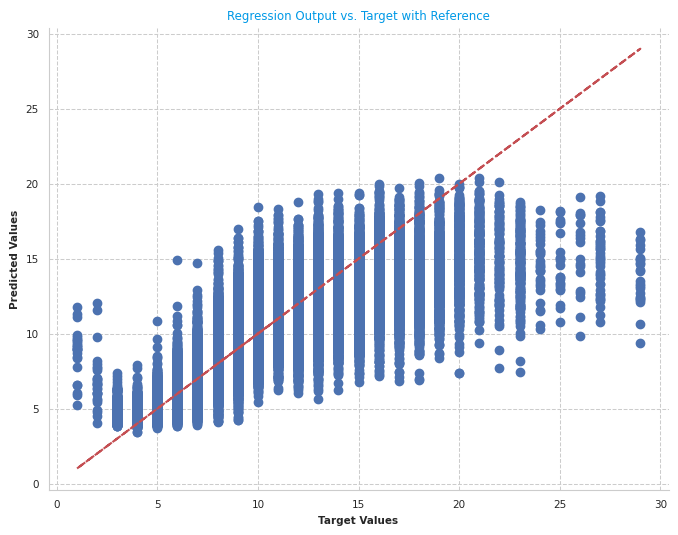

0.14792536158775518


In [ ]:
test_predictions = test_pred["LightGBM"]

plot_regression_scatter(log_orig_df_train["Rings"], oof["LightGBM"])
print(root_mean_squared_log_error(log_orig_df_train["Rings"],oof["LightGBM"]))

In [ ]:
test_pred["LightGBM"]

,Rings
id,
90615,9.684506
90616,9.786254
90617,9.953771
90618,10.696029
90619,7.575083
...,...
151021,6.393592
151022,9.250800
151023,12.406207


In [ ]:
train_df_results = pd.DataFrame(data=oof["LightGBM"], columns=["oof_lgbm_best"])
test_df_results = pd.DataFrame(data=test_pred["LightGBM"], columns=["pred_lgbm_best"], index=test_df.index)

#train_df_results.to_csv("results_ensemble/oof_lgbm_best.csv",index=False)
#test_df_results.to_csv("results_ensemble/test_lgbm_best.csv",index=False)

if run_lgb==0:
  create_sub_files(test_predictions_0, experiment_name = "lgbm_best_0")
  create_sub_files(test_predictions_1, experiment_name = "lgbm_best_1")

### 2.2 XGB Regressor:

#### Hyperparameter Tuning:

In [ ]:
def xgb_objective(trial):
    params = {'grow_policy':        "lossguide", #trial.suggest_categorical('grow_policy', ['lossguide', "depthwise"]),
              'objective':          'reg:squarederror',
              'tree_method':        'gpu_hist',
              'device':             "gpu",
              'enable_categorical': True,
              'verbosity':          0,
              'n_estimators' :      2000,
              'eta' :               0.0025,
              'booster' :           "gbtree", #trial.suggest_categorical('booster', ["gbtree", "dart"]),
              'max_depth' :         trial.suggest_int('max_depth', 5, 20),
              'subsample' :         trial.suggest_float('subsample', .30, 1.0, step=0.025),
              'colsample_bytree':   trial.suggest_float('colsample_bytree', .30, 1.0, step=0.05),
              'colsample_bylevel':  trial.suggest_float('colsample_bylevel', .30, 1.0, step=0.05),
              'gamma' :             trial.suggest_int('gamma', 3, 20),
              'min_child_weight' :  trial.suggest_float('min_child_weight', 1, 50),
              'reg_lambda' :        trial.suggest_float('reg_lambda', 1e-3, 100.0, log = True),
              'reg_alpha' :         trial.suggest_float('reg_alpha', 1e-3, 100.0, log = True),
              'max_bin' :           trial.suggest_int('max_bin', 256, 556, step=5),
              }

    optuna_model = TransformedTargetRegressor(XGBRegressor(**params),
                                              func=np.log1p,
                                              inverse_func=np.expm1)

    n_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight','lda_size_0', 'Sex', 'duplicate', 'lda_res_0']

    optuna_score = cross_validate_tuning(optuna_model, trial, features=n_features, train=log_orig_df_train, test=log_orig_df_test,
                                      target_feat="Rings", n_repeats=5, pruning=True, es=True, sample_weight=False, model_type="xgb")

    return np.mean(optuna_score)

if run_xgb==0:
  xgb_study = optuna.create_study(direction = 'minimize', study_name="xgb_opt_all",
                                  sampler = optuna.samplers.TPESampler(seed=42),
                                  pruner=optuna.pruners.MedianPruner(n_warmup_steps=51)
                                  )


* **Experiment 1**

  * RMLSE: 0.09123539019063343
  * Best hyperparameters: {'grow_policy': 'lossguide', 'booster': 'dart', 'max_depth': 13, 'subsample': 0.65, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.95, 'min_split_loss': 16, 'min_child_weight': 39.719046677849015, 'reg_lambda': 18.105996145026875, 'reg_alpha': 0.06486888302001761, 'max_bin': 466}

* **Experiment 2**
  * RMLSE: 0.0643865515779119
  * Best hyperparameters: {'max_depth': 14, 'subsample': 0.4, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.9500000000000001, 'min_split_loss': 16, 'min_child_weight': 42.13329556551022, 'reg_lambda': 0.9647154645009073, 'reg_alpha': 7.272981974094112, 'max_bin': 446}  

In [ ]:
if run_xgb==0:
  xgb_study.optimize(xgb_objective, 121, show_progress_bar=True)

In [ ]:
if run_xgb==0:
  trial = xgb_study.best_trial
  print('RMLSE: {}'.format(trial.value))
  print("Best hyperparameters: {}".format(trial.params))

In [ ]:
if run_xgb==0:
  fig = optuna.visualization.plot_optimization_history(xgb_study)
  fig.show()

In [ ]:
if run_xgb==0:
  fig = optuna.visualization.plot_param_importances(xgb_study)
  fig.show()

#### Fit

In [ ]:
if run_xgb==0:
  best_param =   {'max_depth': 8,
                  'subsample': 1.0,
                  'colsample_bytree': 0.85,
                  'colsample_bylevel': 0.55,
                  'gamma': 0,
                  'min_child_weight': 9.361489645968678,
                  'reg_lambda': 0.0025735020724174883,
                  'reg_alpha': 5.876753782633101,
                  'max_bin': 456,
                  'grow_policy': "lossguide",
                  'objective':   'reg:squarederror',
                  'tree_method': 'gpu_hist',
                  'device':      "gpu",
                  'enable_categorical': True,
                  'verbosity':   0,
                  'n_estimators':2000,
                  'eta' :0.0025,
                  'booster' :"gbtree"}

skf = StratifiedKFold(
                      n_splits = 5,
                      random_state = 42,
                      shuffle = True
                      )

In [ ]:
def cross_validate(model, label,  train, test, target_feat="Rings", features=[], n_repeats=1, rs_list=CFG.rs_list, COMPUTE_TEST_PRED=True, sample_weight=False, es=True, model_type="lgbm", n_splits=5):
    """Compute out-of-fold and test predictions for a given model.

    Out-of-fold and test predictions are stored in the global variables
    oof and test_pred, respectively.

    If n_repeats > 1, the model is trained several times with different seeds.

    All predictions are clipped to the interval [1, 29].
    """
    scores = []
    oof_preds = np.full_like(train[target_feat], np.nan, dtype=float)
    y_pred_test_final = np.zeros_like(test[features[0]], dtype=float)

    class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train[target_feat]), y=train[target_feat])
    weights_dict = dict(zip(np.unique(train[target_feat]),class_weights))
    weights = np.array([weights_dict[label] for label in train[target_feat]])

    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)
    for fold, (idx_tr, idx_va) in enumerate(kf.split(train, train[target_feat])):
        X_tr = train.iloc[idx_tr][features]
        X_va = train.iloc[idx_va][features]
        y_tr = train.iloc[idx_tr][target_feat]
        y_va = train.iloc[idx_va][target_feat]
        weights_fold = weights[idx_tr]

        y_pred = np.zeros_like(y_va, dtype=float)
        y_pred_test = np.zeros_like(test[features[0]], dtype=float)

        for i in range(n_repeats):
            m = clone(model)
            if n_repeats > 1:
                mm = m
                if isinstance(mm, Pipeline):
                    mm = mm[-1]
                if isinstance(mm, TransformedTargetRegressor):
                    mm = mm.regressor
                mm.set_params(random_state=rs_list[i])

            if 'lgbm' in model_type:
                fit_params={"eval_set":(X_va,y_va),
                            "callbacks":[]}

                if sample_weight==True:
                    fit_params["sample_weight"]=weights_fold
                if es==True:
                    fit_params["callbacks"].append(early_stopping(stopping_rounds=151))

                m.fit(X_tr, y_tr,**fit_params)

            if 'xgb' in model_type:

                fit_params={"eval_set":[(X_va,y_va)],
                            "callbacks":[]}

                if sample_weight==True:
                    fit_params["sample_weight"]=weights_fold

                if es==True:
                    fit_params["callbacks"].append(xgb.callback.EarlyStopping(rounds=101, save_best=True, metric_name='rmse'))

                m.fit(X_tr, y_tr, verbose=False, **fit_params)
            else:
                m.fit(X_tr, y_tr)

            y_pred += m.predict(X_va)
            y_pred_test += m.predict(test[features])/n_repeats
        y_pred /= n_repeats
        y_pred_test_final += y_pred_test/n_splits
        y_pred = y_pred.clip(1, 29)
        y_pred_test = y_pred_test.clip(1, 29)

        plot_regression_scatter(y_va,y_pred)

        score = mean_squared_log_error(y_va, y_pred, squared=False)
        print("#################################")
        print(f"# Fold {fold}: RMSLE={score:.5f}")
        print("#################################")
        scores.append(score)
        oof_preds[idx_va] = y_pred
    print(f"{Fore.GREEN}# Overall: {np.array(scores).mean():.5f} {label}{Style.RESET_ALL}")

    oof[label] = oof_preds
    y_pred_test_final_dict[label] =  y_pred_test_final

    if COMPUTE_TEST_PRED:
        y_pred = np.zeros(len(test), dtype=float)
        for i in range(n_repeats):
            m = clone(model)
            if n_repeats > 1:
                mm = m
                if isinstance(mm, Pipeline):
                    mm = mm[-1]
                if isinstance(mm, TransformedTargetRegressor):
                    mm = mm.regressor
                mm.set_params(random_state=i)

            m.fit(train[features], train[target_feat],verbose=False)
            y_pred += m.predict(test[features])
        y_pred /= n_repeats
        y_pred = y_pred.clip(1, 29)
        test_pred[label] = y_pred

In [ ]:
if run_xgb==0:
  model = TransformedTargetRegressor(XGBRegressor(**best_param),func=np.log1p,inverse_func=np.expm1)

In [ ]:
n_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight','lda_size_0', 'Sex', 'duplicate','lda_res_0', 'young_prob', 'elder_prob']

if run_xgb==0:
  cross_validate(model, label='Xgb_v0', train=log_orig_df_train, test=log_orig_df_test, target_feat="Rings", features=n_features,
                 n_repeats=5, rs_list=CFG.rs_list, COMPUTE_TEST_PRED=True, sample_weight=False, es=True, model_type="xgb")

In [ ]:
if run_xgb==1:
  oof["Xgb_v0"] = pd.read_csv("results_ensemble/oof_xgb_best.csv").values
  test_pred["Xgb_v0"] = pd.read_csv("results_ensemble/test_xgb_best.csv").values

In [ ]:
if run_xgb==0:
  test_predictions_0 = y_pred_test_final_dict["Xgb_v0"]
  test_predictions_1 = test_pred["Xgb_v0"]

  plot_regression_scatter(test_predictions_0, test_predictions_1)

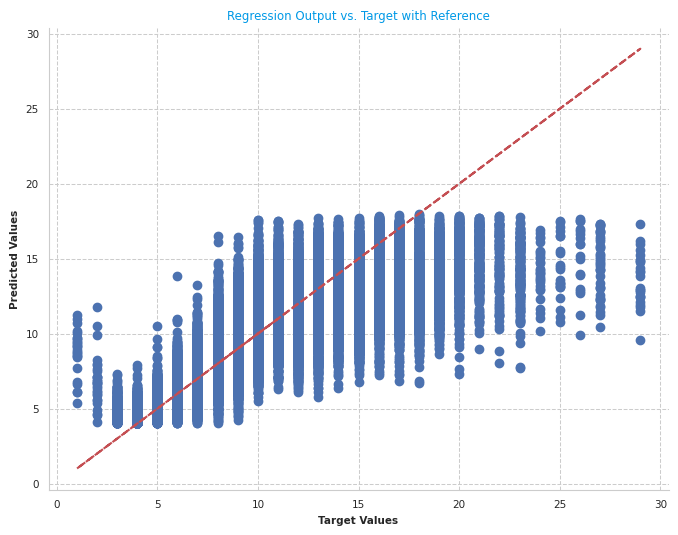

0.15038597180711347


In [ ]:
test_predictions = test_pred["Xgb_v0"]

plot_regression_scatter(log_orig_df_train["Rings"], oof["Xgb_v0"])
print(root_mean_squared_log_error(log_orig_df_train["Rings"],oof["Xgb_v0"]))

In [ ]:
train_df_results = pd.DataFrame(data=oof["Xgb_v0"], columns=["oof_xgb_best"])
test_df_results = pd.DataFrame(data=test_pred["Xgb_v0"], columns=["pred_xgb_best"], index=test_df.index)

#train_df_results.to_csv("results_ensemble/oof_xgb_best.csv",index=False)
#test_df_results.to_csv("results_ensemble/test_xgb_best.csv",index=False)

if run_xgb==0:
  create_sub_files(test_predictions_0, experiment_name = "xgb_best_0")
  create_sub_files(test_predictions_1, experiment_name = "xgb_best_1")

### 2.3 CatBoost Regressor:

In [ ]:
test_pred["LightGBM"]=test_pred["LightGBM"].values
test_pred

{'LightGBM': array([[ 9.68450567],
        [ 9.78625404],
        [ 9.95377082],
        ...,
        [12.40620706],
        [13.70989203],
        [ 8.0606976 ]]),
 'Xgb_v0': array([[ 9.62433395],
        [ 9.60697823],
        [ 9.88754539],
        ...,
        [10.93499088],
        [12.70058575],
        [ 8.35506039]])}

#### Hyperparameter Tuning:

In [ ]:
log_orig_df_train.duplicate = log_orig_df_train.duplicate.astype("int")
log_orig_df_test.duplicate = log_orig_df_test.duplicate.astype("int")

In [ ]:
def cat_objective(trial):
    cb_params = {'grow_policy':         "Depthwise", #trial.suggest_categorical('grow_policy',["SymmetricTree","Lossguide","Depthwise"]),
                 'loss_function':       'RMSE',
                 'eval_metric':         'RMSE',
                 'task_type':           'CPU',
                 'verbose':              0,
                 'n_estimators' :        2000,
                 'learning_rate' :       0.005,
                 'early_stopping_rounds': 101,
                 'cat_features':         ['Sex','duplicate'],
                 'boost_from_average':   True,
                 'colsample_bylevel'     : trial.suggest_float("colsample_bylevel", 0.4, 0.75, step=0.01), #
                 'max_depth'             : trial.suggest_int('max_depth', 10, 16), #
                 'l2_leaf_reg'           : trial.suggest_float("l2_leaf_reg", 0.001, 0.1, log=True), #
                 'min_data_in_leaf'      : trial.suggest_int('min_data_in_leaf', 35, 60),
                 'random_strength'       : trial.suggest_float("random_strength", 1.0, 8.5, step=0.01),
                 'max_bin'               : trial.suggest_int('max_bin', 301, 371, step=10),
                 "bootstrap_type"        : "Bayesian", #trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli"])
                 "bagging_temperature"   : trial.suggest_float('bagging_temperature', 4, 7),
                }



#    if cb_params["bootstrap_type"] == "Bayesian":
#        cb_params["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
#    elif cb_params["bootstrap_type"] == "Bernoulli":
#        cb_params["subsample"] = trial.suggest_float("subsample", 0.2, 1, log=True)
#    elif cb_params["grow_policy"] == "SymmetricTree":
#        cb_params["boosting_type"]  = trial.suggest_categorical("boosting_type", ["Ordered", "Plain"])

    optuna_model = TransformedTargetRegressor(CatBoostRegressor(**cb_params),
                                              func=np.log1p,
                                              inverse_func=np.expm1)

    n_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight','lda_size_0', 'Sex', 'duplicate', 'lda_res_0']

    optuna_score = cross_validate_tuning(optuna_model, trial, features=n_features, train=log_orig_df_train, test=log_orig_df_test,
                                      target_feat="Rings", n_repeats=5, pruning=True, es=True, sample_weight=False, model_type="cat")

    return np.mean(optuna_score)

if run_cat==0:
  cat_study = optuna.create_study(direction = 'minimize', study_name="cat_opt_all",
                                  sampler = optuna.samplers.TPESampler(seed=42),
                                  pruner=optuna.pruners.MedianPruner(n_warmup_steps=51)
                                  )


In [ ]:
if run_cat==2:
  cat_study.optimize(cat_objective, 101, show_progress_bar=True)

In [ ]:
if run_cat==2:
  trial = cat_study.best_trial
  print('RMLSE: {}'.format(trial.value))
  print("Best hyperparameters: {}".format(trial.params))

In [ ]:
if run_cat==2:
  fig = optuna.visualization.plot_optimization_history(cat_study)
  fig.show()

In [ ]:
if run_cat==2:
  fig = optuna.visualization.plot_param_importances(cat_study)
  fig.show()

#### Fit

* Trial 20 finished with value: 0.14960301878510368 and parameters: {'grow_policy': 'Depthwise', 'colsample_bylevel': 0.69, 'max_depth': 13, 'l2_leaf_reg': 0.01532631172769006, 'min_data_in_leaf': 41, 'random_strength': 7.9183519248025656, 'max_bin': 301, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 6.243756062819799}. Best is trial 20 with value: 0.14960301878510368

* Trial 22 finished with value: 0.14959585360635 and parameters: {'grow_policy': 'Depthwise', 'colsample_bylevel': 0.68, 'max_depth': 13, 'l2_leaf_reg': 0.007052778166958028, 'min_data_in_leaf': 40, 'random_strength': 8.190688301896271, 'max_bin': 351, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 5.921416487061257}. Best is trial 22 with value: 0.14959585360635.

* Trial 27 finished with value: 0.1495541128292245 and parameters: {'grow_policy': 'Depthwise', 'colsample_bylevel': 0.62, 'max_depth': 13, 'l2_leaf_reg': 0.010219869645526989, 'min_data_in_leaf': 36, 'random_strength': 4.5100852722680465, 'max_bin': 351, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 6.094934702074951}. Best is trial 27 with value: 0.1495541128292245

* Trial 31 finished with value: 0.14955703029498774 and parameters: {'grow_policy': 'Depthwise', 'colsample_bylevel': 0.69, 'max_depth': 13, 'l2_leaf_reg': 0.009996834270163764, 'min_data_in_leaf': 42, 'random_strength': 2.891214292961534, 'max_bin': 321, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 6.529903915970701}. Best is trial 27 with value: 0.1495541128292245

* Trial 32 finished with value: 0.14949857455228258 and parameters: {'grow_policy': 'Depthwise', 'colsample_bylevel': 0.62, 'max_depth': 13, 'l2_leaf_reg': 0.008901358255439086, 'min_data_in_leaf': 44, 'random_strength': 3.0481894048380456, 'max_bin': 331, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 5.522016518231883}. Best is trial 32 with value: 0.14949857455228258

* Trial 33 finished with value: 0.1494776900408342 and parameters: {'grow_policy': 'Depthwise', 'colsample_bylevel': 0.47, 'max_depth': 14, 'l2_leaf_reg': 0.001228046419350841, 'min_data_in_leaf': 53, 'random_strength': 2.382024189518554, 'max_bin': 331, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 5.2458409995049164}. Best is trial 33 with value: 0.1494776900408342

* Trial 0 finished with value: 0.1495137607134746 and parameters: {'colsample_bylevel': 0.53, 'max_depth': 16, 'l2_leaf_reg': 0.029106359131330698, 'min_data_in_leaf': 50, 'random_strength': 2.17, 'max_bin': 311, 'bagging_temperature': 4.174250836504599}.

* **Trial 10 finished with value: 0.14938685136022686 and parameters: {'colsample_bylevel': 0.59, 'max_depth': 14, 'l2_leaf_reg': 0.08691089486124963, 'min_data_in_leaf': 59, 'random_strength': 1.11, 'max_bin': 331, 'bagging_temperature': 4.045432711308271}. Best is trial 10 with value: 0.14938685136022686.**


In [ ]:
if run_cat==0:
  best_params = {'grow_policy':         "Depthwise",
                 'loss_function':       'RMSE',
                 'eval_metric':         'RMSE',
                 'task_type':           'CPU',
                 'verbose':              0,
                 'n_estimators' :        2000,
                 'learning_rate' :       0.005,
                 'early_stopping_rounds': 101,
                 'cat_features':         ['Sex','duplicate'],
                 'boost_from_average':   True,
                  'colsample_bylevel':   0.59,
                  'max_depth':           14,
                  'l2_leaf_reg':         0.08691089486124963,
                  'min_data_in_leaf':    59,
                  'random_strength':     1.11,
                  'max_bin':             331,
                  "bootstrap_type":      "Bayesian",
                  "bagging_temperature": 4.045432711308271
                  }

skf = StratifiedKFold(
                      n_splits = 5,
                      random_state = 42,
                      shuffle = True
                      )

In [ ]:
def cross_validate(model, label,  train, test, target_feat="Rings", features=[], n_repeats=1, rs_list=CFG.rs_list, COMPUTE_TEST_PRED=True, sample_weight=False, es=True, model_type="cat", n_splits=5):
    """Compute out-of-fold and test predictions for a given model.

    Out-of-fold and test predictions are stored in the global variables
    oof and test_pred, respectively.

    If n_repeats > 1, the model is trained several times with different seeds.

    All predictions are clipped to the interval [1, 29].
    """
    scores = []
    oof_preds = np.full_like(train[target_feat], np.nan, dtype=float)
    y_pred_test_final = np.zeros_like(test[features[0]], dtype=float)

    class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train[target_feat]), y=train[target_feat])
    weights_dict = dict(zip(np.unique(train[target_feat]),class_weights))
    weights = np.array([weights_dict[label] for label in train[target_feat]])

    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)
    for fold, (idx_tr, idx_va) in enumerate(kf.split(train, train[target_feat])):
        X_tr = train.iloc[idx_tr][features]
        X_va = train.iloc[idx_va][features]
        y_tr = train.iloc[idx_tr][target_feat]
        y_va = train.iloc[idx_va][target_feat]
        weights_fold = weights[idx_tr]

        y_pred = np.zeros_like(y_va, dtype=float)
        y_pred_test = np.zeros_like(test[features[0]], dtype=float)

        for i in range(n_repeats):
            m = clone(model)
            if n_repeats > 1:
                mm = m
                if isinstance(mm, Pipeline):
                    mm = mm[-1]
                if isinstance(mm, TransformedTargetRegressor):
                    mm = mm.regressor
                mm.set_params(random_state=rs_list[i])

            if 'lgbm' in model_type:
                fit_params={"eval_set":(X_va,y_va),
                            "callbacks":[]}

                if sample_weight==True:
                    fit_params["sample_weight"]=weights_fold
                if es==True:
                    fit_params["callbacks"].append(early_stopping(stopping_rounds=151))

                m.fit(X_tr, y_tr,**fit_params)

            if 'xgb' in model_type:

                fit_params={"eval_set":[(X_va,y_va)],
                            "callbacks":[]}

                if sample_weight==True:
                    fit_params["sample_weight"]=weights_fold

                if es==True:
                    fit_params["callbacks"].append(xgb.callback.EarlyStopping(rounds=101, save_best=True, metric_name='rmse'))

                m.fit(X_tr, y_tr, verbose=False, **fit_params)

            if 'cat' in model_type:

                fit_params={"eval_set":[(X_va,y_va)]}
                m.fit(X_tr, y_tr, **fit_params)

            else:
                m.fit(X_tr, y_tr)

            y_pred += m.predict(X_va)
            y_pred_test += m.predict(test[features])/n_repeats
        y_pred /= n_repeats
        y_pred_test_final += y_pred_test/n_splits
        y_pred = y_pred.clip(1, 29)
        y_pred_test = y_pred_test.clip(1, 29)

        plot_regression_scatter(y_va,y_pred)

        score = mean_squared_log_error(y_va, y_pred, squared=False)
        print("#################################")
        print(f"# Fold {fold}: RMSLE={score:.5f}")
        print("#################################")
        scores.append(score)
        oof_preds[idx_va] = y_pred
    print(f"{Fore.GREEN}# Overall: {np.array(scores).mean():.5f} {label}{Style.RESET_ALL}")

    oof[label] = oof_preds
    y_pred_test_final_dict[label] =  y_pred_test_final

    if COMPUTE_TEST_PRED:
        y_pred = np.zeros(len(test), dtype=float)
        for i in range(n_repeats):
            m = clone(model)
            if n_repeats > 1:
                mm = m
                if isinstance(mm, Pipeline):
                    mm = mm[-1]
                if isinstance(mm, TransformedTargetRegressor):
                    mm = mm.regressor
                mm.set_params(random_state=i)

            m.fit(train[features], train[target_feat])
            y_pred += m.predict(test[features])
        y_pred /= n_repeats
        y_pred = y_pred.clip(1, 29)
        test_pred[label] = y_pred

In [ ]:
if run_cat==0:
  model = TransformedTargetRegressor(CatBoostRegressor(**best_params),func=np.log1p,inverse_func=np.expm1)

In [ ]:
n_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight','lda_size_0', 'Sex', 'duplicate', 'lda_res_0']

if run_cat==0:
  cross_validate(model, label='cat_v0', train=log_orig_df_train, test=log_orig_df_test, target_feat="Rings", features=n_features,
                 n_repeats=5, rs_list=CFG.rs_list, COMPUTE_TEST_PRED=True, sample_weight=False, es=True, model_type="cat")

In [ ]:
if run_cat==1:
  oof["cat_v0"] = pd.read_csv("results_ensemble/oof_cat_best.csv").values
  test_pred["cat_v0"] = pd.read_csv("results_ensemble/test_cat_best.csv").values

In [ ]:
test_pred["cat_v0"]

array([[ 9.65127238],
       [ 9.63826099],
       [10.03578642],
       ...,
       [11.86917434],
       [12.97703541],
       [ 8.1954215 ]])

In [ ]:
if run_cat==0:
  test_predictions_0 = y_pred_test_final_dict["cat_v0"]
  test_predictions_1 = test_pred["cat_v0"]

  plot_regression_scatter(test_predictions_0, test_predictions_1)

In [ ]:
if run_cat==0:
  test_predictions_0 = y_pred_test_final_dict["cat_v0"]
  test_predictions_1 = test_pred["cat_v0"]

  plot_regression_scatter(test_predictions_0, test_predictions_1)

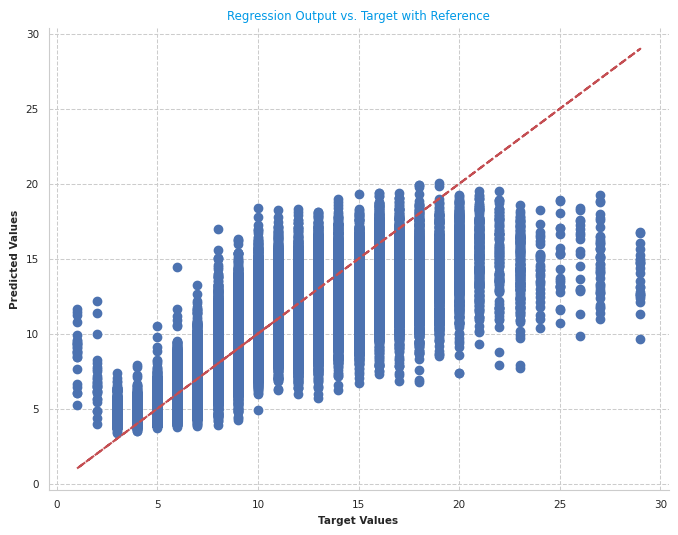

0.1493894626018401


In [ ]:
test_predictions = test_pred["cat_v0"]

plot_regression_scatter(log_orig_df_train["Rings"], oof["cat_v0"])
print(root_mean_squared_log_error(log_orig_df_train["Rings"],oof["cat_v0"]))

In [ ]:
test_predictions
test_pred

{'LightGBM': array([[ 9.68450567],
        [ 9.78625404],
        [ 9.95377082],
        ...,
        [12.40620706],
        [13.70989203],
        [ 8.0606976 ]]),
 'Xgb_v0': array([[ 9.62433395],
        [ 9.60697823],
        [ 9.88754539],
        ...,
        [10.93499088],
        [12.70058575],
        [ 8.35506039]]),
 'cat_v0': array([[ 9.65127238],
        [ 9.63826099],
        [10.03578642],
        ...,
        [11.86917434],
        [12.97703541],
        [ 8.1954215 ]])}

In [ ]:
train_df_results = pd.DataFrame(data=oof["cat_v0"], columns=["oof_cat_best"])
test_df_results = pd.DataFrame(data=test_pred["cat_v0"], columns=["pred_cat_best"], index=test_df.index)

#train_df_results.to_csv("results_ensemble/oof_cat_best.csv",index=False)
#test_df_results.to_csv("results_ensemble/test_cat_best.csv",index=False)

if run_cat==0:
  create_sub_files(test_predictions_0, experiment_name = "cat_best_0")
  create_sub_files(test_predictions_1, experiment_name = "cat_best_1")

### 2.4 Ridge Regressor:

#### Hyperparameter Tuning:

In [ ]:
log_orig_df_train.duplicate = log_orig_df_train.duplicate.astype("int")
log_orig_df_test.duplicate = log_orig_df_test.duplicate.astype("int")

In [ ]:
def ridge_objective(trial):

    optuna_model = make_pipeline(ColumnTransformer([('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), ['Sex','duplicate']),
                                                    ('stad_scaler',StandardScaler(),['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1','Whole weight.2', 'Shell weight']),
                                                    ('pln_feat',PolynomialFeatures(degree=trial.suggest_int('degree', 3, 4)),['log_Length', 'log_Diameter','log_Height', 'log_Whole weight',
                                                                                              'log_Whole weight.1','log_Whole weight.2', 'log_Shell weight'])],
                                                    remainder='passthrough'),


                                 TransformedTargetRegressor(Ridge(alpha=trial.suggest_float("alpha", 0.0001, 0.1, log=True)),
                                                            func=np.log1p,
                                                            inverse_func=np.expm1))

    n_features = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
                  'Whole weight.2', 'Shell weight', 'duplicate', 'lda_size_0',
                  'lda_res_0', 'young_prob', 'elder_prob', 'log_Length', 'log_Diameter',
                  'log_Height', 'log_Whole weight', 'log_Whole weight.1',
                  'log_Whole weight.2', 'log_Shell weight']

    optuna_score = cross_validate_tuning(optuna_model, trial, features=n_features, train=log_orig_df_train, test=log_orig_df_test,
                                      target_feat="Rings", n_repeats=5, pruning=True, es=True, sample_weight=False, model_type="Ridge")

    return np.mean(optuna_score)

if run_ridge==2:
  ridge_study = optuna.create_study(direction = 'minimize', study_name="ridge_opt_all",
                                  sampler = optuna.samplers.TPESampler(seed=42),
                                  pruner=optuna.pruners.MedianPruner(n_warmup_steps=51)
                                  )


In [ ]:
if run_ridge==2:
  ridge_study.optimize(ridge_objective, 21, show_progress_bar=True)

In [ ]:
if run_ridge==2:
  trial = ridge_study.best_trial
  print('RMLSE: {}'.format(trial.value))
  print("Best hyperparameters: {}".format(trial.params))

In [ ]:
if run_ridge==2:
  fig = optuna.visualization.plot_optimization_history(ridge_study)
  fig.show()

In [ ]:
if run_ridge==2:
  fig = optuna.visualization.plot_param_importances(ridge_study)
  fig.show()

#### Fit

* **Experiment 0**
  - RMLSE: 0.15300490387838955
  - Best hyperparameters: {'degree': 3, 'alpha': 0.0010003173605470552}

* **Experiment 1**
  - RMLSE: 0.15275521396767128
  - Best hyperparameters: {'degree': 4, 'alpha': 0.00010253050252218566}


In [ ]:
if run_ridge==0:
  best_params = {'degree': 4, 'alpha': 0.00010253050252218566}

skf = StratifiedKFold(
                      n_splits = 5,
                      random_state = 42,
                      shuffle = True
                      )

In [ ]:
def cross_validate(model, label,  train, test, target_feat="Rings", features=[], n_repeats=1, rs_list=CFG.rs_list, COMPUTE_TEST_PRED=True, sample_weight=False, es=True, model_type="cat", n_splits=5):
    """Compute out-of-fold and test predictions for a given model.

    Out-of-fold and test predictions are stored in the global variables
    oof and test_pred, respectively.

    If n_repeats > 1, the model is trained several times with different seeds.

    All predictions are clipped to the interval [1, 29].
    """
    scores = []
    oof_preds = np.full_like(train[target_feat], np.nan, dtype=float)
    y_pred_test_final = np.zeros_like(test[features[0]], dtype=float)

    class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train[target_feat]), y=train[target_feat])
    weights_dict = dict(zip(np.unique(train[target_feat]),class_weights))
    weights = np.array([weights_dict[label] for label in train[target_feat]])

    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)
    for fold, (idx_tr, idx_va) in enumerate(kf.split(train, train[target_feat])):
        X_tr = train.iloc[idx_tr][features]
        X_va = train.iloc[idx_va][features]
        y_tr = train.iloc[idx_tr][target_feat]
        y_va = train.iloc[idx_va][target_feat]
        weights_fold = weights[idx_tr]

        y_pred = np.zeros_like(y_va, dtype=float)
        y_pred_test = np.zeros_like(test[features[0]], dtype=float)

        for i in range(n_repeats):
            m = clone(model)
            if n_repeats > 1:
                mm = m
                if isinstance(mm, Pipeline):
                    mm = mm[-1]
                if isinstance(mm, TransformedTargetRegressor):
                    mm = mm.regressor
                mm.set_params(random_state=rs_list[i])

            if 'lgbm' in model_type:
                fit_params={"eval_set":(X_va,y_va),
                            "callbacks":[]}

                if sample_weight==True:
                    fit_params["sample_weight"]=weights_fold
                if es==True:
                    fit_params["callbacks"].append(early_stopping(stopping_rounds=151))

                m.fit(X_tr, y_tr,**fit_params)

            if 'xgb' in model_type:

                fit_params={"eval_set":[(X_va,y_va)],
                            "callbacks":[]}

                if sample_weight==True:
                    fit_params["sample_weight"]=weights_fold

                if es==True:
                    fit_params["callbacks"].append(xgb.callback.EarlyStopping(rounds=101, save_best=True, metric_name='rmse'))

                m.fit(X_tr, y_tr, verbose=False, **fit_params)

            if 'cat' in model_type:

                fit_params={"eval_set":[(X_va,y_va)]}
                m.fit(X_tr, y_tr, **fit_params)

            else:
                m.fit(X_tr, y_tr)

            y_pred += m.predict(X_va)
            y_pred_test += m.predict(test[features])/n_repeats
        y_pred /= n_repeats
        y_pred_test_final += y_pred_test/n_splits
        y_pred = y_pred.clip(1, 29)
        y_pred_test = y_pred_test.clip(1, 29)

        plot_regression_scatter(y_va,y_pred)

        score = mean_squared_log_error(y_va, y_pred, squared=False)
        print("#################################")
        print(f"# Fold {fold}: RMSLE={score:.5f}")
        print("#################################")
        scores.append(score)
        oof_preds[idx_va] = y_pred
    print(f"{Fore.GREEN}# Overall: {np.array(scores).mean():.5f} {label}{Style.RESET_ALL}")

    oof[label] = oof_preds
    y_pred_test_final_dict[label] =  y_pred_test_final

    if COMPUTE_TEST_PRED:
        y_pred = np.zeros(len(test), dtype=float)
        for i in range(n_repeats):
            m = clone(model)
            if n_repeats > 1:
                mm = m
                if isinstance(mm, Pipeline):
                    mm = mm[-1]
                if isinstance(mm, TransformedTargetRegressor):
                    mm = mm.regressor
                mm.set_params(random_state=i)

            m.fit(train[features], train[target_feat])
            y_pred += m.predict(test[features])
        y_pred /= n_repeats
        y_pred = y_pred.clip(1, 29)
        test_pred[label] = y_pred

In [ ]:
if run_ridge==0:
  model = make_pipeline(ColumnTransformer([('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), ['Sex','duplicate']),
                                                    ('stad_scaler',StandardScaler(),['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1','Whole weight.2', 'Shell weight']),
                                                    ('pln_feat',PolynomialFeatures(degree=4),['log_Length', 'log_Diameter','log_Height', 'log_Whole weight',
                                                                                              'log_Whole weight.1','log_Whole weight.2', 'log_Shell weight'])],
                                                    remainder='passthrough'),


                                 TransformedTargetRegressor(Ridge(alpha=0.00010253050252218566),
                                                            func=np.log1p,
                                                            inverse_func=np.expm1))

In [ ]:
n_features = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
                  'Whole weight.2', 'Shell weight', 'duplicate', 'lda_size_0',
                  'lda_res_0', 'young_prob', 'elder_prob', 'log_Length', 'log_Diameter',
                  'log_Height', 'log_Whole weight', 'log_Whole weight.1',
                  'log_Whole weight.2', 'log_Shell weight']

if run_ridge==0:
  cross_validate(model, label='ridge_v0', train=log_orig_df_train, test=log_orig_df_test, target_feat="Rings", features=n_features,
                 n_repeats=5, rs_list=CFG.rs_list, COMPUTE_TEST_PRED=True, sample_weight=False, es=True, model_type="ridge")

In [ ]:
if run_ridge==1:
  oof["ridge_v0"] = pd.read_csv("results_ensemble/oof_ridge_best.csv").values
  test_pred["ridge_v0"] = pd.read_csv("results_ensemble/test_ridge_best.csv").values

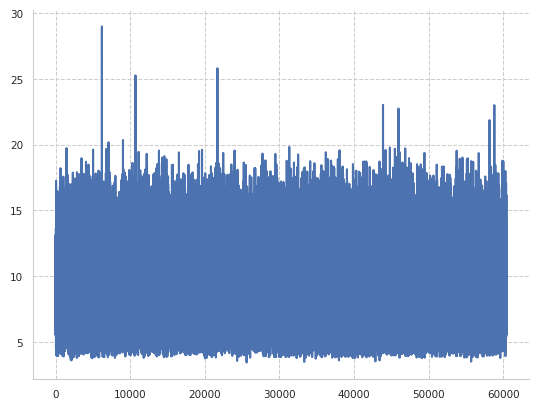

In [ ]:
plt.plot(test_pred["ridge_v0"])

In [ ]:
if run_ridge==0:
  test_predictions_0 = y_pred_test_final_dict["ridge_v0"]
  test_predictions_1 = test_pred["ridge_v0"]

  plot_regression_scatter(test_predictions_0, test_predictions_1)

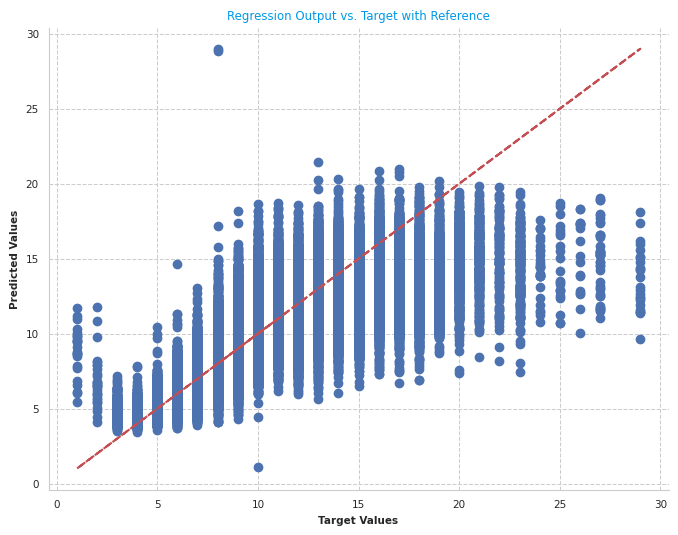

0.15275920028820061


In [ ]:
test_predictions = test_pred["ridge_v0"]

plot_regression_scatter(log_orig_df_train["Rings"], oof["ridge_v0"])
print(root_mean_squared_log_error(log_orig_df_train["Rings"],oof["ridge_v0"]))

In [ ]:
test_predictions
test_pred

{'LightGBM': array([[ 9.68450567],
        [ 9.78625404],
        [ 9.95377082],
        ...,
        [12.40620706],
        [13.70989203],
        [ 8.0606976 ]]),
 'Xgb_v0': array([[ 9.62433395],
        [ 9.60697823],
        [ 9.88754539],
        ...,
        [10.93499088],
        [12.70058575],
        [ 8.35506039]]),
 'cat_v0': array([[ 9.65127238],
        [ 9.63826099],
        [10.03578642],
        ...,
        [11.86917434],
        [12.97703541],
        [ 8.1954215 ]]),
 'ridge_v0': array([[ 9.46481268],
        [ 9.55287189],
        [10.01247648],
        ...,
        [10.95865993],
        [12.65663347],
        [ 8.15143832]])}

In [ ]:
train_df_results = pd.DataFrame(data=oof["ridge_v0"], columns=["oof_cat_best"])
test_df_results = pd.DataFrame(data=test_pred["ridge_v0"], columns=["pred_cat_best"], index=test_df.index)

train_df_results.to_csv("results_ensemble/oof_ridge_best.csv",index=False)
test_df_results.to_csv("results_ensemble/test_ridge_best.csv",index=False)

if run_ridge==0:
  create_sub_files(test_predictions_0, experiment_name = "ridge_best_0")
  create_sub_files(test_predictions_1, experiment_name = "ridge_best_1")


### 2.5 HuberRegressor:

#### Hyperparameter Tuning:

In [ ]:
def huber_objective(trial):

    optuna_model = make_pipeline(ColumnTransformer([('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), ['Sex','duplicate']),
                                                    ('stad_scaler',StandardScaler(),['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1','Whole weight.2', 'Shell weight']),
                                                    ('pln_feat',PolynomialFeatures(degree=4),['log_Length', 'log_Diameter','log_Height', 'log_Whole weight',
                                                                                              'log_Whole weight.1','log_Whole weight.2', 'log_Shell weight'])],
                                                    remainder='passthrough'),


                                 TransformedTargetRegressor(HuberRegressor(alpha=trial.suggest_float("alpha", 0.01, 10.0, log=True),
                                                                           epsilon = trial.suggest_float("epsilon", 1.35, 5.0, step=0.01)),
                                                            func=np.log1p,
                                                            inverse_func=np.expm1))

    n_features = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
                  'Whole weight.2', 'Shell weight', 'duplicate', 'lda_size_0',
                  'lda_res_0', 'young_prob', 'elder_prob', 'log_Length', 'log_Diameter',
                  'log_Height', 'log_Whole weight', 'log_Whole weight.1',
                  'log_Whole weight.2', 'log_Shell weight']

    optuna_score = cross_validate_tuning(optuna_model, trial, features=n_features, train=log_orig_df_train, test=log_orig_df_test,
                                      target_feat="Rings", n_repeats=5, pruning=True, es=True, sample_weight=False, model_type="huber")

    return np.mean(optuna_score)

if run_ridge==0:
  huber_study = optuna.create_study(direction = 'minimize', study_name="huber_opt_all",
                                  sampler = optuna.samplers.TPESampler(seed=42),
                                  pruner=optuna.pruners.MedianPruner(n_warmup_steps=51)
                                  )

In [ ]:
if run_huber==0:
  huber_study.optimize(huber_objective, 101, show_progress_bar=True)

In [ ]:
if run_huber==0:
  trial = huber_study.best_trial
  print('RMLSE: {}'.format(trial.value))
  print("Best hyperparameters: {}".format(trial.params))

In [ ]:
if run_huber==0:
  fig = optuna.visualization.plot_optimization_history(huber_study)
  fig.show()

In [ ]:
if run_huber==0:
  fig = optuna.visualization.plot_param_importances(huber_study)
  fig.show()

#### Fit

* **Experiment 0**
  - RMLSE: 0.15300490387838955
  - Best hyperparameters: {'degree': 3, 'alpha': 0.0010003173605470552}

* **Experiment 1**
  - RMLSE: 0.15275521396767128
  - Best hyperparameters: {'degree': 4, 'alpha': 0.00010253050252218566}


In [ ]:
if run_huber==0:
  best_params = {'degree': 4, 'alpha': 0.00010253050252218566}

skf = StratifiedKFold(
                      n_splits = 5,
                      random_state = 42,
                      shuffle = True
                      )

In [ ]:
def cross_validate(model, label,  train, test, target_feat="Rings", features=[], n_repeats=1, rs_list=CFG.rs_list, COMPUTE_TEST_PRED=True, sample_weight=False, es=True, model_type="cat", n_splits=5):
    """Compute out-of-fold and test predictions for a given model.

    Out-of-fold and test predictions are stored in the global variables
    oof and test_pred, respectively.

    If n_repeats > 1, the model is trained several times with different seeds.

    All predictions are clipped to the interval [1, 29].
    """
    scores = []
    oof_preds = np.full_like(train[target_feat], np.nan, dtype=float)
    y_pred_test_final = np.zeros_like(test[features[0]], dtype=float)

    class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train[target_feat]), y=train[target_feat])
    weights_dict = dict(zip(np.unique(train[target_feat]),class_weights))
    weights = np.array([weights_dict[label] for label in train[target_feat]])

    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)
    for fold, (idx_tr, idx_va) in enumerate(kf.split(train, train[target_feat])):
        X_tr = train.iloc[idx_tr][features]
        X_va = train.iloc[idx_va][features]
        y_tr = train.iloc[idx_tr][target_feat]
        y_va = train.iloc[idx_va][target_feat]
        weights_fold = weights[idx_tr]

        y_pred = np.zeros_like(y_va, dtype=float)
        y_pred_test = np.zeros_like(test[features[0]], dtype=float)

        for i in range(n_repeats):
            m = clone(model)
            if n_repeats > 1:
                mm = m
                if isinstance(mm, Pipeline):
                    mm = mm[-1]
                if isinstance(mm, TransformedTargetRegressor):
                    mm = mm.regressor
                if model_type=="huber":
                  pass
                else:
                  mm.set_params(random_state=rs_list[i])

            if 'lgbm' in model_type:
                fit_params={"eval_set":(X_va,y_va),
                            "callbacks":[]}

                if sample_weight==True:
                    fit_params["sample_weight"]=weights_fold
                if es==True:
                    fit_params["callbacks"].append(early_stopping(stopping_rounds=151))

                m.fit(X_tr, y_tr,**fit_params)

            if 'xgb' in model_type:

                fit_params={"eval_set":[(X_va,y_va)],
                            "callbacks":[]}

                if sample_weight==True:
                    fit_params["sample_weight"]=weights_fold

                if es==True:
                    fit_params["callbacks"].append(xgb.callback.EarlyStopping(rounds=101, save_best=True, metric_name='rmse'))

                m.fit(X_tr, y_tr, verbose=False, **fit_params)

            if 'cat' in model_type:

                fit_params={"eval_set":[(X_va,y_va)]}
                m.fit(X_tr, y_tr, **fit_params)

            else:
                m.fit(X_tr, y_tr)

            y_pred += m.predict(X_va)
            y_pred_test += m.predict(test[features])/n_repeats
        y_pred /= n_repeats
        y_pred_test_final += y_pred_test/n_splits
        y_pred = y_pred.clip(1, 29)
        y_pred_test = y_pred_test.clip(1, 29)

        plot_regression_scatter(y_va,y_pred)

        score = mean_squared_log_error(y_va, y_pred, squared=False)
        print("#################################")
        print(f"# Fold {fold}: RMSLE={score:.5f}")
        print("#################################")
        scores.append(score)
        oof_preds[idx_va] = y_pred
    print(f"{Fore.GREEN}# Overall: {np.array(scores).mean():.5f} {label}{Style.RESET_ALL}")

    oof[label] = oof_preds
    y_pred_test_final_dict[label] =  y_pred_test_final

    if COMPUTE_TEST_PRED:
        y_pred = np.zeros(len(test), dtype=float)
        for i in range(n_repeats):
            m = clone(model)
            if n_repeats > 1:
                mm = m
                if isinstance(mm, Pipeline):
                    mm = mm[-1]
                if isinstance(mm, TransformedTargetRegressor):
                    mm = mm.regressor
                if model_type=="huber":
                  pass
                else:
                  mm.set_params(random_state=rs_list[i])


            m.fit(train[features], train[target_feat])
            y_pred += m.predict(test[features])
        y_pred /= n_repeats
        y_pred = y_pred.clip(1, 29)
        test_pred[label] = y_pred

In [ ]:
if run_huber==0:
  model = make_pipeline(ColumnTransformer([('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), ['Sex','duplicate']),
                                                    ('stad_scaler',StandardScaler(),['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1','Whole weight.2', 'Shell weight']),
                                                    ('pln_feat',PolynomialFeatures(degree=4),['log_Length', 'log_Diameter','log_Height', 'log_Whole weight',
                                                                                              'log_Whole weight.1','log_Whole weight.2', 'log_Shell weight'])],
                                                    remainder='passthrough'),


                                 TransformedTargetRegressor(HuberRegressor(alpha= 0.04638281409102048, epsilon= 2.76),
                                                            func=np.log1p,
                                                            inverse_func=np.expm1))

In [ ]:
n_features = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
                  'Whole weight.2', 'Shell weight', 'duplicate', 'lda_size_0',
                  'lda_res_0', 'young_prob', 'elder_prob', 'log_Length', 'log_Diameter',
                  'log_Height', 'log_Whole weight', 'log_Whole weight.1',
                  'log_Whole weight.2', 'log_Shell weight']

if run_huber==0:
  cross_validate(model, label='huber_v0', train=log_orig_df_train, test=log_orig_df_test, target_feat="Rings", features=n_features,
                 n_repeats=5, rs_list=CFG.rs_list, COMPUTE_TEST_PRED=True, sample_weight=False, es=True, model_type="huber")

In [ ]:
if run_huber==1:
  oof["huber_v0"] = pd.read_csv("results_ensemble/oof_huber_best.csv").values
  test_pred["huber_v0"] = pd.read_csv("results_ensemble/test_huber_best.csv").values

In [ ]:
test_pred["huber_v0"]

array([[ 9.29951841],
       [ 9.72366089],
       [10.0912135 ],
       ...,
       [10.24700626],
       [12.78087951],
       [ 8.39606633]])

In [ ]:
if run_huber==0:
  test_predictions_0 = y_pred_test_final_dict["huber_v0"]
  test_predictions_1 = test_pred["huber_v0"]

  plot_regression_scatter(test_predictions_0, test_predictions_1)

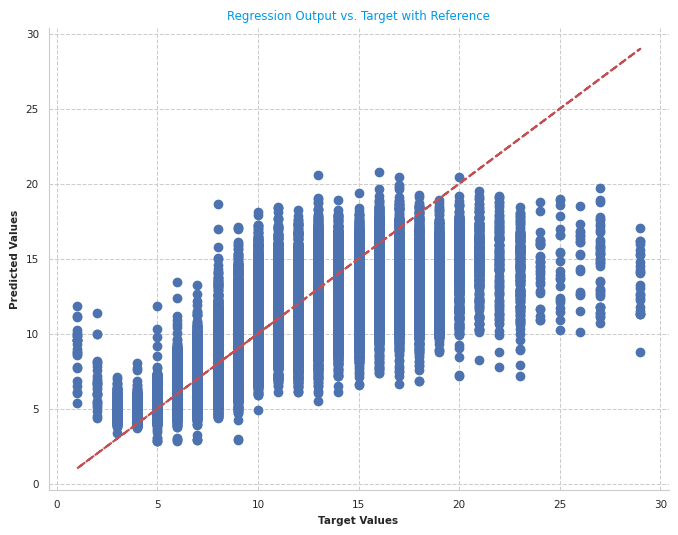

0.15469816432449054


In [ ]:
test_predictions = test_pred["huber_v0"]

plot_regression_scatter(log_orig_df_train["Rings"], oof["huber_v0"])
print(root_mean_squared_log_error(log_orig_df_train["Rings"],oof["huber_v0"]))

In [ ]:
test_predictions
test_pred

{'LightGBM': array([[ 9.68450567],
        [ 9.78625404],
        [ 9.95377082],
        ...,
        [12.40620706],
        [13.70989203],
        [ 8.0606976 ]]),
 'Xgb_v0': array([[ 9.62433395],
        [ 9.60697823],
        [ 9.88754539],
        ...,
        [10.93499088],
        [12.70058575],
        [ 8.35506039]]),
 'cat_v0': array([[ 9.65127238],
        [ 9.63826099],
        [10.03578642],
        ...,
        [11.86917434],
        [12.97703541],
        [ 8.1954215 ]]),
 'ridge_v0': array([[ 9.46481268],
        [ 9.55287189],
        [10.01247648],
        ...,
        [10.95865993],
        [12.65663347],
        [ 8.15143832]]),
 'huber_v0': array([[ 9.29951841],
        [ 9.72366089],
        [10.0912135 ],
        ...,
        [10.24700626],
        [12.78087951],
        [ 8.39606633]])}

In [ ]:
train_df_results = pd.DataFrame(data=oof["huber_v0"], columns=["oof_cat_best"])
test_df_results = pd.DataFrame(data=test_pred["huber_v0"], columns=["pred_cat_best"], index=test_df.index)

#train_df_results.to_csv("results_ensemble/oof_huber_best.csv",index=False)
#test_df_results.to_csv("results_ensemble/test_huber_best.csv",index=False)

if run_ridge==0:
  create_sub_files(test_predictions_0, experiment_name = "huber_best_0")
  create_sub_files(test_predictions_1, experiment_name = "huber_best_1")

## 3.0 Models: ANN

In [ ]:
seed = 42
splits = 3
n_repeats = 3
skf = StratifiedKFold(n_splits = splits, random_state = seed, shuffle = True)

In [ ]:
train_df.duplicate = train_df.duplicate.astype("int")
test_df.duplicate = test_df.duplicate.astype("int")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 0 to 90614
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           90615 non-null  int64  
 1   duplicate     90615 non-null  int64  
 2   Sex_enc       90615 non-null  float64
 3   size_cluster  90615 non-null  int64  
 4   Rings         90615 non-null  int64  
 5   lda_size_0    90615 non-null  float64
 6   lda_size_1    90615 non-null  float64
 7   lda_size_2    90615 non-null  float64
 8   lda_size_3    90615 non-null  float64
 9   lda_res_0     90615 non-null  float64
 10  lda_res_1     90615 non-null  float64
 11  lda_res_2     90615 non-null  float64
 12  young_prob    90615 non-null  float64
 13  elder_prob    90615 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 12.4 MB


In [ ]:
len(train_df["Rings"].unique())

28

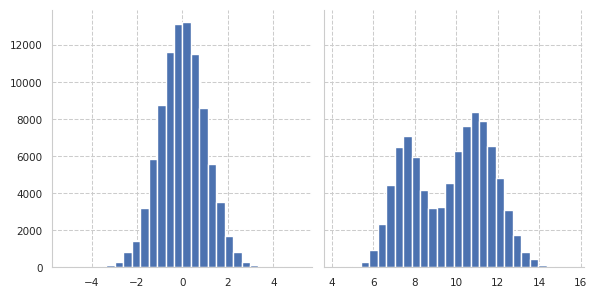

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(6,3), sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(train_df.iloc[:,random.randint(0, len(test_df.columns)-1)], bins=28)
axs[1].hist(train_df.loc[:,"Sex_enc"], bins=28);

In [ ]:
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train_df["Rings"]), y=train_df["Rings"])
weights_dict = dict(enumerate(class_weights, start=1))
weights_dict[29]=weights_dict[28]

train_df["weights"] = train_df["Rings"]
test_df["weights"] = 1.0
train_df["weights"].replace(weights_dict, inplace=True)

y = train_df["Rings"]
test_df["Rings"]=0

#train_df.drop(columns=["id","Status"],inplace=True)
#test_df.drop(columns=["id","Status"],inplace=True)

num_var = train_df.drop(columns = ["Rings","weights"]).select_dtypes("float").columns
cat_var = train_df.drop(columns = ["Rings","weights"]).select_dtypes("int").columns

num_var = list(num_var)
cat_var = list(cat_var)

train_df[num_var]=train_df[num_var].astype("float32")
train_df[cat_var]=train_df[cat_var].astype("int32")

test_df[num_var]=test_df[num_var].astype("float32")
test_df[cat_var]=test_df[cat_var].astype("int32")

train_df["weights"]=train_df["weights"].astype("float32")
test_df["weights"]=test_df["weights"].astype("float32")

train_df["Rings"]=train_df["Rings"].astype("float32")

train_df.info()

train_final = train_df.drop(columns="Sex_enc")
test_final = test_df.drop(columns="Sex_enc")

<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 0 to 90614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           90615 non-null  int32  
 1   duplicate     90615 non-null  int32  
 2   Sex_enc       90615 non-null  float32
 3   size_cluster  90615 non-null  int32  
 4   Rings         90615 non-null  float32
 5   lda_size_0    90615 non-null  float32
 6   lda_size_1    90615 non-null  float32
 7   lda_size_2    90615 non-null  float32
 8   lda_size_3    90615 non-null  float32
 9   lda_res_0     90615 non-null  float32
 10  lda_res_1     90615 non-null  float32
 11  lda_res_2     90615 non-null  float32
 12  young_prob    90615 non-null  float32
 13  elder_prob    90615 non-null  float32
 14  weights       90615 non-null  float32
dtypes: float32(12), int32(3)
memory usage: 7.9 MB


### - NN Utility Functions

In [ ]:
def RMSLE_nn(y_pred:tf.Tensor, y_true:tf.Tensor) -> tf.float64:
    """
    The Root Mean Squared Log Error (RMSLE) metric for TensorFlow / Keras

    :param y_true: The ground truth labels given in the dataset
    :param y_pred: Predicted values
    :return: The RMSLE score
    """
    y_pred = tf.cast(y_pred, tf.float64)
    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.nn.relu(y_pred)
    return tf.sqrt(tf.reduce_mean(tf.squared_difference(tf.log1p(y_pred), tf.log1p(y_true))))

class dense_block(tf.keras.layers.Layer):
    def __init__(self, units, dropout_rate=0.25, activation="relu", kr=0, name="drb"):   #tf.keras.regularizers.L2(l2=0.01)
        super(dense_block, self).__init__()
        self.units = units

        self.linear_dense = tf.keras.layers.Dense(units, name=f"lin_dense_0_{name}")
        self.project = tf.keras.layers.Dense(units, name=f"lin_dense_prj_{name}")

        self.batchnorm_0 = tf.keras.layers.BatchNormalization(name=f"bn_0_{name}")
        self.dropout = tf.keras.layers.Dropout(dropout_rate,name=f"do_0_{name}")

        if activation=="gelu":
          self.activation_0 = tf.keras.activations.gelu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="relu":
          self.activation_0 = tf.keras.activations.relu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="elu":
          self.activation_0 = tf.keras.activations.elu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="swish":
          self.activation_0 = tf.keras.activations.swish
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="selu":
          self.activation_0 = tf.keras.activations.selu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="lecun_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="leaky_relu":
          self.activation_0 = tf.keras.layers.LeakyReLU()
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="prelu":
          self.activation_0 = tf.keras.layers.PReLU()
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")

    def call(self, inputs):

        x = self.dense_0(inputs)
        x = self.batchnorm_0(x)
        x = self.activation_0(x)
        x = self.dropout(x)

        return x

class dense_residual_block(tf.keras.layers.Layer):
    def __init__(self, units, dropout_rate=0.25, activation="relu", kr=0, attention=False, name="drb", norm="batch"):   #tf.keras.regularizers.L2(l2=0.01)
        super(dense_residual_block, self).__init__()
        self.units = units

        self.linear_dense = tf.keras.layers.Dense(units, name=f"lin_dense_0_{name}")
        self.project = tf.keras.layers.Dense(units, name=f"lin_dense_prj_{name}")

        if norm=="batch":
          self.batchnorm_0 = tf.keras.layers.BatchNormalization(name=f"bn_0_{name}")
          self.batchnorm_1 = tf.keras.layers.BatchNormalization(name=f"bn_1_{name}")
          self.batchnorm_prj = tf.keras.layers.BatchNormalization(name=f"bn_prj_{name}")  #LayerNormalization()

        if norm=="layer":
          self.batchnorm_0 = tf.keras.layers.LayerNormalization(name=f"bn_0_lr_{name}")
          self.batchnorm_1 = tf.keras.layers.LayerNormalization(name=f"bn_1_lr_{name}")
          self.batchnorm_prj = tf.keras.layers.LayerNormalization(name=f"bn_prj_lr_{name}")  #LayerNormalization()


        self.layer_norm = tf.keras.layers.BatchNormalization(name=f"bn_2_{name}")
        self.dropout = tf.keras.layers.Dropout(dropout_rate,name=f"do_0_{name}")
        self.add_layer = tf.keras.layers.Add(name=f"add_0_{name}")

        self.attention=attention
        self.attention_layer = tf.keras.layers.Attention(name=f"attention_{name}")

        if activation=="gelu":
          self.activation_0 = tf.keras.activations.gelu
          self.activation_1 = tf.keras.activations.gelu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal",
                                               kernel_regularizer = tf.keras.regularizers.L2(l2=kr),
                                               name=f"dense_0_{name}")
        if activation=="relu":
          self.activation_0 = tf.keras.activations.relu
          self.activation_1 = tf.keras.activations.relu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal",
                                               kernel_regularizer = tf.keras.regularizers.L2(l2=kr),
                                               name=f"dense_0_{name}")
        if activation=="elu":
          self.activation_0 = tf.keras.activations.elu
          self.activation_1 = tf.keras.activations.elu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal",
                                               kernel_regularizer = tf.keras.regularizers.L2(l2=kr),
                                               name=f"dense_0_{name}")
        if activation=="swish":
          self.activation_0 = tf.keras.activations.swish
          self.activation_1 = tf.keras.activations.swish
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal",
                                               kernel_regularizer = tf.keras.regularizers.L2(l2=kr),
                                               name=f"dense_0_{name}")
        if activation=="selu":
          self.activation_0 = tf.keras.activations.selu
          self.activation_1 = tf.keras.activations.selu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="lecun_normal",
                                               kernel_regularizer = tf.keras.regularizers.L2(l2=kr),
                                               name=f"dense_0_{name}")
        if activation=="leaky_relu":
          self.activation_0 = tf.keras.layers.LeakyReLU()
          self.activation_1 = tf.keras.layers.LeakyReLU()
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal",
                                               kernel_regularizer = tf.keras.regularizers.L2(l2=kr),
                                               name=f"dense_0_{name}")
        if activation=="prelu":
          self.activation_0 = tf.keras.layers.PReLU()
          self.activation_1 = tf.keras.layers.PReLU()
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal",
                                               kernel_regularizer = tf.keras.regularizers.L2(l2=kr),
                                               name=f"dense_0_{name}")

    def call(self, inputs):

        if self.attention==True:
          attention = self.attention_layer([inputs, inputs])
        else:
          attention = inputs

        x = self.dense_0(attention)
        x = self.batchnorm_0(x)
        x = self.activation_0(x)
        x = self.dropout(x)

        x = self.linear_dense(x)
        x = self.batchnorm_1(x)

        if attention.shape[-1] != self.units:
            inputs = self.project(attention)
            inputs = self.batchnorm_prj(inputs)

        return self.add_layer([x, inputs])


def create_mlp(hidden_units, dropout_rate, activation, normalization_layer, name=None):
    mlp_layers = []
    if activation=="relu":
        activation_0 = tf.keras.activations.relu
    if activation=="prelu":
        activation_0 = tf.keras.layers.PReLU()
    if activation=="elu":
        activation_0 = tf.keras.activations.elu
    if activation=="swish":
        activation_0 = tf.keras.activations.swish
    if activation=="selu":
        activation_0 = tf.keras.activations.selu
    if activation=="leaky_relu":
        activation_0 = tf.keras.layers.LeakyReLU()
    if activation=="gelu":
        activation_0 = tf.keras.activations.gelu

    for units in hidden_units:
        mlp_layers.append(normalization_layer()),
        if activation == "selu":
          mlp_layers.append(layers.Dense(units, activation=activation_0, kernel_initializer="lecun_normal"))
          mlp_layers.append(layers.AlphaDropout(dropout_rate))
        else:
          if activation in ["prelu","leaky_relu"]:
            mlp_layers.append(layers.Dense(units))
            mlp_layers.append(activation_0)
            mlp_layers.append(layers.Dropout(dropout_rate))
          else:
            mlp_layers.append(layers.Dense(units,activation=activation_0))
            mlp_layers.append(layers.Dropout(dropout_rate))

    return keras.Sequential(mlp_layers, name=name)

### 3.1 Data Manager

In [ ]:
#train_df.groupby(["Rings"])["weights"].agg(["count","mean"])

In [ ]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe["Rings"]
    dataframe = dataframe.drop(columns=["Rings"])
    weights = dataframe.pop("weights")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels, weights))
    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds

train_ds = dataframe_to_dataset(train_final,batch_size=32)
test_ds = dataframe_to_dataset(test_final,batch_size=32)

num_var = ['lda_size_0', 'lda_size_1', 'lda_size_2', 'lda_size_3', 'lda_res_0','lda_res_1', 'lda_res_2']
norm_var = ['young_prob', 'elder_prob']
cat_var = train_final.drop(columns = ["Rings","weights"]).select_dtypes("int").columns

In [ ]:
feature_space_dict = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_var},**{a:FeatureSpace.float() for a in num_var},**{a:FeatureSpace.float_normalized() for a in norm_var}},
                                  # Specify feature cross with a custom crossing dim.
                                  # crosses=[FeatureSpace.cross(feature_names=("Sex","size_cluster"), crossing_dim=10, output_mode="int")],
                                  output_mode="dict"
                                  )

In [ ]:
%%time
train_ds_with_no_labels = train_ds.map(tf.autograph.experimental.do_not_convert(lambda x, *_: x))
feature_space_dict.adapt(train_ds_with_no_labels)

CPU times: user 26 s, sys: 1.55 s, total: 27.5 s
Wall time: 18.4 s


In [ ]:
for x, y, w in train_ds.take(1):
    preprocessed_x = feature_space_dict(x)
    print("preprocessed_x.keys:", preprocessed_x.keys())
    print("preprocessed_x tot Keys:", len(preprocessed_x.keys()))
    print("preprocessed_y.shape:", y.shape)
    print("preprocessed_w.shape:", w.shape)

preprocessed_x.keys: dict_keys(['Sex', 'duplicate', 'elder_prob', 'lda_res_0', 'lda_res_1', 'lda_res_2', 'lda_size_0', 'lda_size_1', 'lda_size_2', 'lda_size_3', 'size_cluster', 'young_prob'])
preprocessed_x tot Keys: 12
preprocessed_y.shape: (32,)
preprocessed_w.shape: (32,)


In [ ]:
preprocessed_train_ds_dict = train_ds.map(lambda x, y, w: (feature_space_dict(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
preprocessed_test_ds_dict = test_ds.map(lambda x, y, w: (feature_space_dict(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [ ]:
full_cat = [x for x in cat_var]
#full_cat.append("Sex_X_size_cluster")
print(full_cat)

['Sex', 'duplicate', 'size_cluster']


In [ ]:
Cat_Feat_Entries = {}
for f in cat_var:
  Cat_Feat_Entries[f]=list(train_df[f].unique())
  #Cat_Feat_Entries["Sex_X_size_cluster"] = list(range(10))

In [ ]:
encoded_features_dict = feature_space_dict.get_encoded_features()
print(encoded_features_dict)

{'Sex': <KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_12>, 'duplicate': <KerasTensor shape=(None, 21), dtype=float32, sparse=False, name=keras_tensor_13>, 'elder_prob': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_11>, 'lda_res_0': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=keras_tensor_7>, 'lda_res_1': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=keras_tensor_8>, 'lda_res_2': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=keras_tensor_9>, 'lda_size_0': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=keras_tensor_3>, 'lda_size_1': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=keras_tensor_4>, 'lda_size_2': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=keras_tensor_5>, 'lda_size_3': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=keras_tensor_6>, 'size_cluster': <KerasTensor shape=(None, 8), dtype=float32, sp

##### **3.1.1 Encoding Function**

In [ ]:
def encode_inputs(inputs, add_dense_layer = False, dense_dim_cat = 4, num_dense_exp=True, dense_dim_num = 4,
                  list_categorical_nn=full_cat, Cat_Feat_Entries=encoded_features_dict,  name="enc"):

    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for feature_name in inputs:
      if feature_name in list_categorical_nn:

        vocabulary = Cat_Feat_Entries[feature_name]
        #print(vocabulary,vocabulary.shape[1])

        embedding = layers.Embedding(input_dim=vocabulary.shape[1], output_dim=int(np.round(np.log1p(vocabulary.shape[1])+1.1,0)), name=f"{feature_name}_embedding")
        # Convert the index values to embedding representations.
        encoded_categorical_feature = embedding(inputs[feature_name])

        if add_dense_layer==True:
          encoded_categorical_feature = tf.keras.layers.Dense(dense_dim_cat, name=f"cat_dense_{feature_name}_{name}")(encoded_categorical_feature)
          #encoded_categorical_feature = keras.layers.Reshape((dense_dim_cat,-1), name=f"cat_reshape_{feature_name}_{name}")(encoded_categorical_feature)

        encoded_categorical_feature_list.append(encoded_categorical_feature)

      else:
        # Use the numerical features as-is.
        numerical_feature = inputs[feature_name] #tf.expand_dims(inputs[feature_name], -1)

        if num_dense_exp==True:
          numerical_feature = tf.keras.layers.Dense(dense_dim_num, name=f"num_dense_{feature_name}_{name}")(numerical_feature)

        numerical_feature_list.append(numerical_feature)

#    for feat in encoded_categorical_feature_list:
#      print(feat.name, feat.shape)
#    for feat in numerical_feature_list:
#      print(feat.name, feat.shape)

    return encoded_categorical_feature_list, numerical_feature_list

### 3.2 Training Function:

In [ ]:
def run_experiment(func_model, train, test_data, best_params, experiment_name="baseline_nn", splits=5, n_repeats=5, rs=42, target="Rings",batch_size=32, num_epochs=200, learning_rate=0.005):

  skf = RepeatedStratifiedKFold(n_splits=splits, n_repeats=n_repeats, random_state=rs)

  test_predictions = np.zeros((len(test_df),1))
  test_results_df = pd.DataFrame(index=test_data.index, columns=[target])

  all_logloss = []
  all_RMLSE_pr = []
  oof_results = np.empty(shape=(train.shape[0],1))

  for i, (train_index, valid_index) in enumerate(skf.split(train,train[target])):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = train.iloc[train_index,:]
    X_val = train.iloc[valid_index,:]

    X = X_trn.drop(columns=[target]).copy()
    y = X_trn[target].copy()

    val_X = X_val.drop(columns=[target]).copy()
    val_y = X_val[target].copy()

    X_test = test_data.copy()
    #################################################################### Prepare Datasets loaders:

    train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)

    feature_space_dict = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_var},**{a:FeatureSpace.float() for a in num_var},**{a:FeatureSpace.float_normalized() for a in norm_var}},
                                  # Specify feature cross with a custom crossing dim.
                                  #crosses=[FeatureSpace.cross(feature_names=("Steel_Plate_Thickness","TypeOfSteel_A300"), crossing_dim=10, output_mode="one_hot")],
                                  output_mode="dict"
                                  )

    train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
    print("Adapting Features Space....")
    feature_space_dict.adapt(train_ds_with_no_labels)

    preprocessed_train_ds = train_dataset.map(lambda x, y, w: (feature_space_dict(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    preprocessed_valid_ds = valid_dataset.map(lambda x, y, w: (feature_space_dict(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    preprocessed_test_ds = test_dataset.map(lambda x, y, w: (feature_space_dict(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

    ##################################################################### Relevant Folders
    folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/{experiment_name}/"
    folders_experiment_cv1 = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/"
    folders_experiment_cv2= f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/{experiment_name}"
    folders_experiment_cv3 = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/{experiment_name}/cv_{i}/"
    folder_data = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/S4E4_Abalone"
    list_directories = [folder_data,folders_experiment,folders_experiment_cv1,folders_experiment_cv2,folders_experiment_cv3]

    for path in list_directories:
      try:
          os.mkdir(path)
      except OSError as error:
          print(f"{path} already exists")
    ##################################################################### Generate and Fit Model
    # Callbacks:
    checkpoint_filepath = folders_experiment + f'checkpoint/{experiment_name}.weights.h5'

    # Generate the Model:
    model = func_model(feature_space_dict, name=experiment_name, learning_rate = learning_rate, **best_params)

    print("Start training the model...")
    history = model.fit(preprocessed_train_ds,
                        epochs=num_epochs,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_msle', patience=21, mode="min",
                                                  start_from_epoch=5,restore_best_weights=True),
                                   keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_msle",
                                                    mode='min',
                                                    save_best_only=True),
                                   keras.callbacks.ReduceLROnPlateau(monitor='val_msle', factor=0.5,
                                                          patience=5, min_lr=0.0001, mode="min")],
                        validation_data=preprocessed_valid_ds)
    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    model.evaluate(preprocessed_valid_ds, verbose=0)

    plot_training_session(history)

    oof_res = model.predict(preprocessed_valid_ds)
    test_prob = model.predict(preprocessed_test_ds)

    oof_res = oof_res.clip(1,29)
    test_prob = test_prob.clip(1,29)

    print(f"Out-of-Fold Shapes: {oof_results[valid_index].shape},{oof_res.shape}")

    oof_results[valid_index] += oof_res/n_repeats
    rmsle_score = root_mean_squared_log_error(val_y, oof_res)

    test_predictions += test_prob/skf.get_n_splits()

    ##################################################################### Save the Model
    model.save(f"{folders_experiment_cv3}/model_{experiment_name}.keras")
    feature_space_dict.save(f"{folders_experiment_cv3}/myfeaturespace_{experiment_name}.keras")

    print(f"Test RMSLE Score: {round(rmsle_score, 3)}%")
    all_RMLSE_pr.append(round(rmsle_score, 3))

    gc.collect()

  ##################################################################### Create Model Output
  test_results_df.loc[:,:] = test_predictions

  print(f"All Valuation RMLSE: {all_RMLSE_pr}")

  return test_results_df, oof_results

### 3.3 **MODELS**:

#### **3.3.1 Baseline with weights:**

In [ ]:
def create_baseline_model(fs, name="baseline",learning_rate = 0.001,
                          activation="relu",gn_noise=0.025, dropout=0.5, sp_dropout=0.25, hidden_layers=4,
                          units_0=256, units_1=128, add_dense_layer=False, dense_dim_cat=12, num_dense_exp=False,
                          dense_dim_num=4, kr=0):

  encoded_features = fs.get_encoded_features()
  # Wide Leg
  cat,num = encode_inputs(encoded_features,
                          add_dense_layer = add_dense_layer,
                          dense_dim_cat = dense_dim_cat,
                          num_dense_exp=num_dense_exp,
                          dense_dim_num = dense_dim_num,
                          list_categorical_nn=full_cat,
                          Cat_Feat_Entries=encoded_features_dict,
                          name="Encoding_Layer")

#  x_cat = tf.keras.layers.Concatenate(name="x_cat_concat")(cat)

  x_cat = tf.keras.layers.Concatenate(name = "categorical_conc")([tf.keras.layers.Flatten()(tf.keras.layers.SpatialDropout1D(sp_dropout)(cat_emb))
                                                                         for cat_emb in cat])
  x_num = tf.keras.layers.concatenate(num, name="x_num_concat")
  x_num = keras.layers.BatchNormalization()(x_num)
  x_num = keras.layers.Dropout(dropout)(x_num)

  xs = keras.layers.concatenate([x_num, x_cat])
  xs = tf.keras.layers.GaussianNoise(stddev=gn_noise, name="gsn")(xs)

  for dbn, block in enumerate(list(range(hidden_layers))):
    if dbn==0:
      x=xs
    x = dense_block(units_0, dropout_rate=dropout, activation=activation, kr=kr, name=f"drb_{dbn}")(x)

  x = dense_block(units_1, dropout_rate=dropout, activation=activation, kr=kr, name=f"drb_last")(x)

  x = keras.layers.concatenate([x, xs]) # Skip layer, so we present both the original features
                            # and the DNN processed ones
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Dropout(dropout)(x)

  output = keras.layers.Dense(1, activation="linear",name="output_final")(x)


  model = keras.Model(inputs=encoded_features, outputs=output)

  model.compile(
                optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=tf.keras.losses.MeanSquaredLogarithmicError(reduction='sum_over_batch_size',name='msle'),
                metrics=[tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                         tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")]
              )

  return model

In [ ]:
model = create_baseline_model(feature_space_dict, name="baseline",learning_rate = 0.001, sp_dropout=0.45,
                              activation="selu",gn_noise=0.025, dropout=0.3, hidden_layers=3,
                              units_0=192, add_dense_layer=True, dense_dim_cat=32, num_dense_exp=True,
                              dense_dim_num=32, kr=0, units_1=416)
#model.summary()

##### **KerasTuner**

In [ ]:
tuning_on=False

In [ ]:
if tuning_on==True:
  X_trn, X_val = train_test_split(train_final, random_state=1978, test_size=0.3, stratify=train_final["Rings"])

  feature_space_opt = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_var},
                                            **{a:FeatureSpace.float() for a in num_var},
                                            **{a:FeatureSpace.float_normalized() for a in norm_var}},
                                  # Specify feature cross with a custom crossing dim.
                                  #crosses=[FeatureSpace.cross(feature_names=("Steel_Plate_Thickness","TypeOfSteel_A300"), crossing_dim=10, output_mode="one_hot")],
                                  output_mode="dict"
                                  )


  train_dataset = dataframe_to_dataset(X_trn, batch_size=32, shuffle=True)
  valid_dataset = dataframe_to_dataset(X_val, batch_size=32, shuffle=False)

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  feature_space_opt.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y, w: (feature_space_opt(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_valid_ds = valid_dataset.map(lambda x, y, w: (feature_space_opt(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [ ]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Float('gn_noise', 0.0,0.03, step=0.005)
  hp.Float("sp_dropout", 0.20,0.50, step=0.05)
  hp.Float('dropout',0.20,0.50, step=0.05)
  hp.Int('units_0', 64, 512, step=32)
  hp.Choice('hidden_layers', values=[1, 2, 3])
  hp.Int('units_1', 64, 512, step=32)
  hp.Choice('activation', values=['swish', 'prelu', 'selu']);

In [ ]:
# TRAIN MODEL
# Define Preprocessing steps:
def create_turner_model(hp):

  model = create_baseline_model(feature_space_opt, name="baseline",learning_rate = 0.01,sp_dropout=hp.get('sp_dropout'),
                                activation=hp.get('activation'),gn_noise=hp.get('gn_noise'), dropout=hp.get('dropout'), hidden_layers=hp.get('hidden_layers'),
                                units_0 = hp.get('units_0'),units_1=hp.get('units_1'), add_dense_layer=False, kr=0)

  return model

- Best val_msle So Far: 0.038036685436964035

  Search: Running Trial #12

| Value | Best Value So Far | Hyperparameter |
|:--------:|:--------:|:--------:|
|   0.005             |0.005             |gn_noise |
|  0.25              |0.2               |sp_dropout|
|  0.2               |0.4               |dropout|
|  320               |448               |units_0|
|  2                 |1                 |hidden_layers|
|  256               |512               |units_1|
|  prelu             |selu              |activation|

In [ ]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_msle", "min"),
                              hyperparameters=hp, max_trials=50, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_msle', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_msle', factor=0.5, patience=3, min_lr=0.0001, mode="min")

  tuner.search(preprocessed_train_ds, validation_data=preprocessed_valid_ds, epochs=31, callbacks=[stop_early,reduce_])

In [ ]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values,0.031388431787490845)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

##### **Fit the Model**

In [ ]:
if run_nn_baseline==0:
  best_params = {'gn_noise': 0.025, 'sp_dropout': 0.45, 'dropout': 0.3, 'units_0': 192, 'hidden_layers': 3, 'units_1': 416, 'activation': 'selu'}

  test_results_df, oof_results = run_experiment(func_model=create_baseline_model ,train=train_final, test_data=test_final, experiment_name="baseline_nn", batch_size=64, splits=3, n_repeats=3, best_params=best_params, learning_rate=0.001)

In [ ]:
#baseline_nn_oof = compute_oof(train_df, model=create_baseline_model, model_params=best_params, target_classes=all_labels, batch_size=32, experiment_name="oof_calculation")

In [ ]:
if run_nn_baseline==0:
  oof_results_ = pd.DataFrame(data=oof_results,index=train_df.index,columns=["Rings"])
  test_results_df_ = pd.DataFrame(data=test_results_df,index=test_df.index,columns=["Rings"])

  oof_results_.to_csv("results_ensemble/oof_nn_baseline_best.csv",index=False)
  test_results_df_.to_csv("results_ensemble/test_nn_baseline_best.csv",index=False)
  oof["nn_baseline_v0"] = oof_results_.values.astype("float")
  test_pred["nn_baseline_v0"] = test_results_df_.values.astype("float")

In [ ]:
if run_nn_baseline==1:
  oof_results = pd.read_csv("results_ensemble/oof_nn_baseline_best.csv")
  test_results_df = pd.read_csv("results_ensemble/test_nn_baseline_best.csv")
  oof["nn_baseline_v0"] = pd.read_csv("results_ensemble/oof_nn_baseline_best.csv").values
  test_pred["nn_baseline_v0"] = pd.read_csv("results_ensemble/test_nn_baseline_best.csv").values

In [ ]:
oof_results.min()
test_pred["nn_baseline_v0"]
#test_pred["nn_baseline_v0"] = test_pred["nn_baseline_v0"].astype("float")

array([[ 8.739452  ],
       [ 8.93072265],
       [ 9.99992049],
       ...,
       [11.62913859],
       [16.69834661],
       [ 8.78751475]])

In [ ]:
np.isnan(test_pred["nn_baseline_v0"]).sum()#.min()

0

In [ ]:
oof.keys()

dict_keys(['LightGBM', 'Xgb_v0', 'cat_v0', 'ridge_v0', 'huber_v0', 'nn_baseline_v0'])

In [ ]:
np.isnan(oof_results).sum()

Rings    0
dtype: int64

#### **3.3.2 Baseline with NO weights:**

In [ ]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe["Rings"]
    dataframe = dataframe.drop(columns=["Rings"])
    weights = dataframe.pop("weights")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds

def run_experiment(func_model, train, test_data, best_params, experiment_name="baseline_nn", splits=5, n_repeats=5, rs=42, target="Rings",batch_size=32, num_epochs=200, learning_rate=0.005):

  skf = RepeatedStratifiedKFold(n_splits=splits, n_repeats=n_repeats, random_state=rs)

  test_predictions = np.zeros((len(test_df),1))
  test_results_df = pd.DataFrame(index=test_data.index, columns=[target])

  all_logloss = []
  all_RMLSE_pr = []
  oof_results = np.empty(shape=(train.shape[0],1))

  for i, (train_index, valid_index) in enumerate(skf.split(train,train[target])):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = train.iloc[train_index,:]
    X_val = train.iloc[valid_index,:]

    X = X_trn.drop(columns=[target]).copy()
    y = X_trn[target].copy()

    val_X = X_val.drop(columns=[target]).copy()
    val_y = X_val[target].copy()

    X_test = test_data.copy()
    #################################################################### Prepare Datasets loaders:

    train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)

    feature_space_dict = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_var},**{a:FeatureSpace.float() for a in num_var},**{a:FeatureSpace.float_normalized() for a in norm_var}},
                                  # Specify feature cross with a custom crossing dim.
                                  #crosses=[FeatureSpace.cross(feature_names=("Steel_Plate_Thickness","TypeOfSteel_A300"), crossing_dim=10, output_mode="one_hot")],
                                  output_mode="dict"
                                  )

    train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
    print("Adapting Features Space....")
    feature_space_dict.adapt(train_ds_with_no_labels)

    preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    preprocessed_test_ds = test_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

    ##################################################################### Relevant Folders
    folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/{experiment_name}/"
    folders_experiment_cv1 = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/"
    folders_experiment_cv2= f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/{experiment_name}"
    folders_experiment_cv3 = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/{experiment_name}/cv_{i}/"
    folder_data = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/S4E4_Abalone"
    list_directories = [folder_data,folders_experiment,folders_experiment_cv1,folders_experiment_cv2,folders_experiment_cv3]

    for path in list_directories:
      try:
          os.mkdir(path)
      except OSError as error:
          print(f"{path} already exists")
    ##################################################################### Generate and Fit Model
    # Callbacks:
    checkpoint_filepath = folders_experiment + f'checkpoint/{experiment_name}.weights.h5'

    # Generate the Model:
    model = func_model(feature_space_dict, name=experiment_name, learning_rate = learning_rate, **best_params)

    print("Start training the model...")
    history = model.fit(preprocessed_train_ds,
                        epochs=num_epochs,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_msle', patience=21, mode="min",
                                                  start_from_epoch=5,restore_best_weights=True),
                                   keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_msle",
                                                    mode='min',
                                                    save_best_only=True),
                                   keras.callbacks.ReduceLROnPlateau(monitor='val_msle', factor=0.5,
                                                          patience=5, min_lr=0.000025, mode="min")],
                        validation_data=preprocessed_valid_ds)
    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    model.evaluate(preprocessed_valid_ds, verbose=0)

    plot_training_session(history)

    oof_res = model.predict(preprocessed_valid_ds)
    test_prob = model.predict(preprocessed_test_ds)

    oof_res = oof_res.clip(1,29)
    test_prob = test_prob.clip(1,29)

    print(f"Out-of-Fold Shapes: {oof_results[valid_index].shape},{oof_res.shape}")

    oof_results[valid_index] += oof_res/n_repeats
    rmsle_score = root_mean_squared_log_error(val_y, oof_res)

    test_predictions += test_prob/skf.get_n_splits()

    ##################################################################### Save the Model
    model.save(f"{folders_experiment_cv3}/model_{experiment_name}.keras")
    feature_space_dict.save(f"{folders_experiment_cv3}/myfeaturespace_{experiment_name}.keras")

    print(f"Test RMSLE Score: {round(rmsle_score, 3)}%")
    all_RMLSE_pr.append(round(rmsle_score, 3))

    gc.collect()

  ##################################################################### Create Model Output
  test_results_df.loc[:,:] = test_predictions

  print(f"All Valuation RMLSE: {all_RMLSE_pr}")

  return test_results_df, oof_results

In [ ]:
def create_baseline_model(fs, name="baseline",learning_rate = 0.001,
                          activation="relu",gn_noise=0.025, dropout=0.5, sp_dropout=0.25, hidden_layers=4,
                          units_0=256, units_1=128, add_dense_layer=False, dense_dim_cat=12, num_dense_exp=False,
                          dense_dim_num=4, kr=0):

  encoded_features = fs.get_encoded_features()
  # Wide Leg
  cat,num = encode_inputs(encoded_features,
                          add_dense_layer = add_dense_layer,
                          dense_dim_cat = dense_dim_cat,
                          num_dense_exp=num_dense_exp,
                          dense_dim_num = dense_dim_num,
                          list_categorical_nn=full_cat,
                          Cat_Feat_Entries=encoded_features_dict,
                          name="Encoding_Layer")

#  x_cat = tf.keras.layers.Concatenate(name="x_cat_concat")(cat)

  x_cat = tf.keras.layers.Concatenate(name = "categorical_conc")([tf.keras.layers.Flatten()(tf.keras.layers.SpatialDropout1D(sp_dropout)(cat_emb))
                                                                         for cat_emb in cat])
  x_num = tf.keras.layers.concatenate(num, name="x_num_concat")
  x_num = keras.layers.BatchNormalization()(x_num)
  x_num = keras.layers.Dropout(dropout)(x_num)

  xs = keras.layers.concatenate([x_num, x_cat])
  xs = tf.keras.layers.GaussianNoise(stddev=gn_noise, name="gsn")(xs)

  for dbn, block in enumerate(list(range(hidden_layers))):
    if dbn==0:
      x=xs
    x = dense_block(units_0, dropout_rate=dropout, activation=activation, kr=kr, name=f"drb_{dbn}")(x)

  x = dense_block(units_1, dropout_rate=dropout, activation=activation, kr=kr, name=f"drb_last")(x)

  x = keras.layers.concatenate([x, xs]) # Skip layer, so we present both the original features
                            # and the DNN processed ones
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Dropout(dropout)(x)

  output = keras.layers.Dense(1, activation="linear",name="output_final")(x)


  model = keras.Model(inputs=encoded_features, outputs=output)

  model.compile(
                optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=tf.keras.losses.MeanSquaredLogarithmicError(reduction='sum_over_batch_size',name='msle'),
                metrics=[tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                         tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")]
              )

  return model

In [ ]:
model = create_baseline_model(feature_space_dict, name="baseline",learning_rate = 0.001, sp_dropout=0.45,
                              activation="selu",gn_noise=0.025, dropout=0.3, hidden_layers=3,
                              units_0=192, add_dense_layer=True, dense_dim_cat=32, num_dense_exp=True,
                              dense_dim_num=32, kr=0, units_1=416)
#model.summary()

##### **KerasTuner**

In [ ]:
tuning_on=False

In [ ]:
if tuning_on==True:
  X_trn, X_val = train_test_split(train_final, random_state=1978, test_size=0.3, stratify=train_final["Rings"])

  feature_space_opt = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_var},
                                            **{a:FeatureSpace.float() for a in num_var},
                                            **{a:FeatureSpace.float_normalized() for a in norm_var}},
                                  # Specify feature cross with a custom crossing dim.
                                  #crosses=[FeatureSpace.cross(feature_names=("Steel_Plate_Thickness","TypeOfSteel_A300"), crossing_dim=10, output_mode="one_hot")],
                                  output_mode="dict"
                                  )


  train_dataset = dataframe_to_dataset(X_trn, batch_size=64, shuffle=True)
  valid_dataset = dataframe_to_dataset(X_val, batch_size=64, shuffle=False)

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  feature_space_opt.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_opt(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space_opt(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [ ]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Float('gn_noise', 0.0,0.015, step=0.005)
  hp.Float("sp_dropout", 0.40,0.50, step=0.01)
  hp.Float('dropout',0.15,0.30, step=0.01)
  hp.Choice('units_0', values=[512,768,1024])
  hp.Choice('hidden_layers', values=[4])
  #hp.Int('units_1', 64, 512, step=32)
  hp.Choice('units_1', values=[32,64,128])
  hp.Choice('dense_dim_num', values=[4,8,12])

In [ ]:
# TRAIN MODEL
# Define Preprocessing steps:
def create_turner_model(hp):

  model = create_baseline_model(feature_space_opt, name="baseline",
                                learning_rate = 0.002,
                                sp_dropout=hp.get('sp_dropout'),
                                activation="selu",# hp.get('activation'),
                                gn_noise=hp.get('gn_noise'),
                                dropout=hp.get('dropout'),
                                hidden_layers=hp.get('hidden_layers'),
                                units_0 = hp.get('units_0'),
                                units_1=hp.get('units_1'),
                                add_dense_layer=False,
                                num_dense_exp=True,
                                dense_dim_num=hp.get('dense_dim_num'),
                                kr=0)

  return model

- Best val_msle So Far: 0.02306325174868107

  Search: Running Trial #12

| Value | Best Value So Far | Hyperparameter |
|:--------:|:--------:|:--------:|
| 0                 |0.01              |gn_noise
0.43              |0.43              |sp_dropout
0.22              |0.22              |dropout
256               |768               |units_0
4                 |4                 |hidden_layers
64                |64                |units_1
0                 |1                 |num_dense_exp
0                 |8                 |dense_dim_num

In [ ]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_msle", "min"),
                              hyperparameters=hp, max_trials=50, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_msle', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_msle', factor=0.5, patience=3, min_lr=0.0001, mode="min")

  tuner.search(preprocessed_train_ds, validation_data=preprocessed_valid_ds, epochs=31, callbacks=[stop_early,reduce_])

In [ ]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

* - {'gn_noise': 0.0, 'sp_dropout': 0.45, 'dropout': 0.2, 'units_0': 512, 'hidden_layers': 4, 'units_1': 64, 'activation': 'selu'}
  - Score: 0.023507174104452133
* {'gn_noise': 0.01, 'sp_dropout': 0.45, 'dropout': 0.2, 'units_0': 352, 'hidden_layers': 4, 'units_1': 64, 'activation': 'selu'}
* {'gn_noise': 0.0, 'sp_dropout': 0.45, 'dropout': 0.2, 'units_0': 224, 'hidden_layers': 4, 'units_1': 64, 'activation': 'selu'}
* {'gn_noise': 0.015, 'sp_dropout': 0.45, 'dropout': 0.2, 'units_0': 512, 'hidden_layers': 2, 'units_1': 352, 'activation': 'selu'}

##### **Fit the Model**

In [ ]:
if run_nn_baseline_wgt==0:

  best_params = {"sp_dropout":0.4,
                 "activation":"selu",
                 "gn_noise":0.01,
                 "dropout":0.19,
                 "hidden_layers":4,
                 "units_0":1024,
                 "units_1":64,
                 "add_dense_layer":False,
                 "num_dense_exp":True,
                 "dense_dim_num":8,
                 "kr":0}


  test_results_df, oof_results = run_experiment(func_model=create_baseline_model ,train=train_final, test_data=test_final, experiment_name="baseline_nn_noweight", batch_size=64, splits=3, n_repeats=3, best_params=best_params, learning_rate=0.002)

In [ ]:
#baseline_nn_oof = compute_oof(train_df, model=create_baseline_model, model_params=best_params, target_classes=all_labels, batch_size=32, experiment_name="oof_calculation")
#run_nn_baseline_wgt==0:

In [ ]:
oof_results_ = pd.DataFrame(data=oof_results,index=train_df.index,columns=["Rings"])
test_results_df_ = pd.DataFrame(data=test_results_df,index=test_df.index,columns=["Rings"])

if run_nn_baseline_wgt==0:
  oof_results_.to_csv("results_ensemble/oof_nn_base_noweight_best.csv",index=False)
  test_results_df_.to_csv("results_ensemble/test_nn_base_noweight_best.csv",index=False)
  oof["nn_baseline_noweight_v0"] = oof_results_.values.astype("float")
  test_pred["nn_baseline_noweight_v0"] = test_results_df_.values.astype("float")

In [ ]:
if run_nn_baseline_wgt==1:
  oof_results = pd.read_csv("results_ensemble/oof_nn_base_noweight_best.csv")
  test_results_df = pd.read_csv("results_ensemble/test_nn_base_noweight_best.csv")
  oof["nn_baseline_noweight_v0"] = oof_results.values #pd.read_csv("results_ensemble/test_nn_base_noweight_best.csv").values
  test_pred["nn_baseline_noweight_v0"] = test_results_df.values #pd.read_csv("results_ensemble/test_nn_base_noweight_best.csv").values

In [ ]:
oof["nn_baseline_noweight_v0"]

array([[10.48586392],
       [10.16850781],
       [ 4.09832788],
       ...,
       [ 7.08894086],
       [ 6.71492386],
       [ 7.37049747]])

#### **3.3.3 TabTransformer V0**

In [ ]:
def create_transformer_model(fs, name="tt_v0",learning_rate = 0.001,
                              main_activation="selu",trans_activation="gelu",
                              gn_noise=0.025, dropout=0.5, sp_dropout=0.3,
                              dense_blocks=2, units_dense=256, reshape_dim=64,
                              add_dense_layer=True, dense_dim_cat=12, num_dense_exp=False,
                              dense_dim_num=4, kr=0, num_heads=4, norm="batch"):
  """

  Args:
    fs: Keras Features Space
    name: Experiment Name
    learning_rate: Training learning_rate
    main_activation: Activaton Function outside the Transformer
    trans_activation: Activaton Function in Transformer
    gn_noise: Variance of of Gaussian Noise Layer
    dropout:
    sp_dropout:
    dense_blocks:
    units_dense:
    reshape_dim:
    add_dense_layer:
    dense_dim_cat:
    num_dense_exp:
    dense_dim_num:
    kr:
    num_heads:

  Returns:

  """

  encoded_features = fs.get_encoded_features()
  ################################Encoding#######################################
  cat,num = encode_inputs(encoded_features,
                          add_dense_layer = add_dense_layer,
                          dense_dim_cat = dense_dim_cat,
                          num_dense_exp=num_dense_exp,
                          dense_dim_num = dense_dim_num,
                          list_categorical_nn=full_cat,
                          Cat_Feat_Entries=encoded_features_dict,
                          name="Encoding_Layer")

  # Stack categorical feature embeddings for the Tansformer.
  cat_reshaped = [layers.Reshape((int(np.sqrt(reshape_dim)), int(np.sqrt(reshape_dim))))(tf.keras.layers.Dense(reshape_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L1(l1=kr))(tf.keras.layers.Flatten()(cat_emb))) for cat_emb in cat]

  ################################Transformer#######################################
  cat_reshaped_att = []

  for num_feat, feat in enumerate(cat_reshaped):
    attention_output = layers.MultiHeadAttention(
                                                  num_heads=num_heads,
                                                  key_dim=int(np.sqrt(reshape_dim)),
                                                  dropout=dropout,
                                                  name=f"multihead_attention_{num_feat}",
                                                  )(feat, feat)

    x = layers.Add(name=f"skip_connection1_{num_feat}")([attention_output, feat])
    # Layer normalization 1.
    x = layers.LayerNormalization(name=f"layer_norm1_{num_feat}", epsilon=1e-6)(x)
        # Feedforward.
    feedforward_output = create_mlp(hidden_units=[int(np.sqrt(reshape_dim))],
                                    dropout_rate=dropout,
                                    activation=trans_activation,
                                    normalization_layer=partial(layers.LayerNormalization, epsilon=1e-6),  # using partial to provide keyword arguments before initialization
                                    name=f"feedforward_{num_feat}")(x)

    x = layers.Add(name=f"skip_connection2_{num_feat}")([feedforward_output, x])

    encoded_categorical_features = layers.LayerNormalization(name=f"layer_norm2_{num_feat}", epsilon=1e-6)(x)

    cat_reshaped_att.append(encoded_categorical_features)

  ################################Stack&Concatenate#######################################
  encoded_cat_features_stack = ops.stack(cat_reshaped_att, axis=1)
  categorical_features = layers.Flatten()(encoded_cat_features_stack)
  # Concatenate numerical features.
  numerical_features = layers.concatenate(num)
  # Apply layer normalization to the numerical features.
  numerical_features = layers.LayerNormalization(epsilon=1e-6)(numerical_features)
  # Prepare the input for the final MLP block.
  features = layers.concatenate([categorical_features, numerical_features])

  ################################Dense_layers#######################################
  for db in range(dense_blocks):
    features = dense_residual_block(units_dense, dropout_rate=dropout, activation=main_activation, kr=0, attention=False, name=f"drb_{db}", norm="batch")(features)
    if db==0:
      features = tf.keras.layers.GaussianNoise(stddev=gn_noise, name=f"gsn_{db}")(features)

  ################################Deep&Wide#######################################
  #x_cat = tf.keras.layers.Concatenate(name = "categorical_conc")([tf.keras.layers.Flatten()(tf.keras.layers.SpatialDropout1D(sp_dropout)(cat_emb))
  #                                                                       for cat_emb in cat_reshaped])
  #xs = keras.layers.concatenate([numerical_features, x_cat])
  #xs = keras.layers.BatchNormalization()(xs)
  #xs = tf.keras.layers.GaussianNoise(stddev=gn_noise, name="gsn")(xs)

  #features = layers.concatenate([xs, features])

  ################################Output#######################################
  output = keras.layers.Dense(1, activation="linear",name="output_final")(features)




  model = keras.Model(inputs=encoded_features, outputs=(output))

  model.compile(
                optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=tf.keras.losses.MeanSquaredLogarithmicError(reduction='sum_over_batch_size',name='msle'),
                metrics=[tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                         tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")]
              )

  return model

In [ ]:
best_params = {"main_activation": "prelu",
                 "trans_activation": "swish",
                 "sp_dropout":0.35,
                 "gn_noise":0.005,
                 "dropout":0.20,
                 "dense_blocks":4,
                 "units_dense":768,
                 "reshape_dim":81,
                 "dense_dim_num":8,
                 "num_dense_exp":True,
                 "num_heads":12,
                 "norm":"batch",
                 "add_dense_layer":True,
                 "dense_dim_cat":8,
                 "kr":0.00001}

model = create_transformer_model(feature_space_dict, name="tabtrans_v0",learning_rate = 0.002,
                                  main_activation="prelu",trans_activation="swish",
                                  gn_noise=0.005, dropout=0.35, sp_dropout=0.2,
                                  dense_blocks=4, units_dense=768, reshape_dim=81,
                                  add_dense_layer=True, dense_dim_cat=8, num_dense_exp=True,
                                  dense_dim_num=8, kr=0.00001, num_heads=12, norm="batch")
#model.summary()

In [ ]:
#plot_model(
#            model,
#            show_shapes=True,
#            show_layer_names=True,
#            rankdir="LR",
#            expand_nested=True,
#            dpi=200,
#            show_trainable=True
#            )

##### **KerasTuner**

In [ ]:
tuning_on=False

In [ ]:
if tuning_on==True:
  X_trn, X_val = train_test_split(train_final, random_state=1978, test_size=0.3, stratify=train_final["Rings"])

  feature_space_opt = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_var},
                                            **{a:FeatureSpace.float() for a in num_var},
                                            **{a:FeatureSpace.float_normalized() for a in norm_var}},
                                  # Specify feature cross with a custom crossing dim.
                                  #crosses=[FeatureSpace.cross(feature_names=("Steel_Plate_Thickness","TypeOfSteel_A300"), crossing_dim=10, output_mode="one_hot")],
                                  output_mode="dict"
                                  )


  train_dataset = dataframe_to_dataset(X_trn, batch_size=64, shuffle=True)
  valid_dataset = dataframe_to_dataset(X_val, batch_size=64, shuffle=False)

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  feature_space_opt.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_opt(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space_opt(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [ ]:
if tuning_on==True:
  model = create_transformer_model(feature_space_opt,
                                   name="tabtrans_v0",
                                   learning_rate = 0.002,
                                   main_activation="selu",#
                                   trans_activation="gelu", #
                                   gn_noise=0.01, #
                                   dropout=0.5, #
                                   sp_dropout=0.3, #
                                   dense_blocks=2,
                                   units_dense=256,
                                   reshape_dim=64,
                                   dense_dim_num=12,
                                   num_dense_exp=True,
                                   kr=0.0001,
                                   num_heads=4,
                                   norm="batch",
                                   add_dense_layer=True,
                                   dense_dim_cat=24)


  try:
  #  verify_integrity = model.predict(preprocessed_train_ds)
    print("Model Integrity Successful")
  except:
    print("Integrity Test Fail")

  model.fit(preprocessed_train_ds, batch_size=64, validation_data=preprocessed_valid_ds)

In [ ]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('main_activation',values=["prelu","selu","swish","gelu"])
  hp.Choice('trans_activation',values=["prelu","swish"])
  hp.Float('gn_noise', 0.0,0.015, step=0.0025)
  hp.Float("sp_dropout", 0.34,0.46, step=0.01)
  hp.Float('dropout',0.20,0.40, step=0.05)
  hp.Choice('dense_blocks', values=[2,4])
  hp.Int('units_dense', 384, 1024, step=64)
  hp.Choice('reshape_dim', values=[49,81])
  hp.Choice('num_dense_exp', values=[True])
  hp.Choice('dense_dim_num', values=[4,8])
  hp.Float('kr',0.00001,0.0001,step=10,sampling="log")
  hp.Choice('num_heads', values=[6,8,12])
  hp.Choice('norm', values=["batch","layer"])
  hp.Choice('add_dense_layer', values=[True])
  hp.Choice('dense_dim_cat', values=[6,8,12])

In [ ]:
# TRAIN MODEL
# Define Preprocessing steps:
def create_turner_model(hp):

  model = create_transformer_model(feature_space_opt,
                                   name="tabtrans_v0",
                                   learning_rate = 0.002,
                                   main_activation=hp.get('main_activation'),#
                                   trans_activation=hp.get('trans_activation'), #
                                   gn_noise=hp.get('gn_noise'), #
                                   dropout=hp.get('dropout'), #
                                   sp_dropout=hp.get('sp_dropout'), #
                                   dense_blocks=hp.get('dense_blocks'),
                                   units_dense=hp.get('units_dense'),
                                   reshape_dim=hp.get('reshape_dim'),
                                   dense_dim_num=hp.get('dense_dim_num'),
                                   num_dense_exp=hp.get("num_dense_exp"),
                                   kr=hp.get("kr"),
                                   num_heads=hp.get("num_heads"),
                                   norm=hp.get("norm"),
                                   add_dense_layer=hp.get("add_dense_layer"),
                                   dense_dim_cat=hp.get("dense_dim_cat"))

  return model

Best val_msle So Far: 0.022834181785583496
Total elapsed time: 03h 52m 52s

Search: Running Trial #24

- |Value             |Best Value So Far |Hyperparameter
- |selu              |prelu             |main_activation
- |prelu             |swish             |trans_activation
- |0.02              |0.005             |gn_noise
- |0.35              |0.45              |sp_dropout
- |0.45              |0.25              |dropout
- |4                 |4                 |dense_blocks
- |960               |192               |units_dense
- |64                |49                |reshape_dim
- |1                 |1                 |num_dense_exp
- |12                |12                |dense_dim_num
- |0.001             |0.0001            |kr
- |8                 |8                 |num_heads
- |batch             |layer             |norm


Best val_msle So Far: 0.022797098383307457
Total elapsed time: 04h 22m 03s

| Best Value So Far | Hyperparameter |
|:--------:|:--------:|
|prelu             |main_activation
|swish             |trans_activation
|0.005             |gn_noise
|0.35              |sp_dropout
|0.2               |dropout
|4                 |dense_blocks
|768               |units_dense
|81                |reshape_dim
|1                 |num_dense_exp
|8                 |dense_dim_num
|1e-05             |kr
|12                |num_heads
|batch             |norm
|1                 |add_dense_layer
|8                 |dense_dim_cat

In [ ]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_msle", "min"),
                              hyperparameters=hp, max_trials=21, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_msle', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_msle', factor=0.5, patience=3, min_lr=0.0001, mode="min")

  tuner.search(preprocessed_train_ds, validation_data=preprocessed_valid_ds, epochs=31, callbacks=[stop_early,reduce_])

In [ ]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

- {'main_activation': 'gelu', 'trans_activation': 'swish', 'gn_noise': 0.0025, 'sp_dropout': 0.41, 'dropout': 0.30, 'dense_blocks': 4, 'units_dense': 448, 'reshape_dim': 81, 'num_dense_exp': 1, 'dense_dim_num': 4, 'kr': 1e-05, 'num_heads': 12, 'norm': 'layer', 'add_dense_layer': 1, 'dense_dim_cat': 12} Score 0.022802503779530525
- {'main_activation': 'gelu', 'trans_activation': 'prelu', 'gn_noise': 0.0025, 'sp_dropout': 0.4, 'dropout': 0.35, 'dense_blocks': 4, 'units_dense': 384, 'reshape_dim': 49, 'num_dense_exp': 1, 'dense_dim_num': 8, 'kr': 1e-05, 'num_heads': 6, 'norm': 'layer', 'add_dense_layer': 1, 'dense_dim_cat': 12}
- {'main_activation': 'swish', 'trans_activation': 'swish', 'gn_noise': 0.005, 'sp_dropout': 0.4, 'dropout': 0.2, 'dense_blocks': 4, 'units_dense': 512, 'reshape_dim': 49, 'num_dense_exp': 1, 'dense_dim_num': 8, 'kr': 0.0001, 'num_heads': 12, 'norm': 'layer', 'add_dense_layer': 1, 'dense_dim_cat': 6}
- {'main_activation': 'gelu', 'trans_activation': 'prelu', 'gn_noise': 0.0125, 'sp_dropout': 0.41, 'dropout': 0.25, 'dense_blocks': 4, 'units_dense': 704, 'reshape_dim': 81, 'num_dense_exp': 1, 'dense_dim_num': 4, 'kr': 1e-05, 'num_heads': 12, 'norm': 'layer', 'add_dense_layer': 1, 'dense_dim_cat': 6}

##### **Fit the Model**

Best val_msle So Far: 0.022797098383307457
Total elapsed time: 04h 22m 03s

| Best Value So Far | Hyperparameter |
|:--------:|:--------:|
|prelu             |main_activation
|swish             |trans_activation
|0.005             |gn_noise
|0.35              |sp_dropout
|0.2               |dropout
|4                 |dense_blocks
|768               |units_dense
|81                |reshape_dim
|1                 |num_dense_exp
|8                 |dense_dim_num
|1e-05             |kr
|12                |num_heads
|batch             |norm
|1                 |add_dense_layer
|8                 |dense_dim_cat

In [ ]:
if run_nn_baseline_tt==0:
  best_params = {"main_activation": "prelu",
                 "trans_activation": "swish",
                 "sp_dropout":0.35,
                 "gn_noise":0.005,
                 "dropout":0.20,
                 "dense_blocks":4,
                 "units_dense":768,
                 "reshape_dim":81,
                 "dense_dim_num":8,
                 "num_dense_exp":True,
                 "num_heads":12,
                 "norm":"batch",
                 "add_dense_layer":True,
                 "dense_dim_cat":8,
                 "kr":0.00001}

  test_results_df, oof_results = run_experiment(func_model=create_transformer_model ,train=train_final, test_data=test_final, experiment_name="tt_nn_noweight", batch_size=128, splits=3, n_repeats=3, best_params=best_params, learning_rate=0.002)

In [ ]:
if run_nn_baseline_tt==0:
  oof_results_ = pd.DataFrame(data=oof_results,index=train_df.index,columns=["Rings"])
  test_results_df_ = pd.DataFrame(data=test_results_df,index=test_df.index,columns=["Rings"])

  oof_results_.to_csv("results_ensemble/oof_nn_tt_best.csv",index=False)
  test_results_df_.to_csv("results_ensemble/test_nn_tt_best.csv",index=False)
  oof["nn_tt_v0"] = oof_results_.values.astype("float")
  test_pred["nn_tt_v0"] = test_results_df_.values.astype("float")

In [ ]:
if run_nn_baseline_tt==1:
  oof_results = pd.read_csv("results_ensemble/oof_nn_tt_best.csv")
  test_results_df = pd.read_csv("results_ensemble/test_nn_tt_best.csv")
  oof["nn_tt_v0"] = pd.read_csv("results_ensemble/oof_nn_tt_best.csv").values
  test_pred["nn_tt_v0"] = pd.read_csv("results_ensemble/test_nn_tt_best.csv").values

In [ ]:
oof_results.min()
test_pred["nn_tt_v0"]
#test_pred["nn_baseline_v0"] = test_pred["nn_baseline_v0"].astype("float")

array([[ 9.68548536],
       [ 9.6315676 ],
       [ 9.96487474],
       ...,
       [12.12633789],
       [12.50633526],
       [ 8.19575906]])

In [ ]:
np.isnan(test_pred["nn_tt_v0"]).sum()#.min()

0

In [ ]:
oof.keys()

dict_keys(['LightGBM', 'Xgb_v0', 'cat_v0', 'ridge_v0', 'huber_v0', 'nn_baseline_v0', 'nn_baseline_noweight_v0', 'nn_tt_v0'])

In [ ]:
test_pred["nn_baseline_noweight_v0"].min()

3.117242693901062

#### **3.3.4 TabTransformer V1**

In [ ]:
num_var

['lda_size_0',
 'lda_size_1',
 'lda_size_2',
 'lda_size_3',
 'lda_res_0',
 'lda_res_1',
 'lda_res_2']

In [ ]:
def create_transformer_model_v1(fs, name="tt_v0",learning_rate = 0.001,
                              main_activation="selu",trans_activation="gelu",
                              gn_noise=0.025, dropout=0.5, sp_dropout=0.3,
                              dense_blocks=2, units_dense=256, units_dense_last=64,
                              reshape_dim=64, add_dense_layer=True, dense_dim_cat=12,
                              num_dense_exp=True, dense_dim_num=8, kr=0, num_heads=4, norm="batch",
                              num_transformer_blocks_cat=2, num_heads_cat=4,
                              num_transformer_blocks_num=2, num_heads_num=4):
  """

  Args:
    fs: Keras Features Space
    name: Experiment Name
    learning_rate: Training learning_rate
    main_activation: Activaton Function outside the Transformer
    trans_activation: Activaton Function in Transformer
    gn_noise: Variance of of Gaussian Noise Layer
    dropout:
    sp_dropout:
    dense_blocks:
    units_dense:
    reshape_dim:
    add_dense_layer:
    dense_dim_cat:
    num_dense_exp:
    dense_dim_num:
    kr:
    num_heads:

  Returns:

  """

  encoded_features = fs.get_encoded_features()
  ################################Encoding#######################################
  cat,num = encode_inputs(encoded_features,
                          add_dense_layer = add_dense_layer,
                          dense_dim_cat = dense_dim_cat,
                          num_dense_exp=num_dense_exp,
                          dense_dim_num = dense_dim_num,
                          list_categorical_nn=full_cat,
                          Cat_Feat_Entries=encoded_features_dict,
                          name="Encoding_Layer")

  list_deepwide = []
  for zz in num_var:
    list_deepwide.append(encoded_features[zz])

  list_deepwide = layers.concatenate(list_deepwide)

  # Stack categorical feature embeddings for the Tansformer.
  cat_reshaped = [layers.Reshape((int(np.sqrt(reshape_dim)), int(np.sqrt(reshape_dim))))(tf.keras.layers.Dense(reshape_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L1(l1=kr))(tf.keras.layers.Flatten()(cat_emb))) for cat_emb in cat]

  ################################Transformer#######################################
  cat_reshaped_att = []

  for num_feat, feat in enumerate(cat_reshaped):
    attention_output = layers.MultiHeadAttention(
                                                  num_heads=num_heads,
                                                  key_dim=int(np.sqrt(reshape_dim)),
                                                  dropout=dropout,
                                                  name=f"multihead_attention_{num_feat}",
                                                  )(feat, feat)

    x = layers.Add(name=f"skip_connection1_{num_feat}")([attention_output, feat])
    # Layer normalization 1.
    x = layers.LayerNormalization(name=f"layer_norm1_{num_feat}", epsilon=1e-6)(x)
        # Feedforward.
    feedforward_output = create_mlp(hidden_units=[int(np.sqrt(reshape_dim))],
                                    dropout_rate=dropout,
                                    activation=trans_activation,
                                    normalization_layer=partial(layers.LayerNormalization, epsilon=1e-6),  # using partial to provide keyword arguments before initialization
                                    name=f"feedforward_{num_feat}")(x)

    x = layers.Add(name=f"skip_connection2_{num_feat}")([feedforward_output, x])

    encoded_categorical_features = layers.LayerNormalization(name=f"layer_norm2_{num_feat}", epsilon=1e-6)(x)

    cat_reshaped_att.append(encoded_categorical_features)

  ################################Concatenate#######################################
  encoded_cat_concatenate = layers.concatenate(cat_reshaped_att)
  encoded_num_concatenate = ops.stack(num, axis=1)

  # TabTransformer for Cat Features
  for block_idx in range(num_transformer_blocks_cat):
      # Create a multi-head attention layer.
      attention_output = layers.MultiHeadAttention(
          num_heads=num_heads_cat,
          key_dim=int(np.sqrt(reshape_dim)*len(cat_reshaped)),
          dropout=dropout,
          name=f"multihead_attention_{block_idx}_cat")(encoded_cat_concatenate,
                                                       encoded_cat_concatenate)
      # Skip connection 1.
      x = layers.Add(name=f"skip_connection1_{block_idx}_cat")(
          [attention_output, encoded_cat_concatenate]
      )
      # Layer normalization 1.
      x = layers.LayerNormalization(name=f"layer_norm1_{block_idx}_cat", epsilon=1e-6)(x)
      # Feedforward.
      feedforward_output = create_mlp(
          hidden_units=[int(np.sqrt(reshape_dim)*len(cat_reshaped))],
          dropout_rate=dropout,
          activation=trans_activation,
          normalization_layer=partial(
              layers.LayerNormalization, epsilon=1e-6),  # using partial to provide keyword arguments before initialization
          name=f"feedforward_{block_idx}_cat",
      )(x)
      # Skip connection 2.
      x = layers.Add(name=f"skip_connection2_{block_idx}_cat")([feedforward_output, x])
      # Layer normalization 2.
      encoded_cat_concatenate = layers.LayerNormalization(name=f"layer_norm2_{block_idx}_cat", epsilon=1e-6)(x)

  # TabTransformer for Num Features
  for block_idx in range(num_transformer_blocks_num):
      # Create a multi-head attention layer.
      attention_output = layers.MultiHeadAttention(
          num_heads=num_heads_num,
          key_dim=dense_dim_num,
          dropout=dropout,
          name=f"multihead_attention_{block_idx}_num")(encoded_num_concatenate,
                                                       encoded_num_concatenate)
      # Skip connection 1.
      x = layers.Add(name=f"skip_connection1_{block_idx}_num")(
          [attention_output, encoded_num_concatenate]
      )
      # Layer normalization 1.
      x = layers.LayerNormalization(name=f"layer_norm1_{block_idx}_num", epsilon=1e-6)(x)
      # Feedforward.
      feedforward_output = create_mlp(
          hidden_units=[dense_dim_num],
          dropout_rate=dropout,
          activation=trans_activation,
          normalization_layer=partial(
              layers.LayerNormalization, epsilon=1e-6),  # using partial to provide keyword arguments before initialization
          name=f"feedforward_{block_idx}_num",
      )(x)
      # Skip connection 2.
      x = layers.Add(name=f"skip_connection2_{block_idx}_num")([feedforward_output, x])
      # Layer normalization 2.
      encoded_num_concatenate = layers.LayerNormalization(name=f"layer_norm2_{block_idx}_num", epsilon=1e-6)(x)


  encoded_cat_concatenate_mean = keras.layers.GlobalAveragePooling1D(data_format=None, keepdims=False)(encoded_cat_concatenate)
  encoded_num_concatenate_mean = keras.layers.GlobalAveragePooling1D(data_format=None, keepdims=False)(encoded_num_concatenate)
  encoded_cat_concatenate_max = keras.layers.GlobalMaxPooling1D(data_format=None, keepdims=False)(encoded_cat_concatenate)
  encoded_num_concatenate_max = keras.layers.GlobalMaxPooling1D(data_format=None, keepdims=False)(encoded_num_concatenate)


  ################################Stack&Concatenate#######################################
  # flatten encoded cat features
  encoded_cat_concatenate = layers.Flatten()(encoded_cat_concatenate)
  # Flatten encoded numerical
  encoded_num_concatenate = layers.Flatten()(encoded_num_concatenate)
  # Concat cat orig features
  encoded_cat_features_stack = ops.stack(cat_reshaped_att, axis=1)
  categorical_features = layers.Flatten()(encoded_cat_features_stack)
  # Concatenate numerical features.
  numerical_features = layers.concatenate(num)
  # Apply layer normalization to the numerical features.
  numerical_features = layers.LayerNormalization(epsilon=1e-6)(numerical_features)
  # Prepare the input for the final MLP block.
  features = layers.concatenate([categorical_features, numerical_features, encoded_cat_concatenate, encoded_num_concatenate,encoded_cat_concatenate_mean,encoded_num_concatenate_mean,encoded_cat_concatenate_max,encoded_num_concatenate_max])

  ################################Dense_layers#######################################
  for db in range(dense_blocks):
    features = dense_residual_block(units_dense, dropout_rate=dropout, activation=main_activation, kr=0, attention=False, name=f"drb_{db}", norm=norm)(features)
    if db==0:
      features = tf.keras.layers.GaussianNoise(stddev=gn_noise, name=f"gsn_{db}")(features)

  ################################Deep&Wide#######################################
  #x_cat = tf.keras.layers.Concatenate(name = "categorical_conc")([tf.keras.layers.Flatten()(tf.keras.layers.SpatialDropout1D(sp_dropout)(cat_emb))
  #                                                                       for cat_emb in cat_reshaped])
  #xs = keras.layers.concatenate([numerical_features, x_cat])
  #xs = keras.layers.BatchNormalization()(xs)
  #xs = tf.keras.layers.GaussianNoise(stddev=gn_noise, name="gsn")(xs)

  #features = layers.concatenate([xs, features])

  ################################Output#######################################
  features = dense_residual_block(units_dense_last, dropout_rate=dropout, activation=main_activation, kr=0, attention=False, name=f"drb_last", norm=norm)(features)
  features = layers.concatenate([features,list_deepwide,encoded_cat_concatenate_mean,encoded_num_concatenate_mean,encoded_cat_concatenate_max,encoded_num_concatenate_max])

  output = keras.layers.Dense(1, activation="linear",name="output_final")(features)

  model = keras.Model(inputs=encoded_features, outputs=(output))

  model.compile(
                optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=tf.keras.losses.MeanSquaredLogarithmicError(reduction='sum_over_batch_size',name='msle'),
                metrics=[tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                         tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")]
              )

  return model

In [ ]:
  feature_space_opt = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_var},
                                            **{a:FeatureSpace.float() for a in num_var},
                                            **{a:FeatureSpace.float_normalized() for a in norm_var}},
                                  # Specify feature cross with a custom crossing dim.
                                  #crosses=[FeatureSpace.cross(feature_names=("Steel_Plate_Thickness","TypeOfSteel_A300"), crossing_dim=10, output_mode="one_hot")],
                                  output_mode="dict"
                                  )


  train_dataset = dataframe_to_dataset(train_final, batch_size=64, shuffle=True)
  test_dataset = dataframe_to_dataset(test_final, batch_size=64, shuffle=False)

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  feature_space_opt.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_opt(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_test_ds = test_dataset.map(lambda x, y: (feature_space_opt(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [ ]:
model = create_transformer_model_v1(feature_space_opt, name="tabtrans_v0",learning_rate = 0.002,
                                  main_activation="prelu",trans_activation="swish",
                                  gn_noise=0.005, dropout=0.35, sp_dropout=0.2,
                                  dense_blocks=4, units_dense=768, units_dense_last=64, reshape_dim=64,
                                  add_dense_layer=True, dense_dim_cat=12, num_dense_exp=True,
                                  dense_dim_num=12, kr=0.00001, num_heads=12, norm="batch",
                                  num_transformer_blocks_cat=2, num_heads_cat=4,
                                  num_transformer_blocks_num=2, num_heads_num=4)

#model.summary()

In [ ]:
#plot_model(
#            model,
#            show_shapes=True,
#            show_layer_names=True,
#            rankdir="LR",
#            expand_nested=True,
#            dpi=200,
#            show_trainable=True
#            )

In [ ]:
try:
#  verify_integrity = model.predict(preprocessed_train_ds)
  print("Model Integrity Successful")
except:
  print("Integrity Test Fail")

#model.fit(preprocessed_train_ds, batch_size=128, validation_data=preprocessed_train_ds)

Model Integrity Successful


##### **KerasTuner**

In [ ]:
tuning_on=False

In [ ]:
if tuning_on==True:
  X_trn, X_val = train_test_split(train_final, random_state=1978, test_size=0.3, stratify=train_final["Rings"])

  feature_space_opt = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_var},
                                            **{a:FeatureSpace.float() for a in num_var},
                                            **{a:FeatureSpace.float_normalized() for a in norm_var}},
                                  # Specify feature cross with a custom crossing dim.
                                  #crosses=[FeatureSpace.cross(feature_names=("Steel_Plate_Thickness","TypeOfSteel_A300"), crossing_dim=10, output_mode="one_hot")],
                                  output_mode="dict"
                                  )


  train_dataset = dataframe_to_dataset(X_trn, batch_size=128, shuffle=True)
  valid_dataset = dataframe_to_dataset(X_val, batch_size=128, shuffle=False)

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  feature_space_opt.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_opt(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space_opt(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [ ]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('main_activation',values=["swish","gelu"]) #
  hp.Choice('trans_activation',values=["prelu","swish"]) #
  #hp.Float('gn_noise', 0.0,0.015, step=0.0025)#
  hp.Choice('gn_noise',values=[0.01])
  hp.Float("sp_dropout", 0.35,0.45, step=0.025)#
  hp.Float('dropout',0.15,0.30, step=0.025)#
  hp.Choice('dense_blocks', values=[2,4])#
  hp.Int('units_dense', 256, 768, step=64)
  hp.Int('units_dense_last', 448, 1024, step=64)
  hp.Choice('reshape_dim', values=[49,81]) #
  hp.Choice('add_dense_layer', values=[True])
  hp.Choice('dense_dim_cat', values=[6,8])
  hp.Choice('num_dense_exp', values=[True])
  hp.Choice('dense_dim_num', values=[8,12]) #
  #hp.Float('kr',0.00001,0.0001,step=10,sampling="log")
  hp.Choice('kr', values=[0.00001])
  hp.Choice('num_heads', values=[6])
  hp.Choice('num_heads_cat', values=[6,8,12])
  hp.Choice('num_heads_num', values=[6,8,12])
  hp.Choice('num_transformer_blocks_cat', values=[2,4])
  hp.Choice('num_transformer_blocks_num', values=[3,4])
  hp.Choice('norm', values=["batch"])

In [ ]:
# TRAIN MODEL
# Define Preprocessing steps:
def create_turner_model(hp):

  model = create_transformer_model_v1(feature_space_opt,
                                      name="tabtrans_v1",
                                      learning_rate = 0.002,
                                      main_activation=hp.get('main_activation'), #
                                      trans_activation=hp.get('trans_activation'), #
                                      gn_noise=hp.get('gn_noise'), #
                                      dropout=hp.get('dropout'),  #
                                      sp_dropout=hp.get('sp_dropout'),   #
                                      dense_blocks=hp.get('dense_blocks'),
                                      units_dense=hp.get('units_dense'), #
                                      units_dense_last=hp.get('units_dense_last'), #
                                      reshape_dim=hp.get('reshape_dim'), #
                                      add_dense_layer=hp.get('add_dense_layer'), #
                                      dense_dim_cat=hp.get('dense_dim_cat'), #
                                      num_dense_exp=hp.get('num_dense_exp'), #
                                      dense_dim_num=hp.get('dense_dim_num'), #
                                      kr=hp.get('kr'), #
                                      num_heads=hp.get('num_heads'),
                                      norm=hp.get('norm'),
                                      num_transformer_blocks_cat=hp.get('num_transformer_blocks_cat'),
                                      num_heads_cat=hp.get('num_heads_cat'),
                                      num_transformer_blocks_num=hp.get('num_transformer_blocks_num'),
                                      num_heads_num=hp.get('num_heads_num'))

  return model

In [ ]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_msle", "min"),
                              hyperparameters=hp, max_trials=31, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_msle', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_msle', factor=0.5, patience=3, min_lr=0.00001, mode="min")

  tuner.search(preprocessed_train_ds, validation_data=preprocessed_valid_ds, epochs=31, callbacks=[stop_early,reduce_])

In [ ]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

- {'main_activation': 'swish', 'trans_activation': 'swish', 'gn_noise': 0.01, 'sp_dropout': 0.4, 'dropout': 0.30000000000000004, 'dense_blocks': 2, 'units_dense': 256, 'units_dense_last': 960, 'reshape_dim': 49, 'add_dense_layer': 1, 'dense_dim_cat': 6, 'num_dense_exp': 1, 'dense_dim_num': 12, 'kr': 1e-05, 'num_heads': 6, 'num_heads_cat': 8, 'num_heads_num': 6, 'num_transformer_blocks_cat': 2, 'num_transformer_blocks_num': 4, 'norm': 'batch'} score=0.02289716
- {'main_activation': 'gelu', 'trans_activation': 'prelu', 'gn_noise': 0.01, 'sp_dropout': 0.35, 'dropout': 0.2, 'dense_blocks': 4, 'units_dense': 832, 'units_dense_last': 448, 'reshape_dim': 49, 'add_dense_layer': 1, 'dense_dim_cat': 8, 'num_dense_exp': 1, 'dense_dim_num': 12, 'kr': 0.0001, 'num_heads': 6, 'num_heads_cat': 6, 'num_heads_num': 6, 'num_transformer_blocks_cat': 4, 'num_transformer_blocks_num': 4, 'norm': 'layer'}
- {'main_activation': 'swish', 'trans_activation': 'prelu', 'gn_noise': 0.01, 'sp_dropout': 0.4, 'dropout': 0.35000000000000003, 'dense_blocks': 2, 'units_dense': 448, 'units_dense_last': 448, 'reshape_dim': 49, 'add_dense_layer': 1, 'dense_dim_cat': 6, 'num_dense_exp': 1, 'dense_dim_num': 8, 'kr': 0.001, 'num_heads': 6, 'num_heads_cat': 6, 'num_heads_num': 12, 'num_transformer_blocks_cat': 4, 'num_transformer_blocks_num': 4, 'norm': 'batch'}
- {'main_activation': 'gelu', 'trans_activation': 'prelu', 'gn_noise': 0.0125, 'sp_dropout': 0.35, 'dropout': 0.25, 'dense_blocks': 2, 'units_dense': 768, 'units_dense_last': 320, 'reshape_dim': 81, 'add_dense_layer': 1, 'dense_dim_cat': 8, 'num_dense_exp': 1, 'dense_dim_num': 8, 'kr': 0.0001, 'num_heads': 6, 'num_heads_cat': 12, 'num_heads_num': 8, 'num_transformer_blocks_cat': 4, 'num_transformer_blocks_num': 3, 'norm': 'batch'}

##### **Fit the Model**

Best val_msle So Far: 0.022797098383307457
Total elapsed time: 04h 22m 03s

| Best Value So Far | Hyperparameter |
|:--------:|:--------:|
|prelu             |main_activation
|swish             |trans_activation
|0.005             |gn_noise
|0.35              |sp_dropout
|0.2               |dropout
|4                 |dense_blocks
|768               |units_dense
|81                |reshape_dim
|1                 |num_dense_exp
|8                 |dense_dim_num
|1e-05             |kr
|12                |num_heads
|batch             |norm
|1                 |add_dense_layer
|8                 |dense_dim_cat

In [ ]:
if run_nn_tt==0:
  best_params = {'main_activation': 'swish',
                 'trans_activation': 'swish',
                 'gn_noise': 0.01,
                 'sp_dropout': 0.4,
                 'dropout': 0.30, 'dense_blocks': 2,
                 'units_dense': 256,
                 'units_dense_last': 960,
                 'reshape_dim': 49,
                 'add_dense_layer': True,
                 'dense_dim_cat': 6,
                 'num_dense_exp': True,
                 'dense_dim_num': 12,
                 'kr': 1e-05,
                 'num_heads': 6,
                 'num_heads_cat': 8,
                 'num_heads_num': 6,
                 'num_transformer_blocks_cat': 2,
                 'num_transformer_blocks_num': 4,
                 'norm': 'batch'}

  test_results_df, oof_results = run_experiment(func_model=create_transformer_model_v1 ,train=train_final, test_data=test_final, experiment_name="tt_v1", batch_size=128, splits=3, n_repeats=3, best_params=best_params, learning_rate=0.002)

In [ ]:
if run_nn_tt==0:
  oof_results_ = pd.DataFrame(data=oof_results,index=train_df.index,columns=["Rings"])
  test_results_df_ = pd.DataFrame(data=test_results_df,index=test_df.index,columns=["Rings"])

  oof_results_.to_csv("results_ensemble/oof_nn_tt_v1_best.csv",index=False)
  test_results_df_.to_csv("results_ensemble/test_nn_tt_v1_best.csv",index=False)
  oof["nn_tt_v1"] = oof_results_.values.astype("float")
  test_pred["nn_tt_v1"] = test_results_df_.values.astype("float")

In [ ]:
if run_nn_tt==1:
  oof_results = pd.read_csv("results_ensemble/oof_nn_tt_v1_best.csv")
  test_results_df = pd.read_csv("results_ensemble/test_nn_tt_v1_best.csv")
  oof["nn_tt_v1"] = pd.read_csv("results_ensemble/oof_nn_tt_v1_best.csv").values
  test_pred["nn_tt_v1"] = pd.read_csv("results_ensemble/test_nn_tt_v1_best.csv").values

In [ ]:
test_pred["nn_tt_v1"]

array([[ 9.54610074],
       [ 9.60025585],
       [ 9.9119705 ],
       ...,
       [11.89438033],
       [12.36908066],
       [ 8.39972383]])

In [ ]:
np.isnan(test_pred["nn_tt_v1"]).sum()#.min()

0

In [ ]:
oof.keys()

dict_keys(['LightGBM', 'Xgb_v0', 'cat_v0', 'ridge_v0', 'huber_v0', 'nn_baseline_v0', 'nn_baseline_noweight_v0', 'nn_tt_v0', 'nn_tt_v1'])

#### **3.3.5 Spaghetti V0**

In [ ]:
feature_space_opt = FeatureSpace(
                                features={**{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_var},
                                          **{a:FeatureSpace.float() for a in num_var},
                                          **{a:FeatureSpace.float_normalized() for a in norm_var}},
                                # Specify feature cross with a custom crossing dim.
                                #crosses=[FeatureSpace.cross(feature_names=("Steel_Plate_Thickness","TypeOfSteel_A300"), crossing_dim=10, output_mode="one_hot")],
                                output_mode="dict"
                                )


train_dataset = dataframe_to_dataset(train_final, batch_size=128, shuffle=True)
test_dataset = dataframe_to_dataset(test_final, batch_size=128, shuffle=False)

train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
feature_space_opt.adapt(train_ds_with_no_labels)

preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_opt(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
preprocessed_test_ds = test_dataset.map(lambda x, y: (feature_space_opt(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [ ]:
def create_spaghetti_v0(fs, name="tt_v0",learning_rate = 0.001,
                        main_activation="selu",
                        trans_activation="gelu",
                        gn_noise=0.025,
                        dropout=0.5,
                        sp_dropout=0.3,
                        dense_blocks=5,
                        units_dense=64,
                        excite_dim=12,
                        reshape_dim=64,
                        add_dense_layer=True,
                        dense_dim_cat=12,
                        num_dense_exp=True,
                        dense_dim_num=8,
                        kr=0.00001,
                        norm="batch",
                        num_heads_se=4):


    encoded_features = fs.get_encoded_features()
    ################################Encoding#######################################
    cat,num = encode_inputs(encoded_features,
                            add_dense_layer = add_dense_layer,
                            dense_dim_cat = dense_dim_cat,
                            num_dense_exp=num_dense_exp,
                            dense_dim_num = dense_dim_num,
                            list_categorical_nn=full_cat,
                            Cat_Feat_Entries=encoded_features_dict,
                            name="Encoding_Layer")

    cat = [layers.Reshape((int(np.sqrt(reshape_dim)), int(np.sqrt(reshape_dim))))(tf.keras.layers.Dense(reshape_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L1(l1=kr))(tf.keras.layers.Flatten()(cat_emb))) for cat_emb in cat]

    cat = tf.keras.layers.Flatten()(layers.concatenate(cat))
    num = layers.concatenate(num)

    x = layers.concatenate([num,cat])
    x = tf.keras.layers.GaussianNoise(stddev=gn_noise, name="gsn")(x)
    ################################Output#######################################
    list_concat =[x]
    # layers:
    for layer_ in range(1, dense_blocks):
      x0 = dense_residual_block(units_dense*layer_, dropout_rate=dropout, activation=main_activation, attention=False, kr=kr, name=f"drb_{layer_}_first")(x)
      x0 = dense_residual_block(units_dense*layer_, dropout_rate=dropout, activation=main_activation, attention=False, kr=kr, name=f"drb_{layer_}_second")(x0)
      # concatenate 0
      list_concat.append(x0)
      x = tf.keras.layers.concatenate([x,x0])

    ########################Squeeze&Excite########################

    list_se_layers = []

    for block_idx in range(len(list_concat)):
      se = list_concat[block_idx]
      se = keras.layers.Reshape((-1, 1))(se)
      se = keras.layers.Dense(units=excite_dim,activation="linear", name=f"excite_{block_idx}")(se)
      se = layers.LayerNormalization(name=f"layer_norm2_{block_idx}_excite", epsilon=1e-6)(se)

      # Create a multi-head attention layer.
      attention_output = layers.MultiHeadAttention(
          num_heads=num_heads_se,
          key_dim=excite_dim,
          dropout=dropout,
          name=f"multihead_attention_{block_idx}_cat")(se,se)
      # Skip connection 1.
      se = layers.Add(name=f"skip_connection1_{block_idx}_cat")([attention_output, se])
      # Layer normalization 1.
      se = layers.LayerNormalization(name=f"layer_norm1_{block_idx}_cat", epsilon=1e-6)(se)
      # Feedforward.
      feedforward_output = create_mlp(
                                      hidden_units=[excite_dim],
                                      dropout_rate=dropout,
                                      activation=trans_activation,
                                      normalization_layer=partial(
                                          layers.LayerNormalization, epsilon=1e-6),  # using partial to provide keyword arguments before initialization
                                      name=f"feedforward_{block_idx}_cat",
                                      )(se)
      # Skip connection 2.
      se = layers.Add(name=f"skip_connection2_{block_idx}_cat")([feedforward_output, se])
      # Layer normalization 2.
      se = layers.LayerNormalization(name=f"layer_norm2_{block_idx}_cat", epsilon=1e-6)(se)
      se = tf.keras.layers.SpatialDropout1D(sp_dropout)(se)

      se = keras.layers.Dense(units=1,activation="linear", name=f"shrink_{block_idx}")(se)
      se = keras.layers.Reshape((-1,))(se)
      se = layers.BatchNormalization()(se)

      list_se_layers.append(se)


    x_se = tf.keras.layers.concatenate(list_se_layers)



    final_x=tf.keras.layers.concatenate([x,x_se])

    output = tf.keras.layers.Dense(1, activation="linear", name="output_layer")(final_x)


    model = keras.Model(inputs=encoded_features, outputs=output)



    model.compile(
                  optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.MeanSquaredLogarithmicError(reduction='sum_over_batch_size',name='msle'),
                  metrics=[tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                            tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")]
                )

    return model

In [ ]:
model = create_spaghetti_v0(feature_space_opt,
                            name="tt_v0",
                            learning_rate = 0.001,
                            main_activation="selu",
                            trans_activation="gelu",
                            gn_noise=0.025,
                            dropout=0.5,
                            sp_dropout=0.3,
                            dense_blocks=3,
                            units_dense=64,
                            excite_dim=12,
                            reshape_dim=64,
                            add_dense_layer=True,
                            dense_dim_cat=12,
                            num_dense_exp=True,
                            dense_dim_num=8,
                            kr=0.00001,
                            norm="batch",
                            num_heads_se=4)

#model.summary()

In [ ]:
#plot_model(
#            model,
#            show_shapes=True,
#            show_layer_names=True,
#            rankdir="LR",
#            expand_nested=True,
#            dpi=200,
#            show_trainable=True
#            )

In [ ]:
try:
  #verify_integrity = model.predict(preprocessed_train_ds)
  print("Model Integrity Successful")
except:
  print("Integrity Test Fail")

#model.fit(preprocessed_train_ds, batch_size=128, validation_data=preprocessed_train_ds)

Model Integrity Successful


##### **KerasTuner**

In [ ]:
tuning_on=False

In [ ]:
if tuning_on==True:
  X_trn, X_val = train_test_split(train_final, random_state=1978, test_size=0.3, stratify=train_final["Rings"])

  feature_space_opt = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_var},
                                            **{a:FeatureSpace.float() for a in num_var},
                                            **{a:FeatureSpace.float_normalized() for a in norm_var}},
                                  # Specify feature cross with a custom crossing dim.
                                  #crosses=[FeatureSpace.cross(feature_names=("Steel_Plate_Thickness","TypeOfSteel_A300"), crossing_dim=10, output_mode="one_hot")],
                                  output_mode="dict"
                                  )


  train_dataset = dataframe_to_dataset(X_trn, batch_size=128, shuffle=True)
  valid_dataset = dataframe_to_dataset(X_val, batch_size=128, shuffle=False)

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  feature_space_opt.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_opt(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space_opt(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [ ]:
model = create_spaghetti_v0(feature_space_opt,
                            name="tt_v0",
                            learning_rate = 0.001,
                            main_activation="selu", #
                            trans_activation="gelu", #
                            gn_noise=0.025, #
                            dropout=0.5, #
                            sp_dropout=0.3, #
                            dense_blocks=3, #
                            units_dense=64,#
                            excite_dim=12, #
                            reshape_dim=64, #
                            add_dense_layer=True, #
                            dense_dim_cat=12,
                            num_dense_exp=True,
                            dense_dim_num=8,
                            kr=0.00001,
                            norm="batch",
                            num_heads_se=4)

In [ ]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('main_activation',values=["swish","gelu"]) #
  hp.Choice('trans_activation',values=["prelu","swish","gelu"]) #
  hp.Float('gn_noise', 0.0,0.015, step=0.0025)#
  hp.Choice('gn_noise',values=[0.01])
  hp.Float("sp_dropout", 0.30,0.50, step=0.025)#
  hp.Float('dropout',0.15,0.35, step=0.025)#
  hp.Choice('dense_blocks', values=[2,3,4]) #
  hp.Choice('units_dense', [32, 64])
  hp.Choice('reshape_dim', values=[36,49,64])
  hp.Choice('dense_dim_cat', values=[6,8,12])
  hp.Choice('dense_dim_num', values=[6,8,12]) #
  hp.Float('kr',0.00001,0.01,step=10,sampling="log")
  hp.Choice('excite_dim', values=[8,12,16])
  hp.Choice('num_heads_se', values=[4,6,8])
  hp.Choice('norm', values=["batch","layer"])

In [ ]:
# TRAIN MODEL
# Define Preprocessing steps:
def create_turner_model(hp):

  model = create_spaghetti_v0(feature_space_opt,
                              name="spag_v0",
                              learning_rate = 0.002,
                              main_activation=hp.get('main_activation'), #
                              trans_activation=hp.get('trans_activation'), #
                              gn_noise=hp.get('gn_noise'), #
                              dropout=hp.get('dropout'), #
                              sp_dropout=hp.get('sp_dropout'), #
                              dense_blocks=hp.get('dense_blocks'), #
                              units_dense=hp.get('units_dense'),#
                              excite_dim=hp.get('excite_dim'), #
                              reshape_dim=hp.get('reshape_dim'), #
                              add_dense_layer=True, #
                              dense_dim_cat=hp.get('dense_dim_cat'),
                              num_dense_exp=True,
                              dense_dim_num=hp.get('dense_dim_num'),
                              kr=hp.get('kr'),
                              norm=hp.get('norm'),
                              num_heads_se=hp.get('num_heads_se'))

  return model

In [ ]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_msle", "min"),
                              hyperparameters=hp, max_trials=31, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_msle', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_msle', factor=0.5, patience=3, min_lr=0.00001, mode="min")

  tuner.search(preprocessed_train_ds, validation_data=preprocessed_valid_ds, epochs=31, callbacks=[stop_early,reduce_])

In [ ]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

- {'main_activation': 'swish', 'trans_activation': 'prelu', 'gn_noise': 0.0125, 'sp_dropout': 0.325, 'dropout': 0.25, 'dense_blocks': 3, 'units_dense': 64, 'reshape_dim': 36, 'dense_dim_cat': 8, 'dense_dim_num': 6, 'kr': 1e-05, 'excite_dim': 16, 'num_heads_se': 8, 'norm': 'batch'} **Score: 0.02288273566**
- {'main_activation': 'swish', 'trans_activation': 'prelu', 'gn_noise': 0.0075, 'sp_dropout': 0.5, 'dropout': 0.15, 'dense_blocks': 3, 'units_dense': 32, 'reshape_dim': 64, 'dense_dim_cat': 6, 'dense_dim_num': 8, 'kr': 0.0001, 'excite_dim': 12, 'num_heads_se': 8, 'norm': 'batch'}
- {'main_activation': 'gelu', 'trans_activation': 'prelu', 'gn_noise': 0.0075, 'sp_dropout': 0.35, 'dropout': 0.225, 'dense_blocks': 4, 'units_dense': 32, 'reshape_dim': 36, 'dense_dim_cat': 12, 'dense_dim_num': 6, 'kr': 0.0001, 'excite_dim': 8, 'num_heads_se': 6, 'norm': 'batch'}
- {'main_activation': 'swish', 'trans_activation': 'gelu', 'gn_noise': 0.01, 'sp_dropout': 0.325, 'dropout': 0.175, 'dense_blocks': 3, 'units_dense': 32, 'reshape_dim': 49, 'dense_dim_cat': 8, 'dense_dim_num': 12, 'kr': 1e-05, 'excite_dim': 8, 'num_heads_se': 4, 'norm': 'batch'}

##### **Fit the Model**

Best val_msle So Far: 0.022797098383307457
Total elapsed time: 04h 22m 03s

| Best Value So Far | Hyperparameter |
|:--------:|:--------:|
|prelu             |main_activation
|swish             |trans_activation
|0.005             |gn_noise
|0.35              |sp_dropout
|0.2               |dropout
|4                 |dense_blocks
|768               |units_dense
|81                |reshape_dim
|1                 |num_dense_exp
|8                 |dense_dim_num
|1e-05             |kr
|12                |num_heads
|batch             |norm
|1                 |add_dense_layer
|8                 |dense_dim_cat

In [ ]:
if run_nn_spag==0:
  best_params = {'main_activation': 'swish',
                 'trans_activation': 'prelu',
                 'gn_noise': 0.0125,
                 'sp_dropout': 0.325,
                 'dropout': 0.25,
                 'dense_blocks': 3,
                 'units_dense': 64,
                 'reshape_dim': 36,
                 'dense_dim_cat': 8,
                 'dense_dim_num': 6,
                 'kr': 1e-05,
                 'excite_dim': 16,
                 'num_heads_se': 8,
                 'norm': 'batch'}

  test_results_df, oof_results = run_experiment(func_model=create_spaghetti_v0 ,train=train_final, test_data=test_final, experiment_name="spag_v0", batch_size=128, splits=3, n_repeats=3, best_params=best_params, learning_rate=0.002)

In [ ]:
run_nn_spag=1
if run_nn_spag==0:
  oof_results_ = pd.DataFrame(data=oof_results,index=train_df.index,columns=["Rings"])
  test_results_df_ = pd.DataFrame(data=test_results_df,index=test_df.index,columns=["Rings"])

  oof_results_.to_csv("results_ensemble/oof_nn_spag_v0_best.csv",index=False)
  test_results_df_.to_csv("results_ensemble/test_nn_spag_v0_best.csv",index=False)
  oof["nn_spag_v0"] = oof_results_.values.astype("float")
  test_pred["nn_spag_v0"] = test_results_df_.values.astype("float")

In [ ]:
if run_nn_spag==1:
  oof_results = pd.read_csv("results_ensemble/oof_nn_spag_v0_best.csv")
  test_results_df = pd.read_csv("results_ensemble/test_nn_spag_v0_best.csv")
  oof["nn_spag_v0"] = pd.read_csv("results_ensemble/oof_nn_spag_v0_best.csv").values
  test_pred["nn_spag_v0"] = pd.read_csv("results_ensemble/test_nn_spag_v0_best.csv").values

In [ ]:
oof_results.min()
test_pred["nn_spag_v0"]

array([[ 9.45569205],
       [ 9.62538576],
       [ 9.98707032],
       ...,
       [11.74846435],
       [12.58866239],
       [ 8.37105161]])

In [ ]:
np.isnan(test_pred["nn_spag_v0"]).sum()#.min()

0

In [ ]:
oof.keys()

dict_keys(['LightGBM', 'Xgb_v0', 'cat_v0', 'ridge_v0', 'huber_v0', 'nn_baseline_v0', 'nn_baseline_noweight_v0', 'nn_tt_v0', 'nn_tt_v1', 'nn_spag_v0'])

#### **3.3.6 Tabnet V0**

**TABNET HYPERPARAMETERS**

        Tensorflow 2.0 implementation of [TabNet: Attentive Interpretable Tabular Learning](https://arxiv.org/abs/1908.07442)
        # Hyper Parameter Tuning (Excerpt from the paper)
        We consider datasets ranging from ∼10K to ∼10M training points, with varying degrees of fitting
        difficulty. TabNet obtains high performance for all with a few general principles on hyperparameter
        selection:
            - Most datasets yield the best results for Nsteps ∈ [3, 10]. Typically, larger datasets and
            more complex tasks require a larger Nsteps. A very high value of Nsteps may suffer from
            overfitting and yield poor generalization.
            - Adjustment of the values of Nd and Na is the most efficient way of obtaining a trade-off
            between performance and complexity. Nd = Na is a reasonable choice for most datasets. A
            very high value of Nd and Na may suffer from overfitting and yield poor generalization.
            - An optimal choice of γ can have a major role on the overall performance. Typically a larger
            Nsteps value favors for a larger γ.
            - A large batch size is beneficial for performance - if the memory constraints permit, as large
            as 1-10 % of the total training dataset size is suggested. The virtual batch size is typically
            much smaller than the batch size.
            - Initially large learning rate is important, which should be gradually decayed until convergence.
        Args:
            feature_columns: The Tensorflow feature columns for the dataset.
            num_classes: Number of classes.
            feature_dim (N_a): Dimensionality of the hidden representation in feature
                transformation block. Each layer first maps the representation to a
                2*feature_dim-dimensional output and half of it is used to determine the
                nonlinearity of the GLU activation where the other half is used as an
                input to GLU, and eventually feature_dim-dimensional output is
                transferred to the next layer.
            output_dim (N_d): Dimensionality of the outputs of each decision step, which is
                later mapped to the final classification or regression output.
            num_features: The number of input features (i.e the number of columns for
                tabular data assuming each feature is represented with 1 dimension).
            num_decision_steps(N_steps): Number of sequential decision steps.
            relaxation_factor (gamma): Relaxation factor that promotes the reuse of each
                feature at different decision steps. When it is 1, a feature is enforced
                to be used only at one decision step and as it increases, more
                flexibility is provided to use a feature at multiple decision steps.
            sparsity_coefficient (lambda_sparse): Strength of the sparsity regularization.
                Sparsity may provide a favorable inductive bias for convergence to
                higher accuracy for some datasets where most of the input features are redundant.
            norm_type: Type of normalization to perform for the model. Can be either
                'group' or 'group'. 'group' is the default.
            batch_momentum: Momentum in ghost batch normalization.
            virtual_batch_size: Virtual batch size in ghost batch normalization. The
                overall batch size should be an integer multiple of virtual_batch_size.
            num_groups: Number of groups used for group normalization.
            epsilon: A small number for numerical stability of the entropy calculations.
        """

In [ ]:
feature_space_opt = FeatureSpace(
                                features={**{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_var},
                                          **{a:FeatureSpace.float() for a in num_var},
                                          **{a:FeatureSpace.float_normalized() for a in norm_var}},
                                # Specify feature cross with a custom crossing dim.
                                #crosses=[FeatureSpace.cross(feature_names=("Steel_Plate_Thickness","TypeOfSteel_A300"), crossing_dim=10, output_mode="one_hot")],
                                output_mode="dict"
                                )


train_dataset = dataframe_to_dataset(train_final, batch_size=128, shuffle=True)
test_dataset = dataframe_to_dataset(test_final, batch_size=128, shuffle=False)

train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
feature_space_opt.adapt(train_ds_with_no_labels)

preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_opt(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
preprocessed_test_ds = test_dataset.map(lambda x, y: (feature_space_opt(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [ ]:
def create_model_inputs(fs):
  encoded_features = fs.get_encoded_features()
  all_features=list(encoded_features.keys())
  inputs = {}

  if "Rings" in all_features:
    all_features.remove("Rings")

  for feature_name in all_features:

    if feature_name in num_var:
      #Add the feature to the input dict:
      inputs[feature_name] = tf.keras.layers.Input(name=feature_name,shape=(1,),dtype=tf.float32)

    else:
      inputs[feature_name] = tf.keras.layers.Input(name=feature_name,shape=(encoded_features[feature_name].shape[1],),dtype=tf.int32)

  return inputs

In [ ]:
from tabnet import TabNet, TabNetRegressor

In [ ]:
def Tabnet_model(fs,
           name="tn_v0",
           learning_rate = 0.002,
           gn_noise=True,
           dropout=0.5,
           feature_dim=64,
           output_dim=32,
           num_decision_steps=3,
           relaxation_factor=1.5,
           sparsity_coefficient=1e-3,
           norm_type="group",
           batch_momentum=0.99,
           num_groups=2,
           epsilon=1e-5,
           reshape_dim=64,
           add_dense_layer=True,
           dense_dim_cat=12,
           num_dense_exp=True,
           dense_dim_num=8,
           kr=0.00001,
           random_state=42):


    encoded_features = fs.get_encoded_features()
    #inputs =create_model_inputs(fs)
    ################################Encoding#######################################
    cat,num = encode_inputs(encoded_features,
                            add_dense_layer = add_dense_layer,
                            dense_dim_cat = dense_dim_cat,
                            num_dense_exp=num_dense_exp,
                            dense_dim_num = dense_dim_num,
                            list_categorical_nn=full_cat,
                            Cat_Feat_Entries=encoded_features_dict,
                            name="Encoding_Layer")



    cat = [layers.Reshape((int(np.sqrt(reshape_dim)), int(np.sqrt(reshape_dim))))(tf.keras.layers.Dense(reshape_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L1(l1=kr))(tf.keras.layers.Flatten()(cat_emb))) for cat_emb in cat]

    cat = tf.keras.layers.Flatten()(layers.concatenate(cat))
    num = layers.concatenate(num)
    x = layers.concatenate([num,cat])

    if gn_noise==True:
      x = tf.keras.layers.GaussianNoise(stddev=0.01, name="gsn")(x)
    ################################Output#######################################
    outputs = TabNetRegressor(feature_columns=None,
                              num_regressors=1,
                              num_features=264,
                              feature_dim=feature_dim,
                              output_dim=output_dim,
                              num_decision_steps=num_decision_steps,
                              relaxation_factor=relaxation_factor,
                              sparsity_coefficient=sparsity_coefficient,
                              norm_type=norm_type,
                              batch_momentum=batch_momentum,
                              virtual_batch_size=None,
                              num_groups=num_groups,
                              epsilon=epsilon)(x)

    model = tf.keras.Model(inputs=encoded_features, outputs=outputs)



    model.compile(
                  optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.MeanSquaredLogarithmicError(reduction='sum_over_batch_size',name='msle'),
                  metrics=[tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                            tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")]
                )

    return model

In [ ]:
model = Tabnet_model(feature_space_opt)

model.summary()

[TabNet]: 32 features will be used for decision steps.


RuntimeError: Exception encountered when calling TabNetRegressor.call().

[1mCould not automatically infer the output shape / dtype of 'tab_net_regressor_4' (of type TabNetRegressor). Either the `TabNetRegressor.call()` method is incorrect, or you need to implement the `TabNetRegressor.compute_output_spec() / compute_output_shape()` method. Error encountered:

Exception encountered when calling TabNet.call().

[1m`add_loss()` can only be called from inside `build()` or `call()`, on a tensor input. Received invalid value: 0.0[0m

Arguments received by TabNet.call():
  • inputs=tf.Tensor(shape=(None, 264), dtype=float32)
  • training=None[0m

Arguments received by TabNetRegressor.call():
  • args=('<KerasTensor shape=(None, 264), dtype=float32, sparse=False, name=keras_tensor_658>',)
  • kwargs=<class 'inspect._empty'>

In [ ]:
plot_model(
            model,
            show_shapes=True,
            show_layer_names=True,
            rankdir="LR",
            expand_nested=True,
            dpi=200,
            show_trainable=True
            )

In [ ]:
try:
  verify_integrity = model.predict(preprocessed_train_ds)
  print("Model Integrity Successful")
except:
  print("Integrity Test Fail")

#model.fit(preprocessed_train_ds, batch_size=128, validation_data=preprocessed_train_ds)

708/708 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step
Model Integrity Successful


##### **KerasTuner**

In [ ]:
tuning_on=True

In [ ]:
if tuning_on==True:
  X_trn, X_val = train_test_split(train_final, random_state=1978, test_size=0.3, stratify=train_final["Rings"])

  feature_space_opt = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_var},
                                            **{a:FeatureSpace.float() for a in num_var},
                                            **{a:FeatureSpace.float_normalized() for a in norm_var}},
                                  # Specify feature cross with a custom crossing dim.
                                  #crosses=[FeatureSpace.cross(feature_names=("Steel_Plate_Thickness","TypeOfSteel_A300"), crossing_dim=10, output_mode="one_hot")],
                                  output_mode="dict"
                                  )


  train_dataset = dataframe_to_dataset(X_trn, batch_size=128, shuffle=True)
  valid_dataset = dataframe_to_dataset(X_val, batch_size=128, shuffle=False)

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  feature_space_opt.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_opt(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space_opt(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [ ]:
model = Tabnet_model(feature_space_opt)

[TabNet]: 0 features will be used for decision steps.


In [ ]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('gn_noise', values=[True,False])
  hp.Float('dropout',0.15,0.50, step=0.025)#
  hp.Float('batch_momentum',0.95,0.99, step=0.01)
  hp.Choice('feature_dim', values=[32, 64, 128])
  hp.Choice('relaxation_factor', values=[1.2, 1.5, 1.7])
  hp.Choice('num_decision_steps', values=[2, 3, 4, 5])
  hp.Choice('num_groups', values=[1,2,4])
  hp.Choice('reshape_dim', values=[36,49,64])
  hp.Choice('dense_dim_cat', values=[6,8,12])
  hp.Choice('dense_dim_num', values=[6,8,12]) #
  hp.Float('kr',0.00001,0.01,step=10,sampling="log")
  hp.Choice('norm_type', values=["batch","group"])

In [ ]:
# TRAIN MODEL
# Define Preprocessing steps:
def create_turner_model(hp):

  model = Tabnet_model(feature_space_opt,
                              name="tn_v0",
                              learning_rate = 0.002,
                              gn_noise=hp.get('gn_noise'), #
                              dropout=hp.get('dropout'), #
                              batch_momentum=hp.get('batch_momentum'), #
                              feature_dim=hp.get('feature_dim'),
                              output_dim=hp.get('feature_dim'),#
                              relaxation_factor=hp.get('relaxation_factor'), #
                              num_decision_steps=hp.get('num_decision_steps'), #
                              num_groups=hp.get('num_groups'),#
                              reshape_dim=hp.get('reshape_dim'), #
                              dense_dim_cat=hp.get('dense_dim_cat'), #
                              add_dense_layer=True, #
                              dense_dim_num=hp.get('dense_dim_num'),
                              num_dense_exp=True,
                              kr=hp.get('kr'),
                              norm_type=hp.get('norm_type'))

  return model

In [ ]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_msle", "min"),
                              hyperparameters=hp, max_trials=31, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_msle', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_msle', factor=0.5, patience=3, min_lr=0.00001, mode="min")

  tuner.search(preprocessed_train_ds, validation_data=preprocessed_valid_ds, epochs=31, callbacks=[stop_early,reduce_])

[TabNet]: 0 features will be used for decision steps.


RuntimeError: Exception encountered when calling TabNetRegressor.call().

[1mCould not automatically infer the output shape / dtype of 'tab_net_regressor_18' (of type TabNetRegressor). Either the `TabNetRegressor.call()` method is incorrect, or you need to implement the `TabNetRegressor.compute_output_spec() / compute_output_shape()` method. Error encountered:

Exception encountered when calling TabNet.call().

[1mDimensions must be equal, but are 264 and 162 for '{{node tab_net_18_1/Mul_10}} = Mul[T=DT_FLOAT](tab_net_18_1/PartitionedCall, Placeholder)' with input shapes: [?,264], [?,162].[0m

Arguments received by TabNet.call():
  • inputs=tf.Tensor(shape=(None, 162), dtype=float32)
  • training=None[0m

Arguments received by TabNetRegressor.call():
  • args=('<KerasTensor shape=(None, 162), dtype=float32, sparse=False, name=keras_tensor_1590>',)
  • kwargs=<class 'inspect._empty'>

In [ ]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

- {'main_activation': 'swish', 'trans_activation': 'prelu', 'gn_noise': 0.0125, 'sp_dropout': 0.325, 'dropout': 0.25, 'dense_blocks': 3, 'units_dense': 64, 'reshape_dim': 36, 'dense_dim_cat': 8, 'dense_dim_num': 6, 'kr': 1e-05, 'excite_dim': 16, 'num_heads_se': 8, 'norm': 'batch'} **Score: 0.02288273566**
- {'main_activation': 'swish', 'trans_activation': 'prelu', 'gn_noise': 0.0075, 'sp_dropout': 0.5, 'dropout': 0.15, 'dense_blocks': 3, 'units_dense': 32, 'reshape_dim': 64, 'dense_dim_cat': 6, 'dense_dim_num': 8, 'kr': 0.0001, 'excite_dim': 12, 'num_heads_se': 8, 'norm': 'batch'}
- {'main_activation': 'gelu', 'trans_activation': 'prelu', 'gn_noise': 0.0075, 'sp_dropout': 0.35, 'dropout': 0.225, 'dense_blocks': 4, 'units_dense': 32, 'reshape_dim': 36, 'dense_dim_cat': 12, 'dense_dim_num': 6, 'kr': 0.0001, 'excite_dim': 8, 'num_heads_se': 6, 'norm': 'batch'}
- {'main_activation': 'swish', 'trans_activation': 'gelu', 'gn_noise': 0.01, 'sp_dropout': 0.325, 'dropout': 0.175, 'dense_blocks': 3, 'units_dense': 32, 'reshape_dim': 49, 'dense_dim_cat': 8, 'dense_dim_num': 12, 'kr': 1e-05, 'excite_dim': 8, 'num_heads_se': 4, 'norm': 'batch'}

##### **Fit the Model**

Best val_msle So Far: 0.022797098383307457
Total elapsed time: 04h 22m 03s

| Best Value So Far | Hyperparameter |
|:--------:|:--------:|
|prelu             |main_activation
|swish             |trans_activation
|0.005             |gn_noise
|0.35              |sp_dropout
|0.2               |dropout
|4                 |dense_blocks
|768               |units_dense
|81                |reshape_dim
|1                 |num_dense_exp
|8                 |dense_dim_num
|1e-05             |kr
|12                |num_heads
|batch             |norm
|1                 |add_dense_layer
|8                 |dense_dim_cat

In [ ]:
if run_nn_spag==0:
  best_params = {'main_activation': 'swish',
                 'trans_activation': 'prelu',
                 'gn_noise': 0.0125,
                 'sp_dropout': 0.325,
                 'dropout': 0.25,
                 'dense_blocks': 3,
                 'units_dense': 64,
                 'reshape_dim': 36,
                 'dense_dim_cat': 8,
                 'dense_dim_num': 6,
                 'kr': 1e-05,
                 'excite_dim': 16,
                 'num_heads_se': 8,
                 'norm': 'batch'}

  test_results_df, oof_results = run_experiment(func_model=create_spaghetti_v0 ,train=train_final, test_data=test_final, experiment_name="spag_v0", batch_size=128, splits=3, n_repeats=3, best_params=best_params, learning_rate=0.002)

In [ ]:
run_nn_spag=1
if run_nn_spag==0:
  oof_results_ = pd.DataFrame(data=oof_results,index=train_df.index,columns=["Rings"])
  test_results_df_ = pd.DataFrame(data=test_results_df,index=test_df.index,columns=["Rings"])

  oof_results_.to_csv("results_ensemble/oof_nn_spag_v0_best.csv",index=False)
  test_results_df_.to_csv("results_ensemble/test_nn_spag_v0_best.csv",index=False)
  oof["nn_spag_v0"] = oof_results_.values.astype("float")
  test_pred["nn_spag_v0"] = test_results_df_.values.astype("float")

In [ ]:
if run_nn_spag==1:
  oof_results = pd.read_csv("results_ensemble/oof_nn_spag_v0_best.csv")
  test_results_df = pd.read_csv("results_ensemble/test_nn_spag_v0_best.csv")
  oof["nn_spag_v0"] = pd.read_csv("results_ensemble/oof_nn_spag_v0_best.csv").values
  test_pred["nn_spag_v0"] = pd.read_csv("results_ensemble/test_nn_spag_v0_best.csv").values

In [ ]:
oof_results.min()
test_pred["nn_spag_v0"]

array([[ 9.45569205],
       [ 9.62538576],
       [ 9.98707032],
       ...,
       [11.74846435],
       [12.58866239],
       [ 8.37105161]])

In [ ]:
np.isnan(test_pred["nn_spag_v0"]).sum()#.min()

0

In [ ]:
oof.keys()

dict_keys(['LightGBM', 'Xgb_v0', 'cat_v0', 'ridge_v0', 'huber_v0', 'nn_baseline_v0', 'nn_baseline_noweight_v0', 'nn_tt_v0', 'nn_tt_v1', 'nn_spag_v0'])

## Submission Files

In [ ]:
#create_sub_files(test_predictions_1, experiment_name = "lgbm_v4")

### - Ensemble

In [ ]:
for k in test_pred.keys():
  print(f"OOF Shape {k}: {oof[k].shape}")
  print(f"{k} Nan: {np.isnan(test_pred[k]).sum()}")
  print(f"{k} Min: {test_pred[k].min()}")

members = [name for name in oof.keys() if 'Stack' not in name]
X = np.log1p(np.column_stack([oof[name] for name in members]))

OOF Shape LightGBM: (90615, 1)
LightGBM Nan: 0
LightGBM Min: 3.3968743075787176
OOF Shape Xgb_v0: (90615, 1)
Xgb_v0 Nan: 0
Xgb_v0 Min: 4.03409776687622
OOF Shape cat_v0: (90615, 1)
cat_v0 Nan: 0
cat_v0 Min: 3.3487926854406345
OOF Shape ridge_v0: (90615, 1)
ridge_v0 Nan: 0
ridge_v0 Min: 3.437420954379486
OOF Shape huber_v0: (90615, 1)
huber_v0 Nan: 0
huber_v0 Min: 2.971606399889299
OOF Shape nn_baseline_v0: (90615, 1)
nn_baseline_v0 Nan: 0
nn_baseline_v0 Min: 5.277097925543785
OOF Shape nn_baseline_noweight_v0: (90615, 1)
nn_baseline_noweight_v0 Nan: 0
nn_baseline_noweight_v0 Min: 3.117242693901062
OOF Shape nn_tt_v0: (90615, 1)
nn_tt_v0 Nan: 0
nn_tt_v0 Min: 3.5445116460323334
OOF Shape nn_tt_v1: (90615, 1)
nn_tt_v1 Nan: 0
nn_tt_v1 Min: 1.9808225706219675
OOF Shape nn_spag_v0: (90615, 1)
nn_spag_v0 Nan: 0
nn_spag_v0 Min: 2.392686605453491


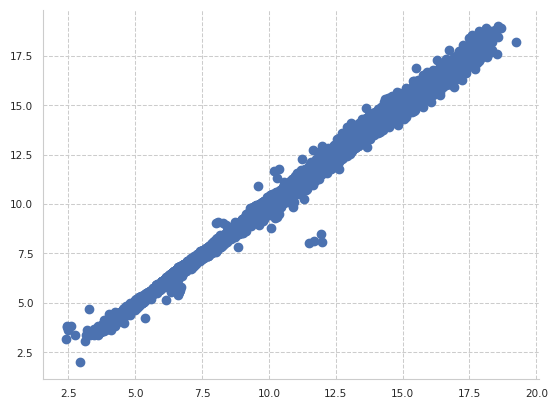

In [ ]:
plt.scatter(test_pred["nn_spag_v0"], test_pred["nn_tt_v1"])

In [ ]:
train_df.Rings.unique()

array([11.,  6., 10.,  9.,  4.,  8., 15.,  7., 12., 20., 17., 13., 14.,
        5., 23.,  3., 22., 16., 18., 19., 21., 25.,  1., 29.,  2., 27.,
       24., 26.], dtype=float32)

##### * **RANDOM FOREST**


In [ ]:
opt_ensemble=1

In [ ]:
members = [name for name in oof.keys() if 'Stack' not in name]
X = np.log1p(np.column_stack([oof[name] for name in members]))

ensemble_df_train = pd.DataFrame(data=X,columns=members)

ensemble_df_train["Rings"] = train_df.Rings


def rf_objective(trial):
    params = {
              'n_estimators' :      trial.suggest_int('n_estimators', 100, 350, step=25),
              'max_depth' :         trial.suggest_int('max_depth', 5, 10, step=1),
              'min_samples_split' : trial.suggest_int('min_samples_split', 2, 20, step=2),
              'max_features':       trial.suggest_float('max_features', .30, 1.0, step=0.05),
              'max_samples':        trial.suggest_float('max_samples', .30, 1.0, step=0.05),
              }


    optuna_model = TransformedTargetRegressor(RandomForestRegressor(**params),
                                              func=np.log1p,
                                              inverse_func=np.expm1)

    n_features = members

    optuna_score = cross_validate_tuning(optuna_model, trial, features=n_features, train=ensemble_df_train, test=None,
                                      target_feat="Rings", n_repeats=3, pruning=False, es=False, sample_weight=False, model_type="rf")

    return np.mean(optuna_score)

if opt_ensemble==0:
  rf_study = optuna.create_study(direction = 'minimize', study_name="rf_opt",
                                  sampler = optuna.samplers.TPESampler(seed=42),
                                  pruner=optuna.pruners.MedianPruner(n_warmup_steps=10)
                                  )

In [ ]:
if opt_ensemble==0:
  rf_study.optimize(rf_objective, 21, show_progress_bar=True)

In [ ]:
if opt_ensemble==0:
  trial = rf_study.best_trial
  print('RMLSE: {}'.format(trial.value))
  print("Best hyperparameters: {}".format(trial.params))

- RMLSE: 0.14795079624612467
- Best hyperparameters: {'n_estimators': 125, 'max_depth': 5, 'min_samples_split': 18, 'colsample_bytree': 0.75, 'colsample_bylevel': 0.8}

In [ ]:
members = [
           'LightGBM',
           'Xgb_v0',
           'cat_v0',
           #'ridge_v0',
           #'huber_v0',
           #'nn_baseline_v0',
           #'nn_baseline_noweight_v0',
           #'nn_tt_v0',
           'nn_tt_v1',
           #'nn_spag_v0'
           ]

In [ ]:
#members = [name for name in oof.keys() if 'Stack' not in name]

X = np.log1p(np.column_stack([oof[name] for name in members]))
model = TransformedTargetRegressor(RandomForestRegressor(n_estimators=125, max_depth=5, min_samples_split=18, max_features=0.75, max_samples=0.80, oob_score=True,random_state=42),
                                   func=np.log1p,
                                   inverse_func=np.expm1)
model.fit(X, train_df.Rings)
print('Ensemble weights')
#weights = pd.Series(model.regressor_.coef_, index=members)
weights = pd.Series(model.regressor_.feature_importances_, index=members)
print(weights)
print('oob_score_:', model.regressor_.oob_score_)
#print('Intercept:', model.regressor_.intercept_)
oof['Stack_rf'] = model.predict(X) # not really out-of-fold...
print(f"Score: {mean_squared_log_error(train_df.Rings, oof['Stack_rf'], squared=False):.5f}")

# Pie chart
weights = weights[weights > 0]
plt.pie(weights, labels=weights.index, autopct="%.0f%%")
plt.title('Ensemble weights')
plt.show()

# Test predictions
if COMPUTE_TEST_PRED:
    X = np.log1p(np.column_stack([test_pred[name] for name in members]))
    test_pred['Stack_rf'] = model.predict(X)

del weights
gc.collect()

##### * **RIDGE V1**

In [ ]:
#members = [name for name in oof.keys() if 'Stack' not in name]

X = np.log1p(np.column_stack([oof[name] for name in members]))
model_r1 = TransformedTargetRegressor(Ridge(positive=True,alpha=1),
                                   func=np.log1p,
                                   inverse_func=np.expm1)
model_r1.fit(X, train_df.Rings)
print('Ensemble weights')
weights = pd.Series(model_r1.regressor_.coef_, index=members)
print(weights)
print('Total weight:', weights.sum())
print('Intercept:', model_r1.regressor_.intercept_)
oof['Stack_ridge'] = model_r1.predict(X) # not really out-of-fold...
print(f"Score: {mean_squared_log_error(train_df.Rings, oof['Stack_ridge'], squared=False):.5f}")

# Pie chart
weights = weights[weights > 0]
plt.pie(weights, labels=weights.index, autopct="%.0f%%")
plt.title('Ensemble weights')
plt.show()

# Test predictions
if COMPUTE_TEST_PRED:
    X = np.log1p(np.column_stack([test_pred[name] for name in members]))
    test_pred['Stack_ridge_v1'] = model_r1.predict(X)

del weights
gc.collect()

##### * **RIDGE V2**

In [ ]:
#members = [name for name in oof.keys() if 'Stack' not in name]

X = np.log1p(np.column_stack([oof[name] for name in members]))
model_r2 = TransformedTargetRegressor(Ridge(positive=True,alpha=10),
                                   func=np.log1p,
                                   inverse_func=np.expm1)
model_r2.fit(X, train_df.Rings)
print('Ensemble weights')
weights = pd.Series(model_r2.regressor_.coef_, index=members)
print(weights)
print('Total weight:', weights.sum())
print('Intercept:', model_r2.regressor_.intercept_)
oof['Stack_ridge_v2'] = model_r2.predict(X) # not really out-of-fold...
print(f"Score: {mean_squared_log_error(train_df.Rings, oof['Stack_ridge_v2'], squared=False):.5f}")

# Pie chart
weights = weights[weights > 0]
plt.pie(weights, labels=weights.index, autopct="%.0f%%")
plt.title('Ensemble weights')
plt.show()

# Test predictions
if COMPUTE_TEST_PRED:
    X = np.log1p(np.column_stack([test_pred[name] for name in members]))
    test_pred['Stack_ridge_v2'] = model_r2.predict(X)

del weights
gc.collect()

### Evaluation

The bar chart shows that for the given dataset, LightGBM, XGBoost and Catboost give the best predictions.

In [ ]:
result_list = []
for label in oof.keys():
    score = mean_squared_log_error(train_df.Rings, oof[label], squared=False)
    result_list.append((label, score))
result_df = pd.DataFrame(result_list, columns=['label', 'score'])
result_df.sort_values('score', inplace=True)

plt.figure(figsize=(12, len(result_df) * 0.4 + 0.4))
bars = plt.barh(np.arange(len(result_df)), result_df.score, color=['salmon','lightblue',"orangered","darkcyan","mediumaquamarine","cornflowerblue"])
plt.gca().bar_label(bars, fmt='%.5f')
plt.yticks(np.arange(len(result_df)), result_df.label)
plt.gca().invert_yaxis()
plt.xlim(0.05, 0.16)
plt.xlabel('Root mean squared log error (lower is better)')
plt.show()

In [ ]:
create_sub_files(test_pred["Stack_rf"], experiment_name = "Stack_v13_rf")
create_sub_files(np.round(test_pred["Stack_rf"]), experiment_name = "Stack_v13_rf_round")

,Rings
id,
90615,10.0
90616,10.0
90617,10.0
90618,11.0
90619,8.0
...,...
151021,6.0
151022,9.0
151023,12.0


In [ ]:
test_pred.keys()

dict_keys(['LightGBM', 'Xgb_v0', 'cat_v0', 'ridge_v0', 'huber_v0', 'nn_baseline_v0', 'nn_baseline_noweight_v0', 'Stack_rf', 'Stack_ridge'])

In [ ]:
members = [name for name in test_pred.keys() if 'Stack' not in name]
X_ = np.column_stack([test_pred[name] for name in members])

ensemble_df_test = pd.DataFrame(data=X_,columns=members)

#### Simple Average:

In [ ]:
ensemble_df_test.corr()

In [ ]:
pred_average = ensemble_df_test[["LightGBM","cat_v0","nn_tt_v0"]].mean(axis=1).values
pred_average

array([ 9.67375447,  9.68536088,  9.98481066, ..., 12.13390643,
       13.0644209 ,  8.15062605])

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(11,9))
axs = np.ravel(axs)

axs[0].scatter(test_pred["LightGBM"], test_pred["nn_tt_v0"]);
axs[1].scatter(test_pred["LightGBM"], test_pred["Xgb_v0"]);
axs[2].scatter(test_pred["LightGBM"], test_pred["cat_v0"]);
axs[3].scatter(test_pred["cat_v0"], test_pred["nn_tt_v0"]);

In [ ]:
create_sub_files(pred_average, experiment_name = "simple_mean_lg_cat_tt")